In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import normaltest, skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['axes.unicode_minus'] = False

In [24]:
df = pd.read_csv('df_merged.csv')
df

month       CO2ppm       Temp      Humid       VPD  Chl_a  Chl_b   TChl  \
0        5   381.681033  16.918639  83.130786  1.532512   8.79   2.22  11.00   
1        5   374.463441  16.922124  83.096722  1.532868   8.99   2.56  11.55   
2        5   371.850683  16.930256  82.488003  1.534584   9.66   2.44  12.10   
3        5   400.475202  16.921511  82.081632  1.534512   9.33   2.45  11.79   
4        5   381.360788  16.921323  83.888666  1.531475  10.53   2.58  13.11   
..     ...          ...        ...        ...       ...    ...    ...    ...   
400      9  1208.463000  25.901000  60.192000  2.560000   2.64   0.52   3.15   
401      9  1211.911000  25.896000  60.254000  2.559000   4.74   1.12   5.86   
402      9  1206.015000  25.923000  59.125000  2.565000   2.52   0.08   2.60   
403      9  1225.166000  25.890000  55.446000  2.571000   2.63   0.39   3.02   
404      9  1023.294000  25.866000  55.217000  2.568000   2.86   0.61   3.47   

      Car  Chl_a_b  ...  DF_abs  SFI_abs  Fv-Fm  Leaf_ExtractionYield  \
0    2.97     3.97  ...   0.328    0.215  0.830                 19.00   
1    3.09     3.52  ...   0.287    0.199  0.826                 20.10   
2    3.11     3.96  ...   0.384    0.229  0.828                 20.70   
3    3.13     3.80  ...   0.503    0.282  0.839                 19.00   
4    3.37     4.08  ...   0.304    0.203  0.832                 20.10   
..    ...      ...  ...     ...      ...    ...                   ...   
400  1.07     5.09  ...  -0.626    0.051  0.722                  7.10   
401  1.53     4.22  ...  -0.829    0.046  0.588                  7.05   
402  1.38    31.49  ...  -0.879    0.037  0.643                  7.00   
403  1.17     6.73  ...  -0.478    0.067  0.727                  7.10   
404  1.11     4.66  ...  -0.557    0.062  0.703                  7.05   

     Root_ExtractionYield  Leaf_TPC  Root_TPC  Leaf_TFC  Root_TFC  scenario  
0                   18.90     7.476     6.270     5.217     0.861      SSP1  
1                   19.60     7.369     6.396     5.257     0.836      SSP1  
2                   20.40     7.369     6.396     5.242     0.841      SSP1  
3                   18.90     7.476     6.270     5.217     0.861      SSP1  
4                   19.60     7.369     6.396     5.257     0.836      SSP1  
..                    ...       ...       ...       ...       ...       ...  
400                 14.60     7.743     5.277     1.455     0.513      SSP5  
401                 14.55     7.760     5.245     1.450     0.507      SSP5  
402                 14.50     7.814     5.324     1.460     0.518      SSP5  
403                 14.60     7.743     5.277     1.455     0.513      SSP5  
404                 14.55     7.760     5.245     1.450     0.507      SSP5  

[405 rows x 26 columns]

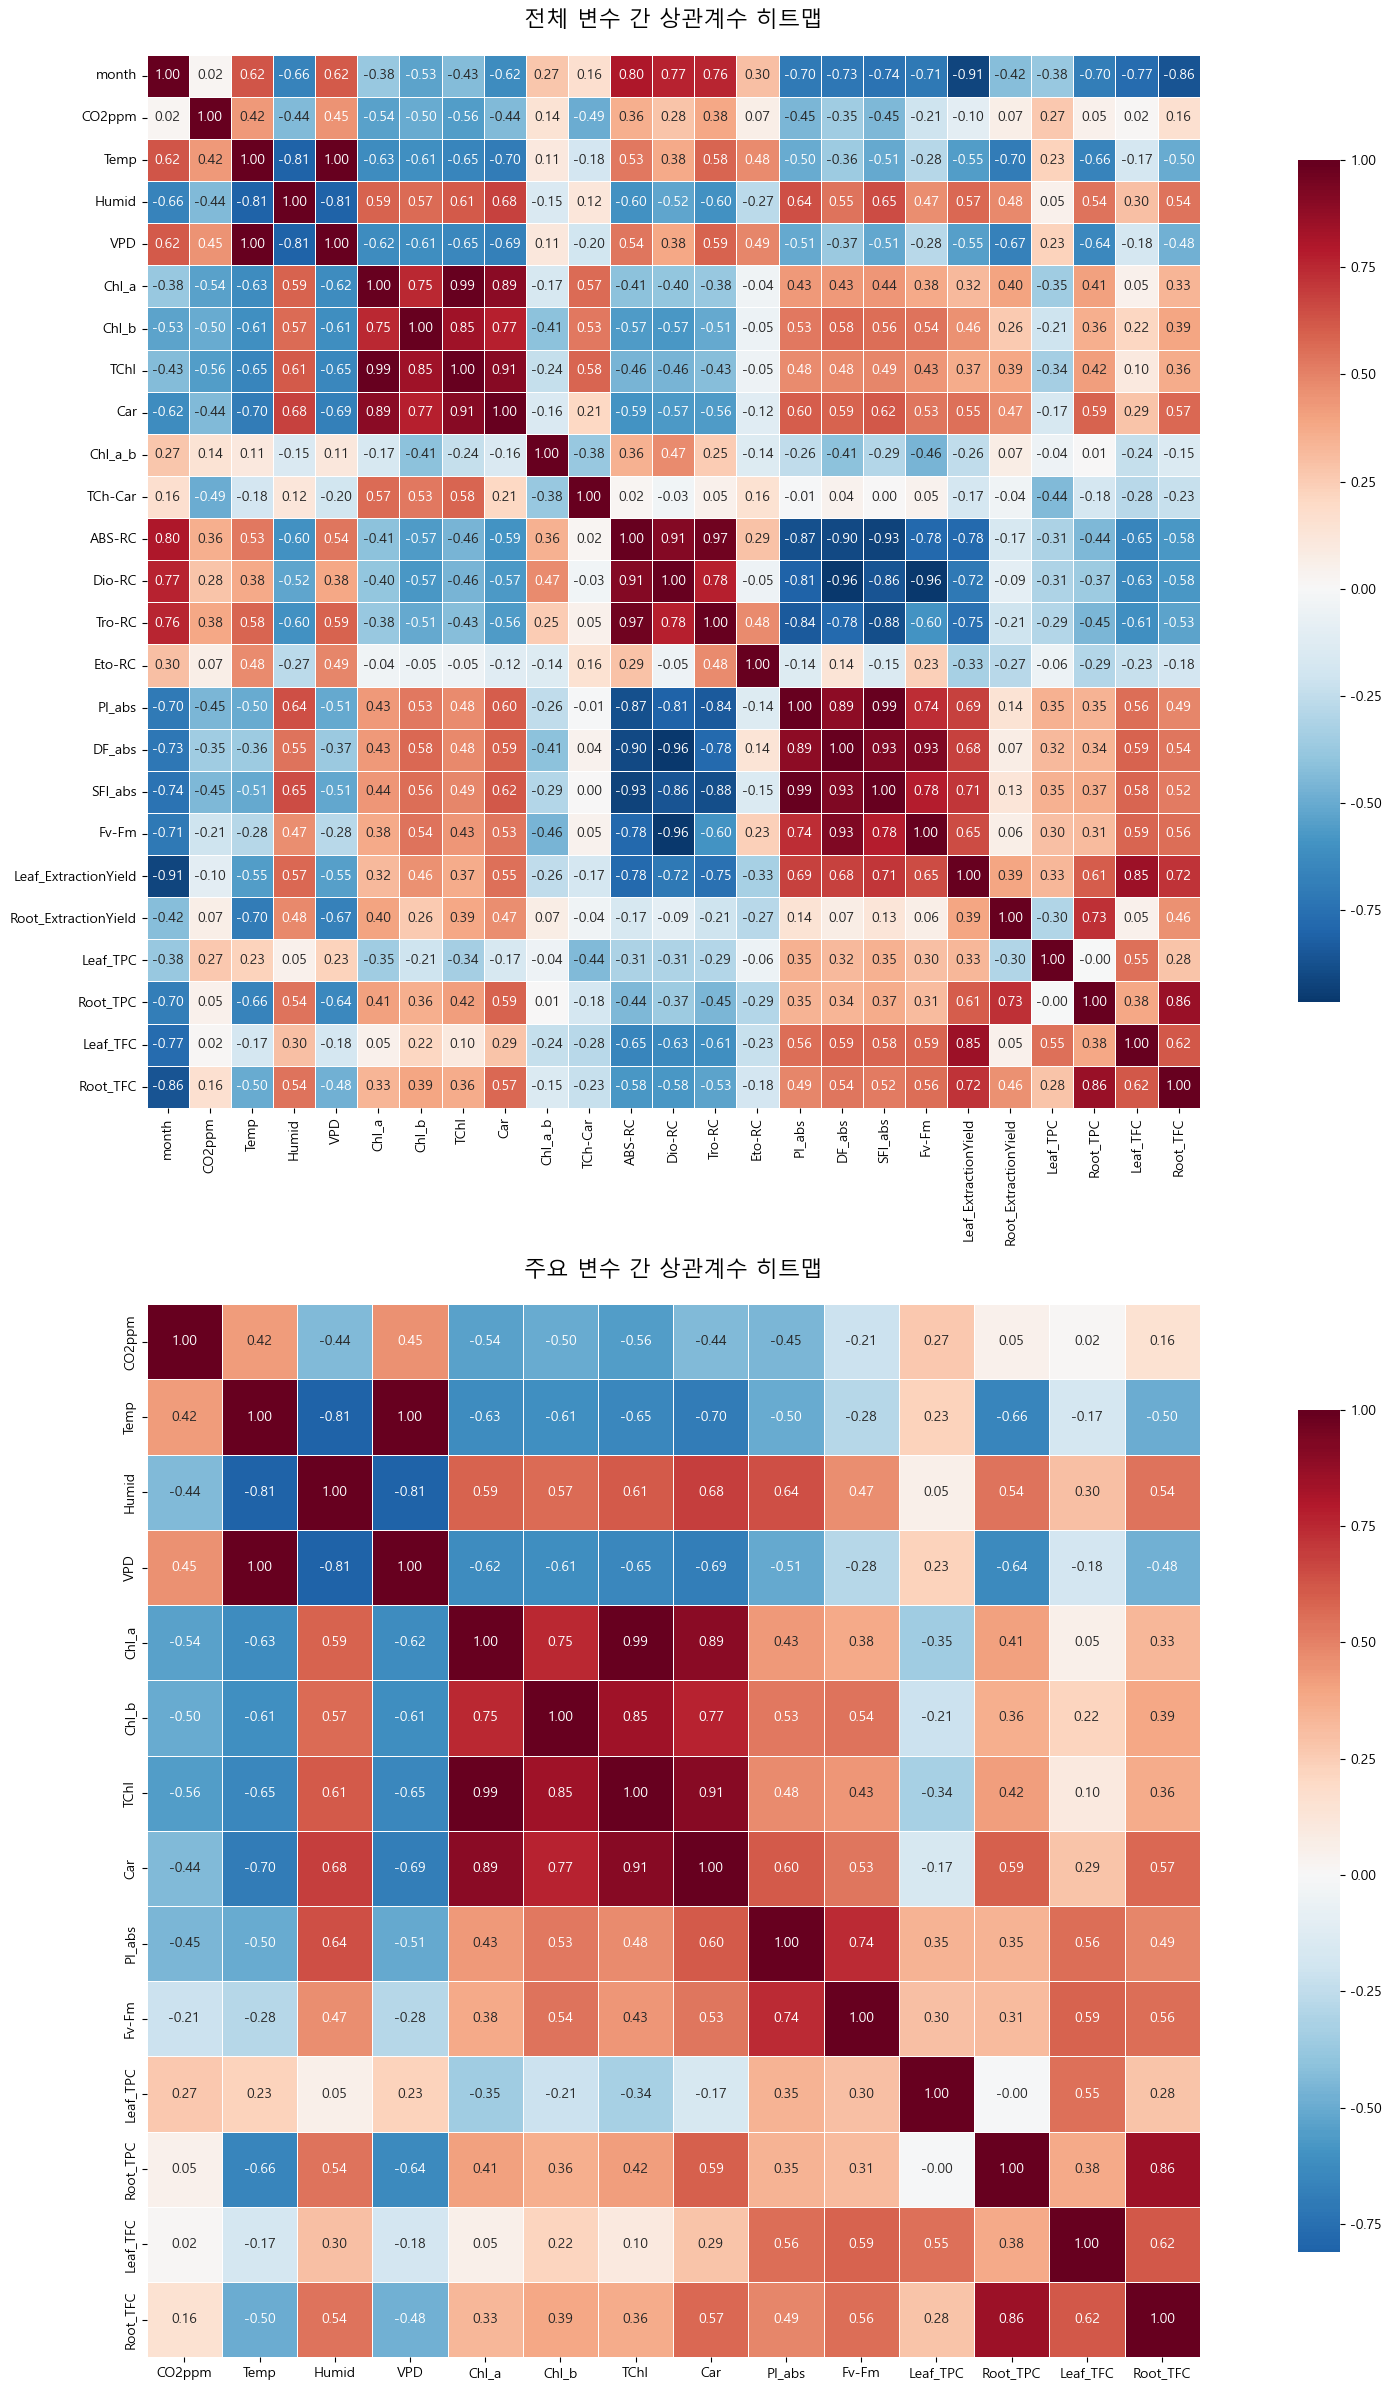

In [ ]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ ÏÉùÏÑ±
fig, axes = plt.subplots(2, 1, figsize=(20, 24))

# Ï†ÑÏ≤¥ ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Ï†ÑÏ≤¥ Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ', fontsize=16, pad=20)

# Ï£ºÏöî Î≥ÄÏàòÎßå ÏÑ†ÌÉùÌïòÏó¨ ÏÉÅÏÑ∏ ÌûàÌä∏Îßµ
key_vars = ['CO2ppm', 'Temp', 'Humid', 'VPD', 'Chl_a', 'Chl_b', 'TChl', 'Car', 
            'PI_abs', 'Fv-Fm', 'Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']
corr_key = df[key_vars].corr()
sns.heatmap(corr_key, annot=True, fmt='.2f', cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[1])
axes[1].set_title('Ï£ºÏöî Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

In [25]:
# =============================================================================
# 1. Î≥ÄÏàò Í∑∏Î£π Ï†ïÏùò Î∞è Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ Ïù¥Ìï¥
# =============================================================================
print("\n1. Î≥ÄÏàò Í∑∏Î£π Ï†ïÏùò")
print("-" * 40)

# Î≥ÄÏàò Í∑∏Î£π Ï†ïÏùò
variable_groups = {
    'ÌôòÍ≤ΩÏ†ïÎ≥¥': ['CO2ppm', 'Temp', 'Humid', 'VPD'],
    'ÏóΩÎ°ùÏÜå_Í¥ÄÎ†®': ['Chl_a', 'Chl_b', 'TChl', 'Car', 'Chl_a_b', 'TCh-Car'],
    'Í¥ëÌï©ÏÑ±_Ìö®Ïú®': ['ABS-RC', 'Dio-RC', 'Tro-RC', 'Eto-RC', 'PI_abs', 'DF_abs', 'SFI_abs', 'Fv-Fm'],
    'Ï∂îÏ∂úÏàòÏú®': ['Leaf_ExtractionYield', 'Root_ExtractionYield'],
    'Î™©ÌëúÎ≥ÄÏàò_ÌéòÎÜÄ': ['Leaf_TPC', 'Root_TPC'],
    'Î™©ÌëúÎ≥ÄÏàò_ÌîåÎùºÎ≥¥ÎÖ∏Ïù¥Îìú': ['Leaf_TFC', 'Root_TFC']
}

for group_name, variables in variable_groups.items():
    print(f"\n{group_name}: {variables}")

# Î™©Ìëú Î≥ÄÏàò Ï†ïÏùò
target_variables = ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']
print(f"\nÎ™©Ìëú Î≥ÄÏàò (ÏòàÏ∏° ÎåÄÏÉÅ): {target_variables}")


1. Î≥ÄÏàò Í∑∏Î£π Ï†ïÏùò
----------------------------------------

ÌôòÍ≤ΩÏ†ïÎ≥¥: ['CO2ppm', 'Temp', 'Humid', 'VPD']

ÏóΩÎ°ùÏÜå_Í¥ÄÎ†®: ['Chl_a', 'Chl_b', 'TChl', 'Car', 'Chl_a_b', 'TCh-Car']

Í¥ëÌï©ÏÑ±_Ìö®Ïú®: ['ABS-RC', 'Dio-RC', 'Tro-RC', 'Eto-RC', 'PI_abs', 'DF_abs', 'SFI_abs', 'Fv-Fm']

Ï∂îÏ∂úÏàòÏú®: ['Leaf_ExtractionYield', 'Root_ExtractionYield']

Î™©ÌëúÎ≥ÄÏàò_ÌéòÎÜÄ: ['Leaf_TPC', 'Root_TPC']

Î™©ÌëúÎ≥ÄÏàò_ÌîåÎùºÎ≥¥ÎÖ∏Ïù¥Îìú: ['Leaf_TFC', 'Root_TFC']

Î™©Ìëú Î≥ÄÏàò (ÏòàÏ∏° ÎåÄÏÉÅ): ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']



2. Î™©Ìëú Î≥ÄÏàòÏôÄ Îã§Î•∏ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
----------------------------------------

[Leaf_TPC]ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| > 0.3Ïù∏ Î≥ÄÏàòÎßå ÌëúÏãú):
  TCh-Car: -0.441
  Chl_a: -0.353
  SFI_abs: 0.349
  PI_abs: 0.348
  TChl: -0.336
  Leaf_ExtractionYield: 0.332
  DF_abs: 0.322
  ABS-RC: -0.314
  Dio-RC: -0.307

[Root_TPC]ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| > 0.3Ïù∏ Î≥ÄÏàòÎßå ÌëúÏãú):
  Root_ExtractionYield: 0.731
  Temp: -0.659
  VPD: -0.636
  Leaf_ExtractionYield: 0.606
  Car: 0.592
  Humid: 0.544
  Tro-RC: -0.455
  ABS-RC: -0.444
  TChl: 0.416
  Chl_a: 0.408
  Dio-RC: -0.366
  SFI_abs: 0.365
  Chl_b: 0.362
  PI_abs: 0.348
  DF_abs: 0.339
  Fv-Fm: 0.314

[Leaf_TFC]ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| > 0.3Ïù∏ Î≥ÄÏàòÎßå ÌëúÏãú):
  Leaf_ExtractionYield: 0.849
  ABS-RC: -0.653
  Dio-RC: -0.631
  Tro-RC: -0.610
  DF_abs: 0.588
  Fv-Fm: 0.585
  SFI_abs: 0.582
  PI_abs: 0.556

[Root_TFC]ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| > 0.3Ïù∏ Î≥ÄÏàòÎßå ÌëúÏãú):
  Leaf_ExtractionYield: 0.722
  ABS-RC: -0.580
  Dio-RC

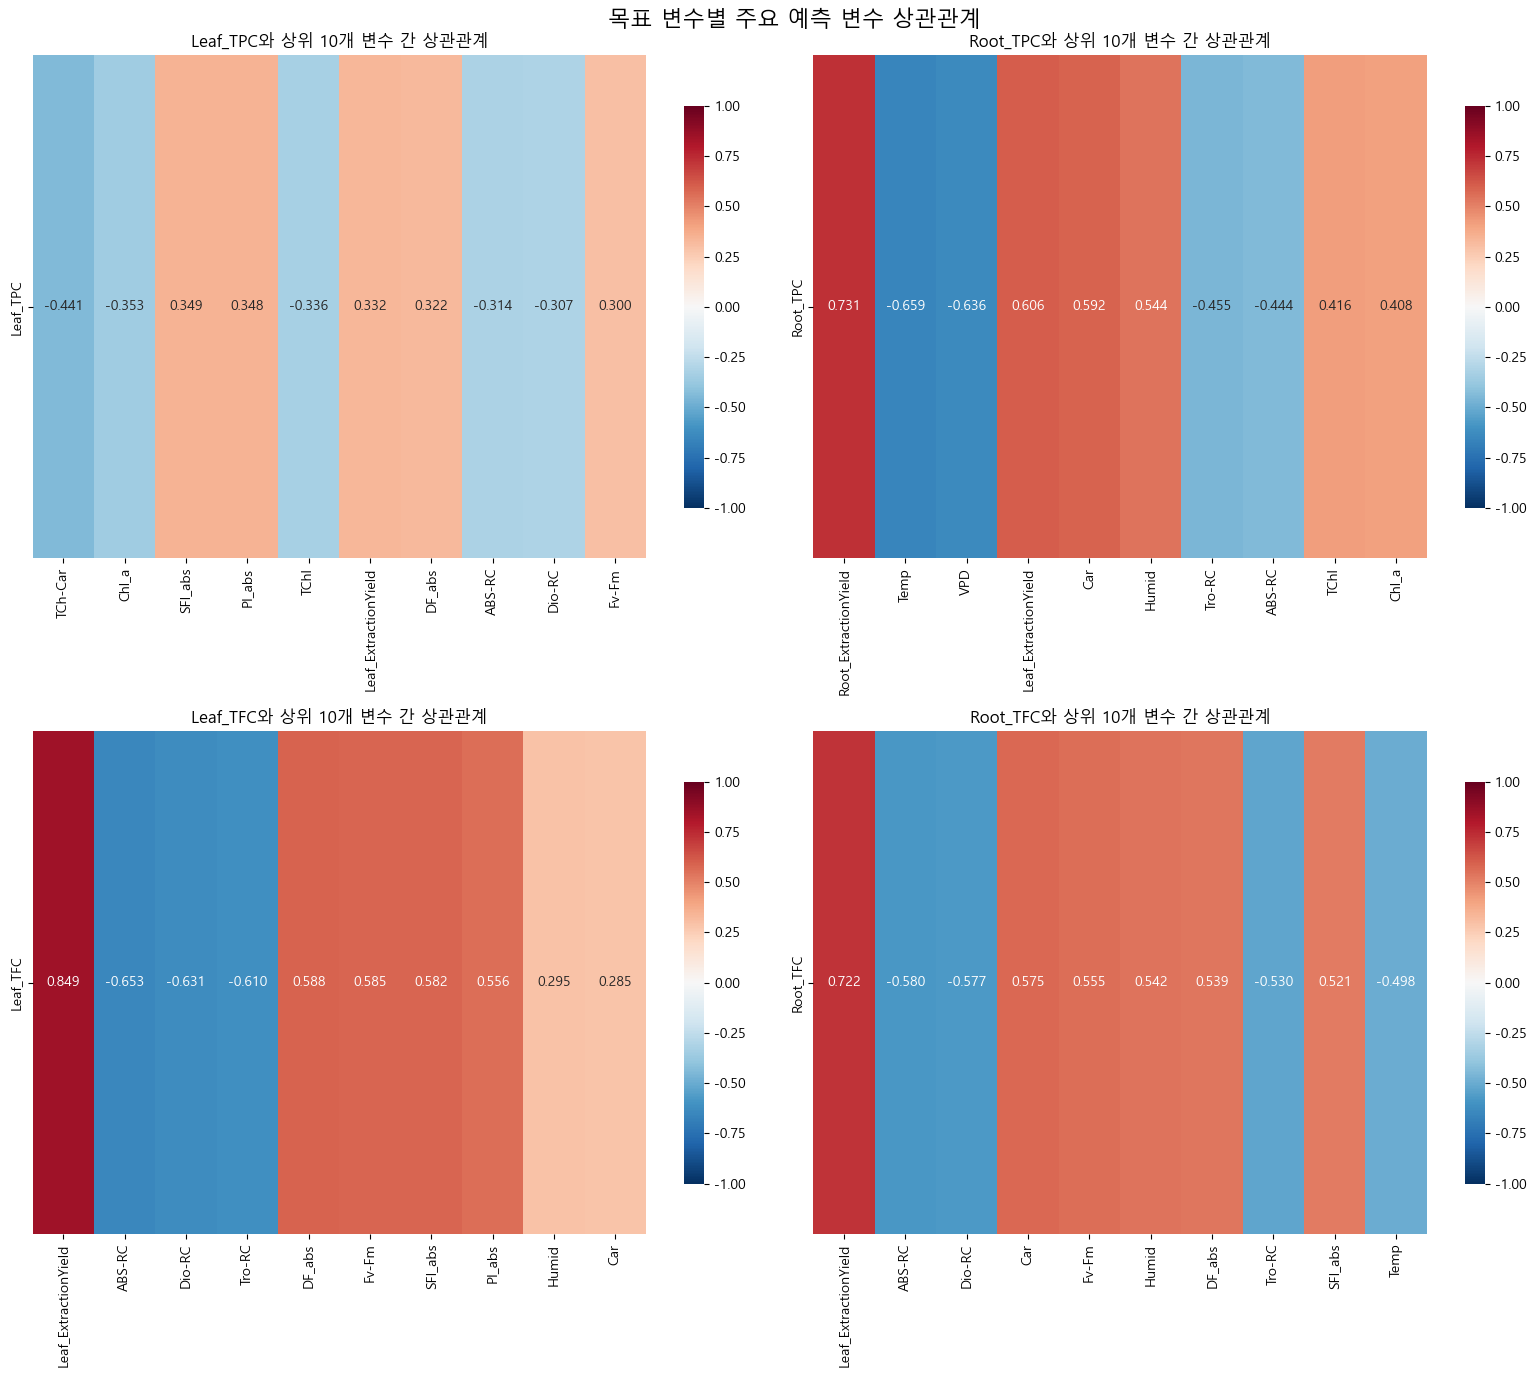

In [26]:
# =============================================================================
# 2. Î™©Ìëú Î≥ÄÏàòÏôÄ Îã§Î•∏ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
# =============================================================================
print("\n" + "=" * 80)
print("2. Î™©Ìëú Î≥ÄÏàòÏôÄ Îã§Î•∏ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù")
print("-" * 40)

# Î™®Îì† ÎèÖÎ¶ΩÎ≥ÄÏàò Ï†ïÏùò
independent_vars = []
for group_name, variables in variable_groups.items():
    if 'Î™©ÌëúÎ≥ÄÏàò' not in group_name:
        independent_vars.extend(variables)

# Í∞Å Î™©Ìëú Î≥ÄÏàòÏóê ÎåÄÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
correlation_results = {}

for target in target_variables:
    print(f"\n[{target}]ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| > 0.3Ïù∏ Î≥ÄÏàòÎßå ÌëúÏãú):")
    correlations = {}
    
    for var in independent_vars:
        if var != target:
            corr = df[target].corr(df[var])
            correlations[var] = corr
    
    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï†àÎåÄÍ∞í Í∏∞Ï§Ä Ï†ïÎ†¨
    sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
    
    # ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÎßå Ï∂úÎ†•
    high_corr_vars = []
    for var, corr in sorted_corr:
        if abs(corr) > 0.3:
            print(f"  {var}: {corr:.3f}")
            high_corr_vars.append(var)
    
    correlation_results[target] = high_corr_vars

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, target in enumerate(target_variables):
    # ÏÉÅÏúÑ 10Í∞ú Î≥ÄÏàòÎßå ÏÑ†ÌÉù
    all_corr = []
    for var in independent_vars:
        corr = df[target].corr(df[var])
        all_corr.append((var, corr))
    
    top_vars = sorted(all_corr, key=lambda x: abs(x[1]), reverse=True)[:10]
    top_var_names = [v[0] for v in top_vars]
    
    # ÌûàÌä∏ÎßµÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
    corr_matrix = df[[target] + top_var_names].corr()
    
    # ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
    sns.heatmap(corr_matrix.iloc[0:1, 1:], annot=True, fmt='.3f', 
                cmap='RdBu_r', center=0, ax=axes[idx], 
                vmin=-1, vmax=1, cbar_kws={'shrink': 0.8})
    axes[idx].set_title(f'{target}ÏôÄ ÏÉÅÏúÑ 10Í∞ú Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')

plt.suptitle('Î™©Ìëú Î≥ÄÏàòÎ≥Ñ Ï£ºÏöî ÏòàÏ∏° Î≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontsize=16)
plt.tight_layout()
plt.show()


3. ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Î™©Ìëú Î≥ÄÏàò Î∂ÑÌè¨ Î∞è Ï∞®Ïù¥ Î∂ÑÏÑù
----------------------------------------

ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† Î∞è ÌëúÏ§ÄÌé∏Ï∞®:
         Leaf_TPC        Root_TPC        Leaf_TFC        Root_TFC       
             mean    std     mean    std     mean    std     mean    std
scenario                                                                
SSP1        7.482  0.704    5.114  0.492    4.524  2.593    0.569  0.124
SSP3        7.801  0.395    5.154  0.656    4.646  2.447    0.629  0.171
SSP5        7.842  0.210    5.174  0.487    4.840  2.689    0.618  0.096

ÏãúÎÇòÎ¶¨Ïò§ Í∞Ñ Ï∞®Ïù¥ Í≤ÄÏ†ï (ANOVA):
Leaf_TPC: F=22.651, p=0.000000
Root_TPC: F=0.423, p=0.655682
Leaf_TFC: F=0.515, p=0.598146
Root_TFC: F=7.803, p=0.000473


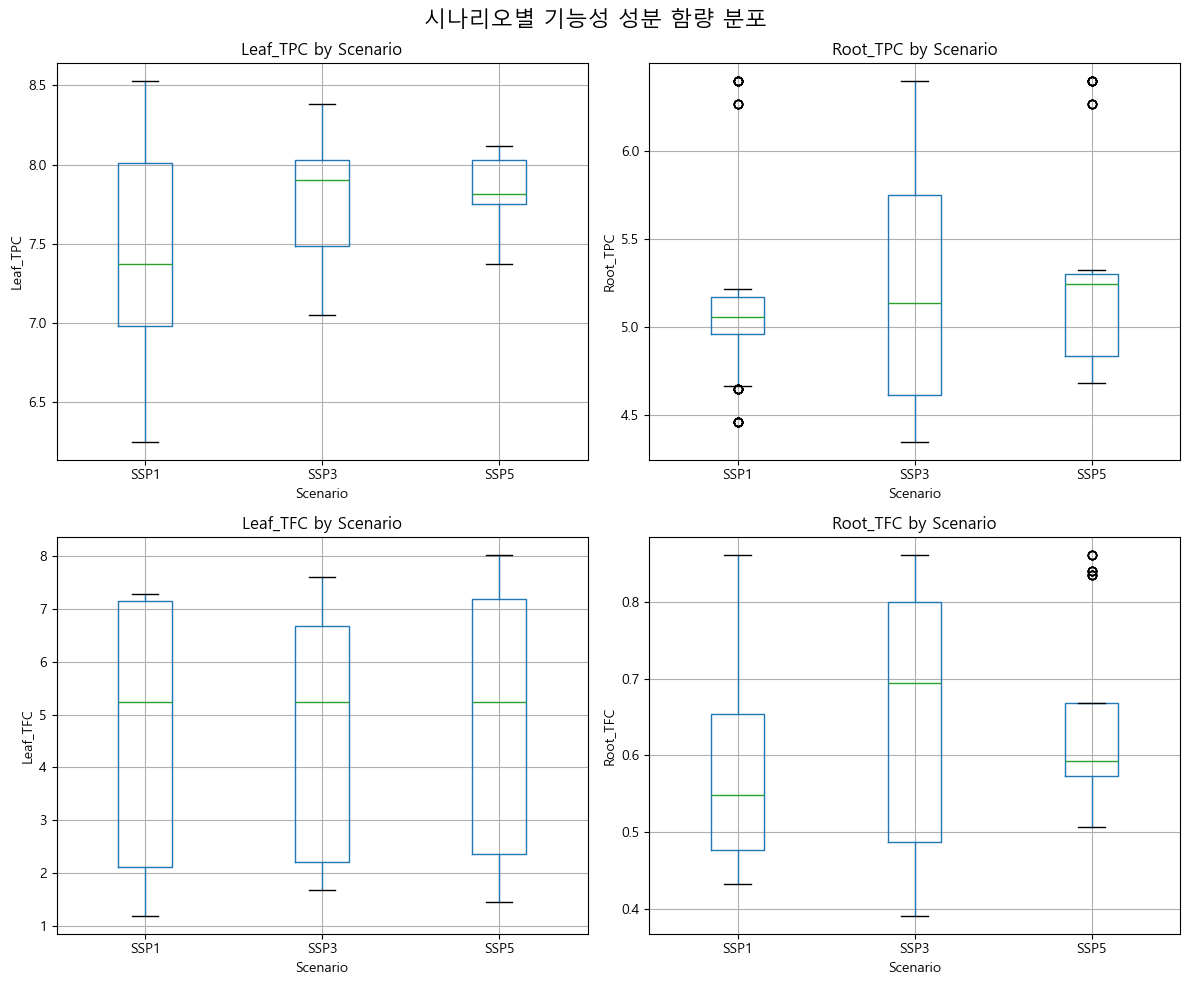

In [27]:
# =============================================================================
# 3. ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Î™©Ìëú Î≥ÄÏàò Î∂ÑÌè¨ Î∞è Ï∞®Ïù¥ Î∂ÑÏÑù
# =============================================================================
print("\n" + "=" * 80)
print("3. ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Î™©Ìëú Î≥ÄÏàò Î∂ÑÌè¨ Î∞è Ï∞®Ïù¥ Î∂ÑÏÑù")
print("-" * 40)

# ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌÜµÍ≥Ñ
scenario_stats = df.groupby('scenario')[target_variables].agg(['mean', 'std'])
print("\nÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† Î∞è ÌëúÏ§ÄÌé∏Ï∞®:")
print(scenario_stats.round(3))

# ANOVA Í≤ÄÏ†ï
print("\nÏãúÎÇòÎ¶¨Ïò§ Í∞Ñ Ï∞®Ïù¥ Í≤ÄÏ†ï (ANOVA):")
for target in target_variables:
    groups = [df[df['scenario'] == s][target].values for s in df['scenario'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"{target}: F={f_stat:.3f}, p={p_value:.6f}")

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, target in enumerate(target_variables):
    df.boxplot(column=target, by='scenario', ax=axes[idx])
    axes[idx].set_title(f'{target} by Scenario')
    axes[idx].set_xlabel('Scenario')
    axes[idx].set_ylabel(target)

plt.suptitle('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Í∏∞Îä•ÏÑ± ÏÑ±Î∂Ñ Ìï®Îüâ Î∂ÑÌè¨', fontsize=16)
plt.tight_layout()
plt.show()


4. Î≥ÄÏàò Í∑∏Î£πÎ≥Ñ ÏòÅÌñ•Î†• Î∂ÑÏÑù (Random Forest Feature Importance)
----------------------------------------

[Leaf_TPC] ÏòàÏ∏°Ïóê ÎåÄÌïú Î≥ÄÏàò Ï§ëÏöîÎèÑ:
            variable  importance
             TCh-Car    0.387973
              CO2ppm    0.124994
               Chl_a    0.102429
Root_ExtractionYield    0.074308
              Dio-RC    0.032088
                Temp    0.029677
                 VPD    0.027997
Leaf_ExtractionYield    0.027454
             Chl_a_b    0.026640
                 Car    0.022020

[Root_TPC] ÏòàÏ∏°Ïóê ÎåÄÌïú Î≥ÄÏàò Ï§ëÏöîÎèÑ:
            variable  importance
Root_ExtractionYield    0.643202
Leaf_ExtractionYield    0.192811
                Temp    0.076438
                 VPD    0.027106
              Dio-RC    0.020509
              Eto-RC    0.008827
               Fv-Fm    0.004795
              ABS-RC    0.004152
              CO2ppm    0.003592
              Tro-RC    0.003494

[Leaf_TFC] ÏòàÏ∏°Ïóê ÎåÄÌïú Î≥ÄÏàò Ï§ëÏöîÎèÑ:
            variabl

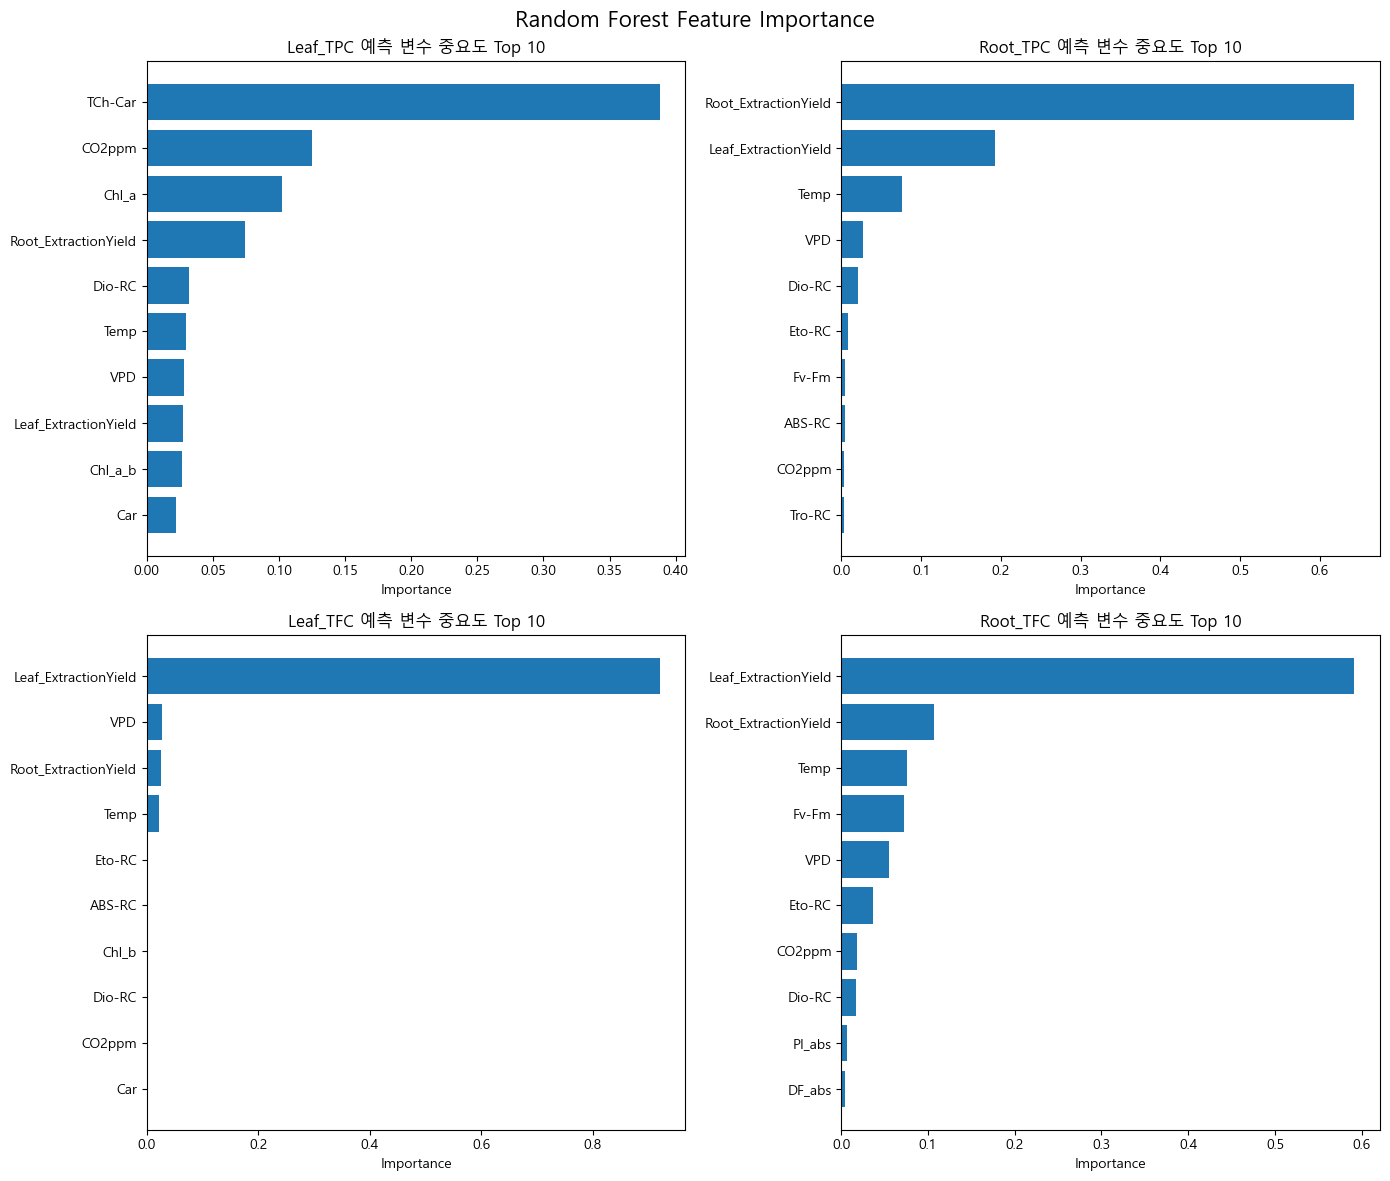

In [28]:
# =============================================================================
# 4. Î≥ÄÏàò Í∑∏Î£πÎ≥Ñ ÏòÅÌñ•Î†• Î∂ÑÏÑù
# =============================================================================
print("\n" + "=" * 80)
print("4. Î≥ÄÏàò Í∑∏Î£πÎ≥Ñ ÏòÅÌñ•Î†• Î∂ÑÏÑù (Random Forest Feature Importance)")
print("-" * 40)

from sklearn.ensemble import RandomForestRegressor

# Í∞Å Î™©Ìëú Î≥ÄÏàòÏóê ÎåÄÌïú feature importance Í≥ÑÏÇ∞
feature_importance_results = {}

for target in target_variables:
    print(f"\n[{target}] ÏòàÏ∏°Ïóê ÎåÄÌïú Î≥ÄÏàò Ï§ëÏöîÎèÑ:")
    
    # Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
    X = df[independent_vars]
    y = df[target]
    
    # Random Forest Î™®Îç∏ ÌïôÏäµ
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Feature importance Ï∂îÏ∂ú
    importance = pd.DataFrame({
        'variable': independent_vars,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # ÏÉÅÏúÑ 10Í∞úÎßå Ï∂úÎ†•
    print(importance.head(10).to_string(index=False))
    
    feature_importance_results[target] = importance

# Feature Importance ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, target in enumerate(target_variables):
    importance = feature_importance_results[target].head(10)
    
    axes[idx].barh(range(len(importance)), importance['importance'].values)
    axes[idx].set_yticks(range(len(importance)))
    axes[idx].set_yticklabels(importance['variable'].values)
    axes[idx].set_xlabel('Importance')
    axes[idx].set_title(f'{target} ÏòàÏ∏° Î≥ÄÏàò Ï§ëÏöîÎèÑ Top 10')
    axes[idx].invert_yaxis()

plt.suptitle('Random Forest Feature Importance', fontsize=16)
plt.tight_layout()
plt.show()

In [29]:
# =============================================================================
# 5. ÌïµÏã¨ Ïù∏Ïûê ÎèÑÏ∂ú (PCA + ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï¢ÖÌï©)
# =============================================================================
print("\n" + "=" * 80)
print("5. ÌïµÏã¨ Ïù∏Ïûê ÎèÑÏ∂ú")
print("-" * 40)

# Í∞Å Î™©Ìëú Î≥ÄÏàòÎ≥Ñ ÌïµÏã¨ Ïù∏Ïûê ÏÑ†Ï†ï
key_factors = {}

for target in target_variables:
    print(f"\n[{target}]Ïùò ÌïµÏã¨ Ïù∏Ïûê:")
    
    # 1) ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏÉÅÏúÑ Î≥ÄÏàò
    corr_vars = correlation_results[target][:5] if len(correlation_results[target]) >= 5 else correlation_results[target]
    
    # 2) Feature Importance ÏÉÅÏúÑ Î≥ÄÏàò
    importance_vars = feature_importance_results[target].head(5)['variable'].tolist()
    
    # 3) Îëê Î∞©Î≤ïÏóêÏÑú Í≥µÌÜµÏúºÎ°ú ÏÑ†ÌÉùÎêú Î≥ÄÏàò + Í∞ÅÍ∞Å ÏÉÅÏúÑ Î≥ÄÏàò
    common_vars = list(set(corr_vars) & set(importance_vars))
    all_key_vars = list(set(corr_vars + importance_vars))
    
    key_factors[target] = {
        'common': common_vars,
        'all': all_key_vars,
        'correlation_based': corr_vars,
        'importance_based': importance_vars
    }
    
    print(f"  ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∏∞Î∞ò: {corr_vars}")
    print(f"  Ï§ëÏöîÎèÑ Í∏∞Î∞ò: {importance_vars}")
    print(f"  Í≥µÌÜµ ÌïµÏã¨ Ïù∏Ïûê: {common_vars}")


5. ÌïµÏã¨ Ïù∏Ïûê ÎèÑÏ∂ú
----------------------------------------

[Leaf_TPC]Ïùò ÌïµÏã¨ Ïù∏Ïûê:
  ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∏∞Î∞ò: ['TCh-Car', 'Chl_a', 'SFI_abs', 'PI_abs', 'TChl']
  Ï§ëÏöîÎèÑ Í∏∞Î∞ò: ['TCh-Car', 'CO2ppm', 'Chl_a', 'Root_ExtractionYield', 'Dio-RC']
  Í≥µÌÜµ ÌïµÏã¨ Ïù∏Ïûê: ['TCh-Car', 'Chl_a']

[Root_TPC]Ïùò ÌïµÏã¨ Ïù∏Ïûê:
  ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∏∞Î∞ò: ['Root_ExtractionYield', 'Temp', 'VPD', 'Leaf_ExtractionYield', 'Car']
  Ï§ëÏöîÎèÑ Í∏∞Î∞ò: ['Root_ExtractionYield', 'Leaf_ExtractionYield', 'Temp', 'VPD', 'Dio-RC']
  Í≥µÌÜµ ÌïµÏã¨ Ïù∏Ïûê: ['Root_ExtractionYield', 'Leaf_ExtractionYield', 'VPD', 'Temp']

[Leaf_TFC]Ïùò ÌïµÏã¨ Ïù∏Ïûê:
  ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∏∞Î∞ò: ['Leaf_ExtractionYield', 'ABS-RC', 'Dio-RC', 'Tro-RC', 'DF_abs']
  Ï§ëÏöîÎèÑ Í∏∞Î∞ò: ['Leaf_ExtractionYield', 'VPD', 'Root_ExtractionYield', 'Temp', 'Eto-RC']
  Í≥µÌÜµ ÌïµÏã¨ Ïù∏Ïûê: ['Leaf_ExtractionYield']

[Root_TFC]Ïùò ÌïµÏã¨ Ïù∏Ïûê:
  ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∏∞Î∞ò: ['Leaf_ExtractionYield', 'ABS-RC', 'Dio-RC', 'Car', 'Fv-Fm']
  Ï§ëÏöîÎèÑ Í∏∞Î∞ò: 


6. ÌôòÍ≤ΩÏ†ïÎ≥¥-ÏÉùÎ¶¨Î∞òÏùë-ÏÉùÎ¶¨ÌôúÏÑ± ÌÜµÌï© ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
----------------------------------------


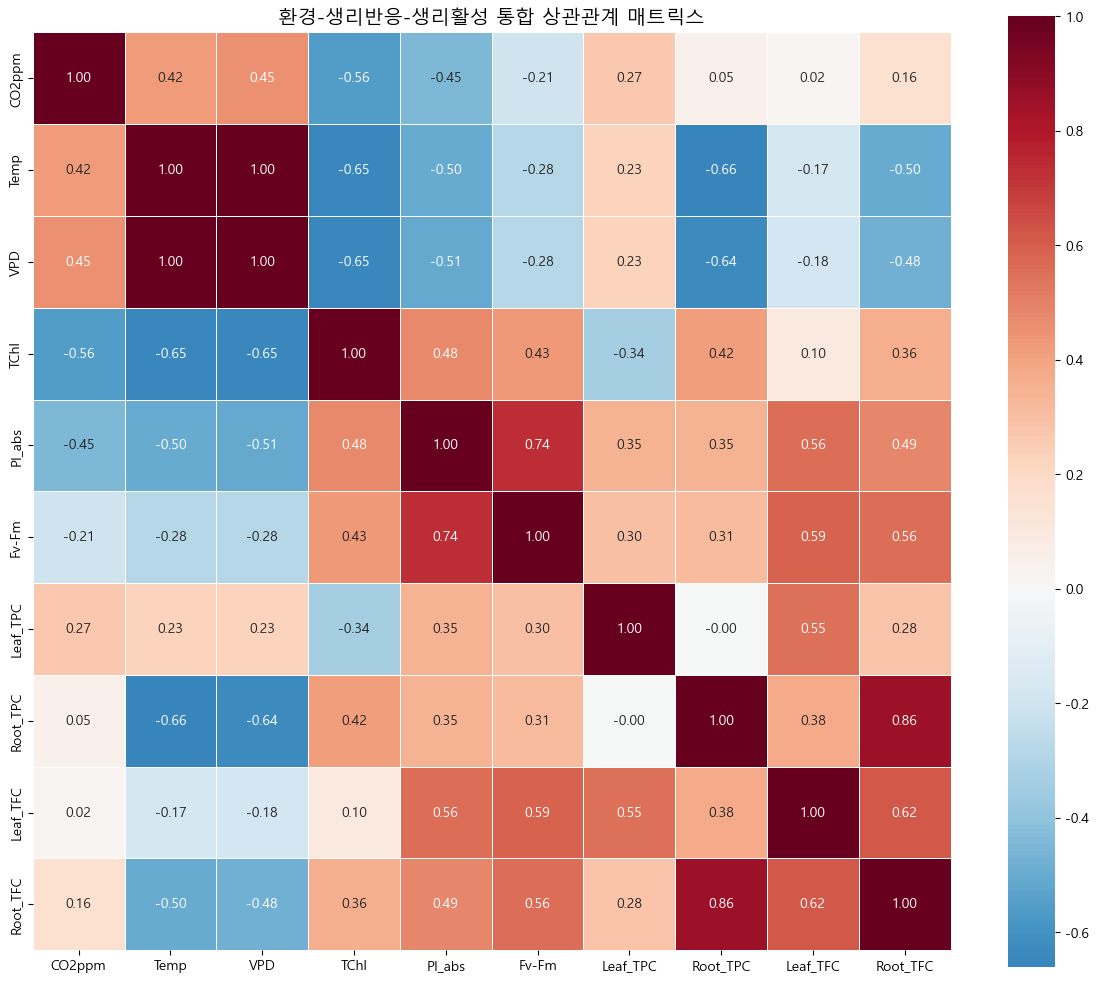


ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌôòÍ≤Ω-ÏÉùÎ¶¨ÌôúÏÑ± ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:

[SSP1]
  CO2ppm ‚Üí Leaf_TPC: -0.683
  CO2ppm ‚Üí Root_TPC: -0.491
  CO2ppm ‚Üí Leaf_TFC: -0.700
  CO2ppm ‚Üí Root_TFC: -0.710
  Temp ‚Üí Root_TPC: -0.852
  Temp ‚Üí Root_TFC: -0.848
  VPD ‚Üí Root_TPC: -0.831
  VPD ‚Üí Root_TFC: -0.843

[SSP3]
  CO2ppm ‚Üí Leaf_TPC: 0.382
  CO2ppm ‚Üí Root_TPC: 0.403
  CO2ppm ‚Üí Root_TFC: 0.401
  Temp ‚Üí Leaf_TPC: 0.419
  Temp ‚Üí Root_TPC: -0.538
  Temp ‚Üí Root_TFC: -0.408
  VPD ‚Üí Leaf_TPC: 0.419
  VPD ‚Üí Root_TPC: -0.521
  VPD ‚Üí Leaf_TFC: -0.310
  VPD ‚Üí Root_TFC: -0.400

[SSP5]
  Temp ‚Üí Leaf_TPC: 0.562
  Temp ‚Üí Root_TPC: -0.950
  Temp ‚Üí Root_TFC: -0.854
  VPD ‚Üí Leaf_TPC: 0.539
  VPD ‚Üí Root_TPC: -0.945
  VPD ‚Üí Root_TFC: -0.845


In [31]:
# =============================================================================
# 6. ÌôòÍ≤ΩÏ†ïÎ≥¥-ÏÉùÎ¶¨Î∞òÏùë-ÏÉùÎ¶¨ÌôúÏÑ± ÌÜµÌï© ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
# =============================================================================
print("\n" + "=" * 80)
print("6. ÌôòÍ≤ΩÏ†ïÎ≥¥-ÏÉùÎ¶¨Î∞òÏùë-ÏÉùÎ¶¨ÌôúÏÑ± ÌÜµÌï© ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù")
print("-" * 40)

# Í∞Å Í∑∏Î£π Í∞Ñ ÎåÄÌëú Î≥ÄÏàò ÏÑ†Ï†ï
env_vars = ['CO2ppm', 'Temp', 'VPD']
physio_vars = ['TChl', 'PI_abs', 'Fv-Fm']
bioactive_vars = target_variables

# ÌÜµÌï© ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§
integrated_vars = env_vars + physio_vars + bioactive_vars
integrated_corr = df[integrated_vars].corr()

# ÌûàÌä∏Îßµ
plt.figure(figsize=(12, 10))
sns.heatmap(integrated_corr, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5)
plt.title('ÌôòÍ≤Ω-ÏÉùÎ¶¨Î∞òÏùë-ÏÉùÎ¶¨ÌôúÏÑ± ÌÜµÌï© ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§', fontsize=14)
plt.tight_layout()
plt.show()

# ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ìå®ÌÑ¥
print("\nÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌôòÍ≤Ω-ÏÉùÎ¶¨ÌôúÏÑ± ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
for scenario in df['scenario'].unique():
    print(f"\n[{scenario}]")
    scenario_df = df[df['scenario'] == scenario]
    
    for env_var in env_vars:
        for target_var in target_variables:
            corr = scenario_df[env_var].corr(scenario_df[target_var])
            if abs(corr) > 0.3:
                print(f"  {env_var} ‚Üí {target_var}: {corr:.3f}")

In [32]:
# =============================================================================
# 7. ÏòàÏ∏° Î™®Îç∏ Íµ¨Ï∂ï Î∞è ÌèâÍ∞Ä
# =============================================================================
print("\n" + "=" * 80)
print("7. ÏòàÏ∏° Î™®Îç∏ Íµ¨Ï∂ï Î∞è ÌèâÍ∞Ä")
print("-" * 40)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

model_results = {}

for target in target_variables:
    print(f"\n[{target}] ÏòàÏ∏° Î™®Îç∏:")
    
    # ÌïµÏã¨ Ïù∏ÏûêÎßå ÏÇ¨Ïö©
    key_vars = key_factors[target]['all']
    X = df[key_vars]
    y = df[target]
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Îã§ÏñëÌïú Î™®Îç∏ ÌèâÍ∞Ä
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }
    
    best_score = -np.inf
    best_model = None
    
    for model_name, model in models.items():
        # ÌïôÏäµ
        model.fit(X_train, y_train)
        
        # ÌèâÍ∞Ä
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X, y, cv=5)
        cv_mean = cv_scores.mean()
        
        print(f"  {model_name}:")
        print(f"    Train R¬≤: {train_score:.3f}")
        print(f"    Test R¬≤: {test_score:.3f}")
        print(f"    CV R¬≤ (mean¬±std): {cv_mean:.3f}¬±{cv_scores.std():.3f}")
        
        if cv_mean > best_score:
            best_score = cv_mean
            best_model = model_name
    
    print(f"  ‚Üí ÏµúÏ†Å Î™®Îç∏: {best_model} (CV R¬≤: {best_score:.3f})")
    
    model_results[target] = {
        'best_model': best_model,
        'cv_score': best_score,
        'key_variables': key_vars
    }


7. ÏòàÏ∏° Î™®Îç∏ Íµ¨Ï∂ï Î∞è ÌèâÍ∞Ä
----------------------------------------

[Leaf_TPC] ÏòàÏ∏° Î™®Îç∏:
  Linear Regression:
    Train R¬≤: 0.619
    Test R¬≤: 0.497
    CV R¬≤ (mean¬±std): -2.238¬±2.047
  Random Forest:
    Train R¬≤: 0.996
    Test R¬≤: 0.985
    CV R¬≤ (mean¬±std): -3.670¬±3.660
  Gradient Boosting:
    Train R¬≤: 0.989
    Test R¬≤: 0.979
    CV R¬≤ (mean¬±std): -3.933¬±5.246
  ‚Üí ÏµúÏ†Å Î™®Îç∏: Linear Regression (CV R¬≤: -2.238)

[Root_TPC] ÏòàÏ∏° Î™®Îç∏:
  Linear Regression:
    Train R¬≤: 0.683
    Test R¬≤: 0.673
    CV R¬≤ (mean¬±std): -0.386¬±1.615
  Random Forest:
    Train R¬≤: 0.999
    Test R¬≤: 0.998
    CV R¬≤ (mean¬±std): 0.419¬±0.613
  Gradient Boosting:
    Train R¬≤: 0.999
    Test R¬≤: 0.996
    CV R¬≤ (mean¬±std): 0.239¬±0.630
  ‚Üí ÏµúÏ†Å Î™®Îç∏: Random Forest (CV R¬≤: 0.419)

[Leaf_TFC] ÏòàÏ∏° Î™®Îç∏:
  Linear Regression:
    Train R¬≤: 0.862
    Test R¬≤: 0.871
    CV R¬≤ (mean¬±std): 0.656¬±0.285
  Random Forest:
    Train R¬≤: 1.000
    Test

In [33]:
# =============================================================================
# 8. ÏµúÏ¢Ö ÏöîÏïΩ Î∞è Í∂åÏû•ÏÇ¨Ìï≠
# =============================================================================
print("\n" + "=" * 80)
print("8. ÏµúÏ¢Ö ÏöîÏïΩ Î∞è Í∂åÏû•ÏÇ¨Ìï≠")
print("-" * 40)

print("\n[ÌïµÏã¨ Î∞úÍ≤¨ÏÇ¨Ìï≠]")
print("1. Í∞Å Í∏∞Îä•ÏÑ± ÏÑ±Î∂ÑÎ≥Ñ Ï£ºÏöî ÏòàÏ∏° Ïù∏Ïûê:")
for target, factors in key_factors.items():
    print(f"\n  {target}:")
    print(f"    - ÌïµÏã¨ Î≥ÄÏàò: {factors['common'][:3] if factors['common'] else factors['all'][:3]}")

print("\n2. ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌäπÏßï:")
print("  - SSP1 (Ï†ÄÌÉÑÏÜå): ÎÇÆÏùÄ CO2, ÎÇÆÏùÄ Ïò®ÎèÑ")
print("  - SSP3 (Ï§ëÍ∞Ñ): Ï§ëÍ∞Ñ ÏàòÏ§ÄÏùò ÌôòÍ≤Ω Î≥ÄÌôî")
print("  - SSP5 (Í≥†ÌÉÑÏÜå): ÎÜíÏùÄ CO2, ÎÜíÏùÄ Ïò®ÎèÑ")

print("\n3. Î™®Îç∏ ÏÑ±Îä•:")
for target, result in model_results.items():
    print(f"  {target}: {result['best_model']} (R¬≤={result['cv_score']:.3f})")

print("\n[Í∂åÏû•ÏÇ¨Ìï≠]")
print("‚Ä¢ ÌéòÎÜÄ Ìï®Îüâ ÏòàÏ∏°: ÏóΩÎ°ùÏÜå Ìï®ÎüâÍ≥º Í¥ëÌï©ÏÑ± Ìö®Ïú® ÏßÄÌëú Ï§ëÏ†ê Î™®ÎãàÌÑ∞ÎßÅ")
print("‚Ä¢ ÌîåÎùºÎ≥¥ÎÖ∏Ïù¥Îìú Ìï®Îüâ ÏòàÏ∏°: ÌôòÍ≤Ω Ïä§Ìä∏Î†àÏä§ ÏßÄÌëú(VPD, Ïò®ÎèÑ) Ï§ëÏ†ê Í¥ÄÎ¶¨")
print("‚Ä¢ ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Ï∞®Î≥ÑÌôîÎêú Ïû¨Î∞∞ Ï†ÑÎûµ ÏàòÎ¶Ω ÌïÑÏöî")
print("‚Ä¢ Ïã§ÏãúÍ∞Ñ Î™®ÎãàÌÑ∞ÎßÅ ÏãúÏä§ÌÖú Íµ¨Ï∂ïÏúºÎ°ú ÏòàÏ∏° Ï†ïÌôïÎèÑ Ìñ•ÏÉÅ Í∞ÄÎä•")

print("\n" + "=" * 80)
print("Î∂ÑÏÑù ÏôÑÎ£å!")
print("=" * 80)


8. ÏµúÏ¢Ö ÏöîÏïΩ Î∞è Í∂åÏû•ÏÇ¨Ìï≠
----------------------------------------

[ÌïµÏã¨ Î∞úÍ≤¨ÏÇ¨Ìï≠]
1. Í∞Å Í∏∞Îä•ÏÑ± ÏÑ±Î∂ÑÎ≥Ñ Ï£ºÏöî ÏòàÏ∏° Ïù∏Ïûê:

  Leaf_TPC:
    - ÌïµÏã¨ Î≥ÄÏàò: ['TCh-Car', 'Chl_a']

  Root_TPC:
    - ÌïµÏã¨ Î≥ÄÏàò: ['Root_ExtractionYield', 'Leaf_ExtractionYield', 'VPD']

  Leaf_TFC:
    - ÌïµÏã¨ Î≥ÄÏàò: ['Leaf_ExtractionYield']

  Root_TFC:
    - ÌïµÏã¨ Î≥ÄÏàò: ['Fv-Fm', 'Leaf_ExtractionYield']

2. ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌäπÏßï:
  - SSP1 (Ï†ÄÌÉÑÏÜå): ÎÇÆÏùÄ CO2, ÎÇÆÏùÄ Ïò®ÎèÑ
  - SSP3 (Ï§ëÍ∞Ñ): Ï§ëÍ∞Ñ ÏàòÏ§ÄÏùò ÌôòÍ≤Ω Î≥ÄÌôî
  - SSP5 (Í≥†ÌÉÑÏÜå): ÎÜíÏùÄ CO2, ÎÜíÏùÄ Ïò®ÎèÑ

3. Î™®Îç∏ ÏÑ±Îä•:
  Leaf_TPC: Linear Regression (R¬≤=-2.238)
  Root_TPC: Random Forest (R¬≤=0.419)
  Leaf_TFC: Random Forest (R¬≤=0.924)
  Root_TFC: Random Forest (R¬≤=-1.509)

[Í∂åÏû•ÏÇ¨Ìï≠]
‚Ä¢ ÌéòÎÜÄ Ìï®Îüâ ÏòàÏ∏°: ÏóΩÎ°ùÏÜå Ìï®ÎüâÍ≥º Í¥ëÌï©ÏÑ± Ìö®Ïú® ÏßÄÌëú Ï§ëÏ†ê Î™®ÎãàÌÑ∞ÎßÅ
‚Ä¢ ÌîåÎùºÎ≥¥ÎÖ∏Ïù¥Îìú Ìï®Îüâ ÏòàÏ∏°: ÌôòÍ≤Ω Ïä§Ìä∏Î†àÏä§ ÏßÄÌëú(VPD, Ïò®ÎèÑ) Ï§ëÏ†ê Í¥ÄÎ¶¨
‚Ä¢ ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Ï∞®Î≥ÑÌôîÎê

In [36]:
# =============================================================================
# PART 2: Í∞Å Î≥ÄÏàòÏùò ÏÉÅÏÑ∏ ÌîÑÎ°úÌååÏùºÎßÅ
# =============================================================================
print("\n" + "="*100)
print("PART 2: Í∞Å Î≥ÄÏàòÏùò ÏÉÅÏÑ∏ ÌîÑÎ°úÌååÏùºÎßÅ")
print("="*100)

def detailed_profiling(column_name, data):
    """Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú ÏÉÅÏÑ∏ ÌÜµÍ≥Ñ Ï†ïÎ≥¥"""
    print(f"\n[{column_name}]")
    print(f"  ‚Ä¢ ÌèâÍ∑†: {data.mean():.3f}")
    print(f"  ‚Ä¢ Ï§ëÏïôÍ∞í: {data.median():.3f}")
    print(f"  ‚Ä¢ ÌëúÏ§ÄÌé∏Ï∞®: {data.std():.3f}")
    print(f"  ‚Ä¢ ÏµúÏÜåÍ∞í: {data.min():.3f}")
    print(f"  ‚Ä¢ 25%: {data.quantile(0.25):.3f}")
    print(f"  ‚Ä¢ 75%: {data.quantile(0.75):.3f}")
    print(f"  ‚Ä¢ ÏµúÎåÄÍ∞í: {data.max():.3f}")
    print(f"  ‚Ä¢ Î≤îÏúÑ: {data.max() - data.min():.3f}")
    print(f"  ‚Ä¢ Î≥ÄÎèôÍ≥ÑÏàò(CV): {(data.std()/data.mean()*100):.1f}%")
    print(f"  ‚Ä¢ ÏôúÎèÑ: {skew(data):.3f}")
    print(f"  ‚Ä¢ Ï≤®ÎèÑ: {kurtosis(data):.3f}")
    
    # Ïù¥ÏÉÅÏπò Í≤ÄÏ∂ú (IQR Î∞©Î≤ï)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
    print(f"  ‚Ä¢ Ïù¥ÏÉÅÏπò Í∞úÏàò: {outliers} ({outliers/len(data)*100:.1f}%)")

# Ï£ºÏöî Î≥ÄÏàò Í∑∏Î£πÎ≥Ñ ÌîÑÎ°úÌååÏùºÎßÅ
print("\n2.1 ÌôòÍ≤Ω Î≥ÄÏàò ÌîÑÎ°úÌååÏùº")
print("-" * 50)
env_vars = ['CO2ppm', 'Temp', 'Humid', 'VPD']
for var in env_vars:
    detailed_profiling(var, df[var])

print("\n2.2 Î™©Ìëú Î≥ÄÏàò (Í∏∞Îä•ÏÑ± ÏÑ±Î∂Ñ) ÌîÑÎ°úÌååÏùº")
print("-" * 50)
target_vars = ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']
for var in target_vars:
    detailed_profiling(var, df[var])


PART 2: Í∞Å Î≥ÄÏàòÏùò ÏÉÅÏÑ∏ ÌîÑÎ°úÌååÏùºÎßÅ

2.1 ÌôòÍ≤Ω Î≥ÄÏàò ÌîÑÎ°úÌååÏùº
--------------------------------------------------

[CO2ppm]
  ‚Ä¢ ÌèâÍ∑†: 840.055
  ‚Ä¢ Ï§ëÏïôÍ∞í: 930.004
  ‚Ä¢ ÌëúÏ§ÄÌé∏Ï∞®: 313.189
  ‚Ä¢ ÏµúÏÜåÍ∞í: 345.108
  ‚Ä¢ 25%: 466.136
  ‚Ä¢ 75%: 1167.489
  ‚Ä¢ ÏµúÎåÄÍ∞í: 1234.587
  ‚Ä¢ Î≤îÏúÑ: 889.479
  ‚Ä¢ Î≥ÄÎèôÍ≥ÑÏàò(CV): 37.3%
  ‚Ä¢ ÏôúÎèÑ: -0.353
  ‚Ä¢ Ï≤®ÎèÑ: -1.437
  ‚Ä¢ Ïù¥ÏÉÅÏπò Í∞úÏàò: 0 (0.0%)

[Temp]
  ‚Ä¢ ÌèâÍ∑†: 24.327
  ‚Ä¢ Ï§ëÏïôÍ∞í: 24.624
  ‚Ä¢ ÌëúÏ§ÄÌé∏Ï∞®: 2.609
  ‚Ä¢ ÏµúÏÜåÍ∞í: 16.908
  ‚Ä¢ 25%: 23.326
  ‚Ä¢ 75%: 26.413
  ‚Ä¢ ÏµúÎåÄÍ∞í: 27.950
  ‚Ä¢ Î≤îÏúÑ: 11.042
  ‚Ä¢ Î≥ÄÎèôÍ≥ÑÏàò(CV): 10.7%
  ‚Ä¢ ÏôúÎèÑ: -1.166
  ‚Ä¢ Ï≤®ÎèÑ: 0.860
  ‚Ä¢ Ïù¥ÏÉÅÏπò Í∞úÏàò: 15 (3.7%)

[Humid]
  ‚Ä¢ ÌèâÍ∑†: 65.655
  ‚Ä¢ Ï§ëÏïôÍ∞í: 63.869
  ‚Ä¢ ÌëúÏ§ÄÌé∏Ï∞®: 5.434
  ‚Ä¢ ÏµúÏÜåÍ∞í: 50.710
  ‚Ä¢ 25%: 62.386
  ‚Ä¢ 75%: 66.918
  ‚Ä¢ ÏµúÎåÄÍ∞í: 84.100
  ‚Ä¢ Î≤îÏúÑ: 33.390
  ‚Ä¢ Î≥ÄÎèôÍ≥ÑÏàò(CV): 8.3%
  ‚Ä¢ ÏôúÎèÑ: 1.408
  ‚Ä¢ Ï≤®ÎèÑ: 2.110
  ‚Ä¢ Ïù¥ÏÉÅÏπò Í∞úÏàò: 45


PART 3: Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî


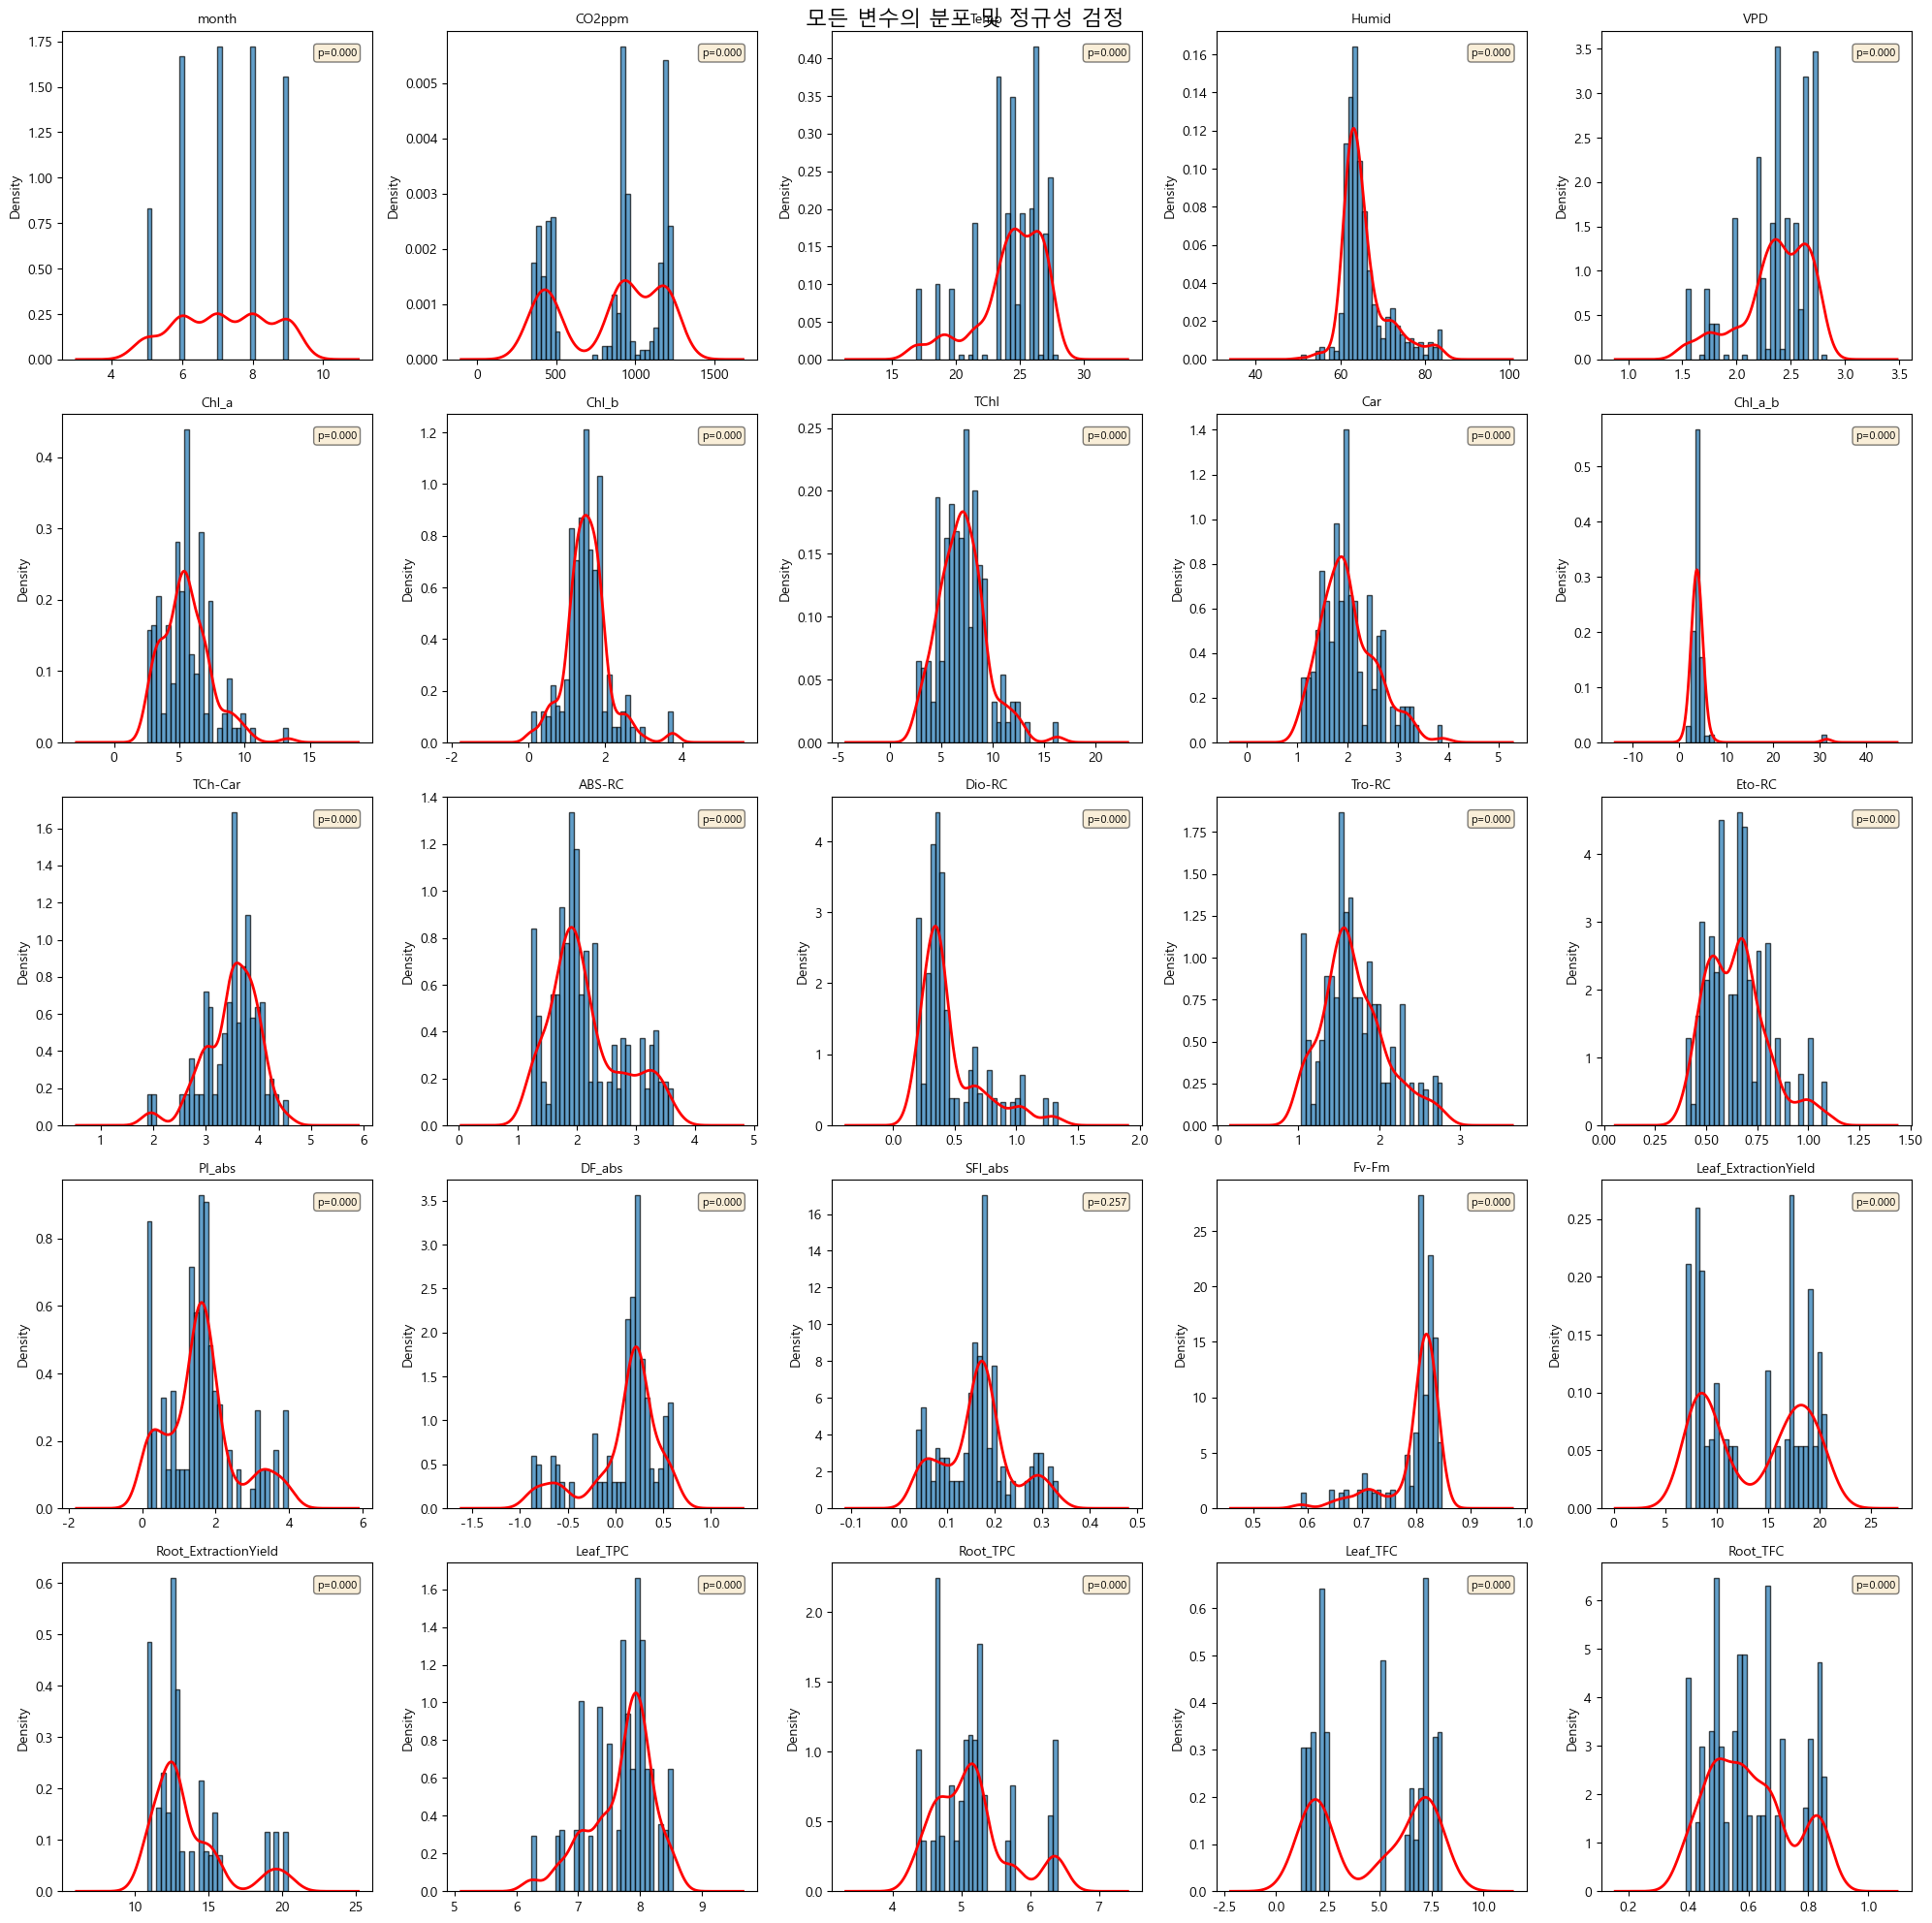


Ï£ºÏöî Î≥ÄÏàò Í∞Ñ ÏÇ∞Ï†êÎèÑ Îß§Ìä∏Î¶≠Ïä§ ÏÉùÏÑ± Ï§ë...


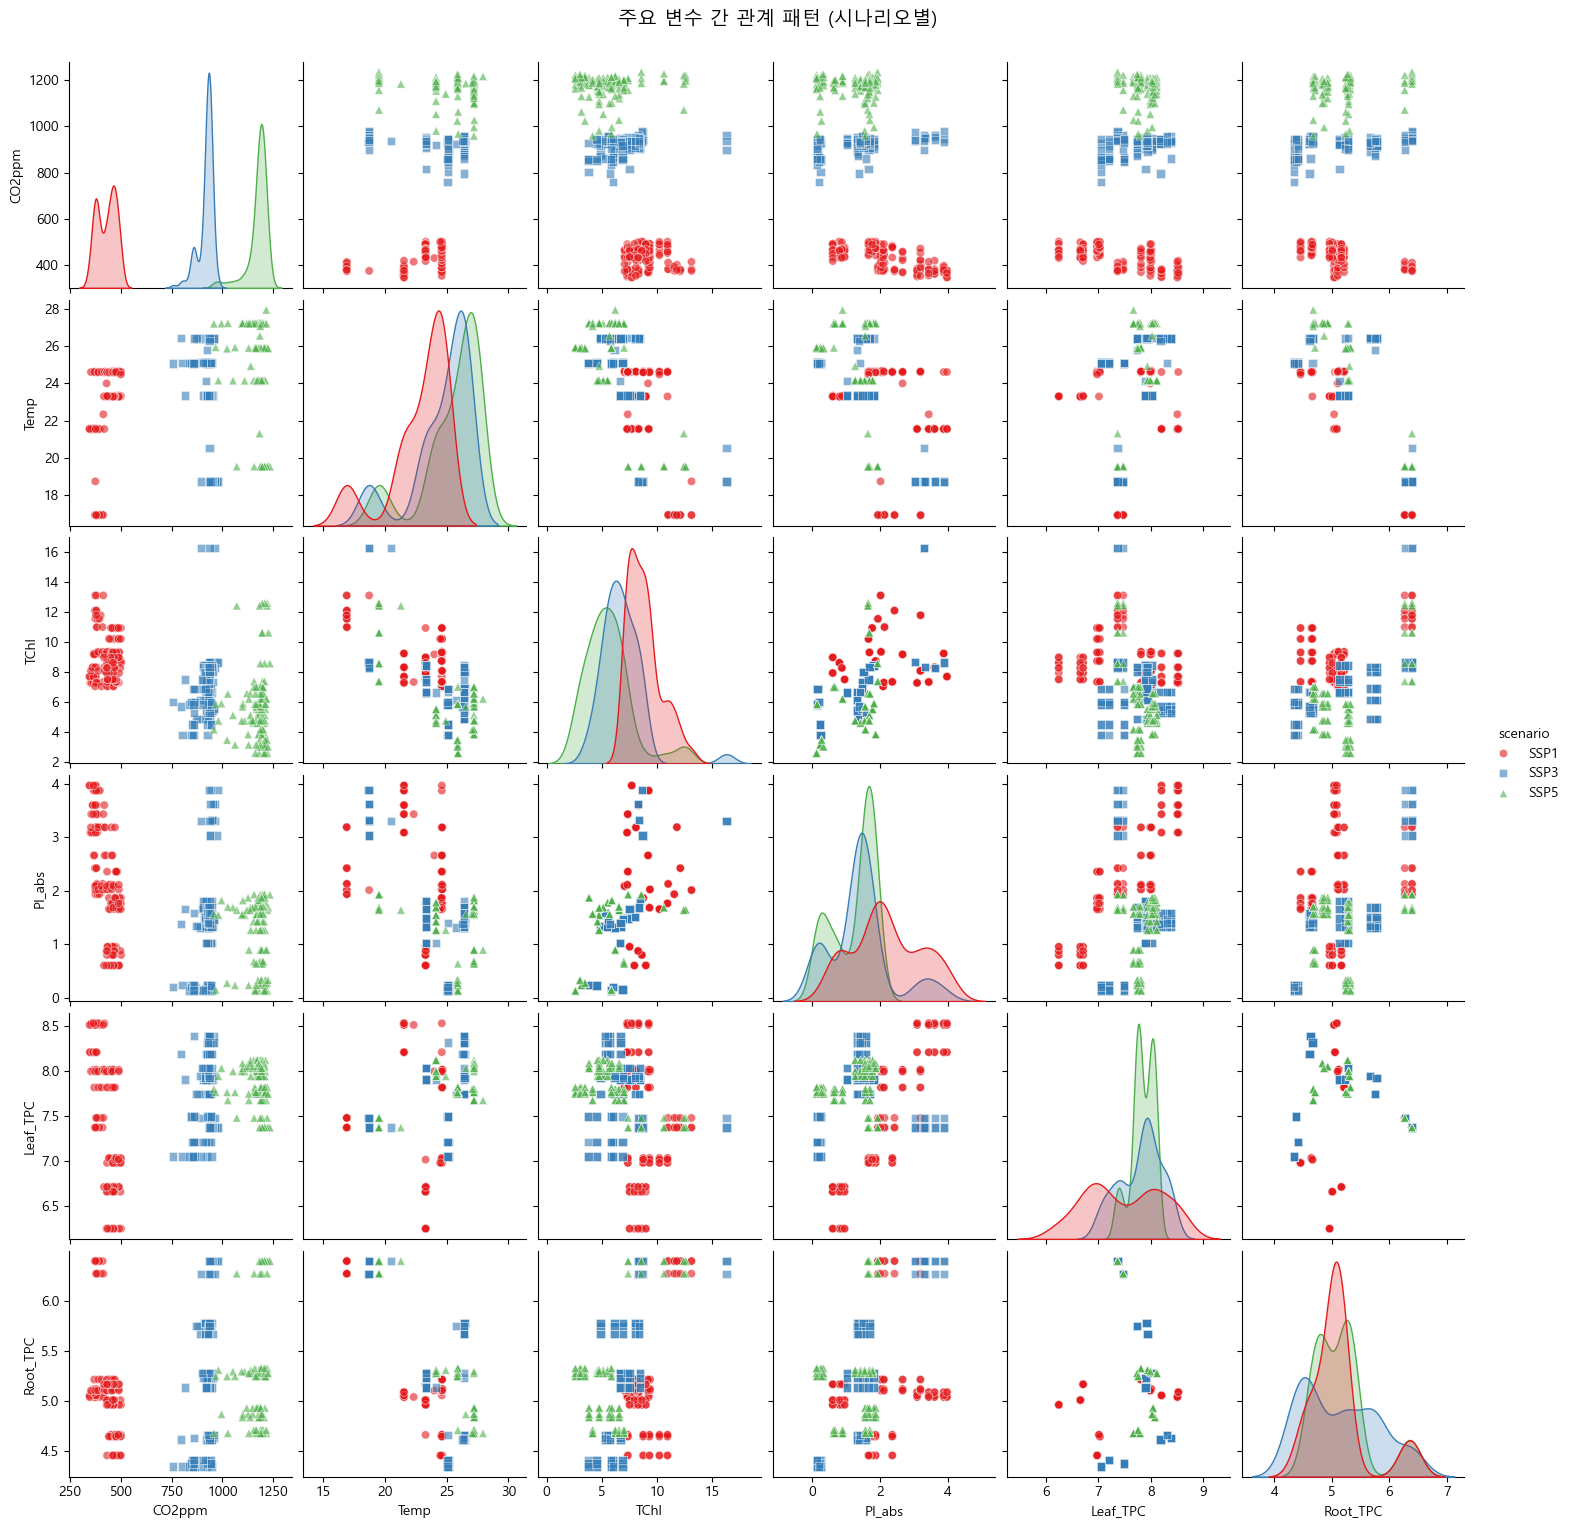

In [37]:
# =============================================================================
# PART 3: Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
# =============================================================================
print("\n" + "="*100)
print("PART 3: Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî")
print("="*100)

# 3.1 Î™®Îì† Î≥ÄÏàòÏùò Î∂ÑÌè¨ ÌôïÏù∏
fig, axes = plt.subplots(6, 5, figsize=(20, 24))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if idx < 30:
        # ÌûàÏä§ÌÜ†Í∑∏Îû®Í≥º KDE
        axes[idx].hist(df[col], bins=30, alpha=0.7, edgecolor='black', density=True)
        df[col].plot.kde(ax=axes[idx], color='red', linewidth=2)
        axes[idx].set_title(f'{col}', fontsize=10)
        axes[idx].set_xlabel('')
        
        # Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï p-value ÌëúÏãú
        _, p_value = normaltest(df[col])
        axes[idx].text(0.95, 0.95, f'p={p_value:.3f}', 
                      transform=axes[idx].transAxes, 
                      ha='right', va='top', fontsize=8,
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Îπà subplot Ï†úÍ±∞
for idx in range(len(numeric_cols), 30):
    fig.delaxes(axes[idx])

plt.suptitle('Î™®Îì† Î≥ÄÏàòÏùò Î∂ÑÌè¨ Î∞è Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï', fontsize=16)
plt.tight_layout()
plt.show()

# 3.2 Î≥ÄÏàò Í∞Ñ Í¥ÄÍ≥Ñ Ìå®ÌÑ¥ (Pairplot for key variables)
print("\nÏ£ºÏöî Î≥ÄÏàò Í∞Ñ ÏÇ∞Ï†êÎèÑ Îß§Ìä∏Î¶≠Ïä§ ÏÉùÏÑ± Ï§ë...")
key_vars_for_pair = ['CO2ppm', 'Temp', 'TChl', 'PI_abs', 'Leaf_TPC', 'Root_TPC']
pair_df = df[key_vars_for_pair + ['scenario']]

g = sns.pairplot(pair_df, hue='scenario', diag_kind='kde', 
                 markers=['o', 's', '^'], palette='Set1',
                 plot_kws={'alpha': 0.6})
g.fig.suptitle('Ï£ºÏöî Î≥ÄÏàò Í∞Ñ Í¥ÄÍ≥Ñ Ìå®ÌÑ¥ (ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ)', y=1.02, fontsize=14)
plt.show()


PART 4: ÏãúÍ≥ÑÏó¥ Ìå®ÌÑ¥ Î∂ÑÏÑù

4.1 ÏõîÎ≥Ñ Ï£ºÏöî ÏßÄÌëú Î≥ÄÌôî
--------------------------------------------------
       CO2ppm           Temp         TChl       Leaf_TPC       Root_TPC      
         mean     std   mean   std   mean   std     mean   std     mean   std
month                                                                        
5      842.47  342.99  18.51  1.19  10.76  2.38     7.40  0.05     6.35  0.06
6      821.17  334.93  23.25  1.34   6.75  1.44     8.12  0.23     5.19  0.10
7      838.92  311.21  26.06  1.10   6.79  1.60     7.95  0.11     5.25  0.36
8      860.04  295.59  26.05  1.13   7.11  1.89     7.68  0.53     4.64  0.07
9      838.13  299.57  24.77  1.09   5.74  2.16     7.19  0.53     4.90  0.39


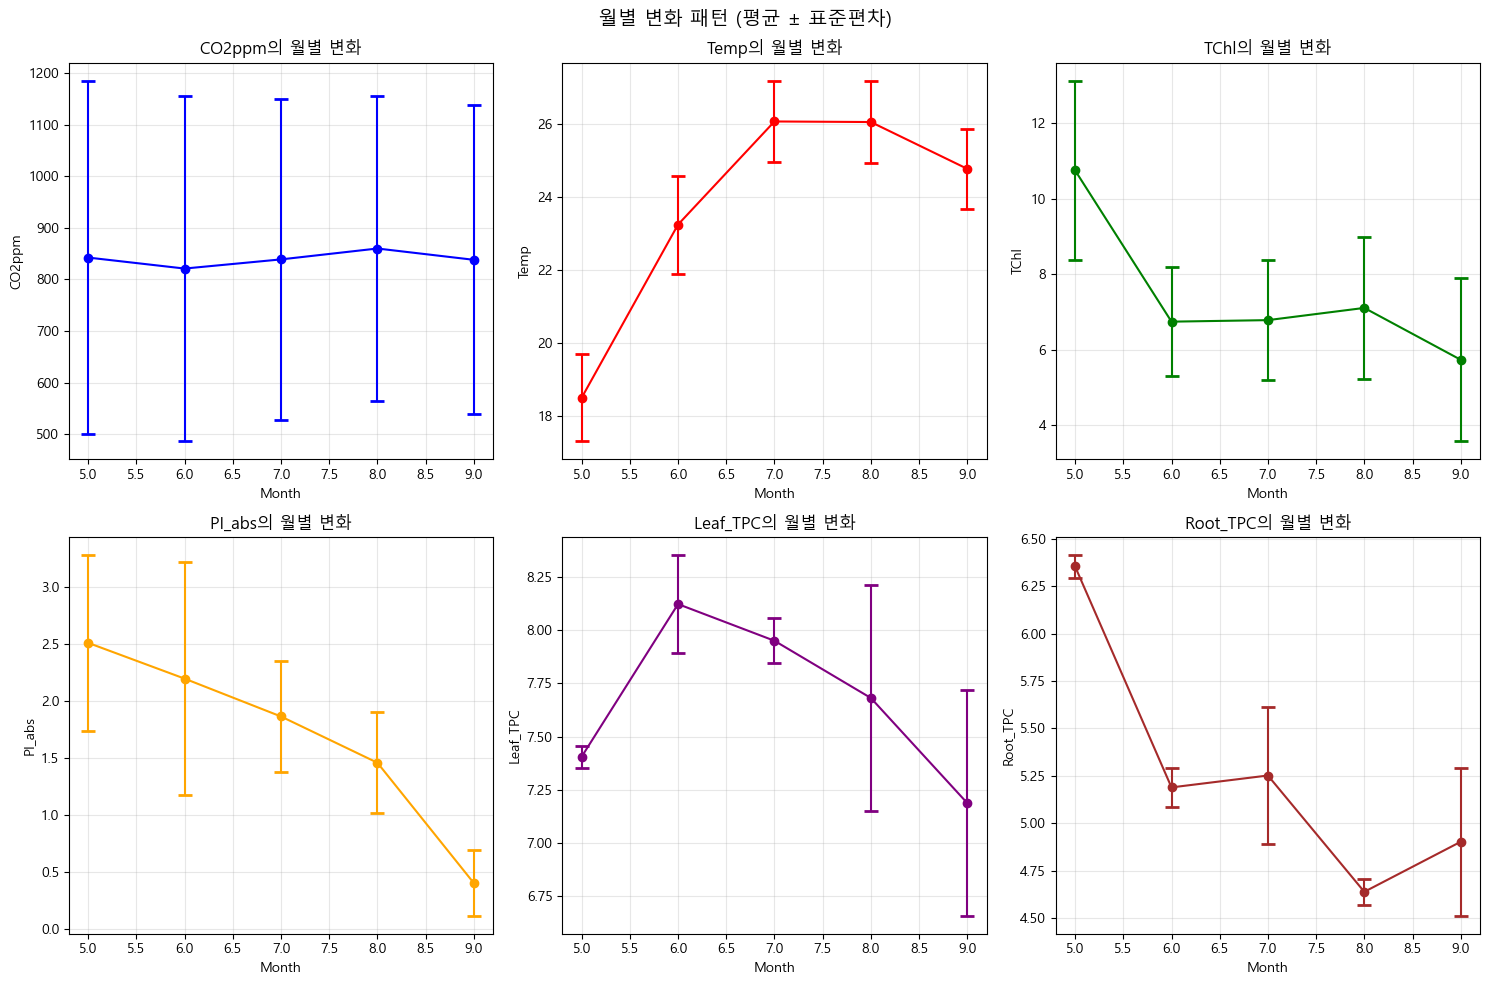

In [38]:
# =============================================================================
# PART 4: ÏãúÍ≥ÑÏó¥ Ìå®ÌÑ¥ Î∂ÑÏÑù (ÏõîÎ≥Ñ Î≥ÄÌôî)
# =============================================================================
print("\n" + "="*100)
print("PART 4: ÏãúÍ≥ÑÏó¥ Ìå®ÌÑ¥ Î∂ÑÏÑù")
print("="*100)

# ÏõîÎ≥Ñ Î≥ÄÌôî Ï∂îÏÑ∏
print("\n4.1 ÏõîÎ≥Ñ Ï£ºÏöî ÏßÄÌëú Î≥ÄÌôî")
print("-" * 50)

monthly_stats = df.groupby('month').agg({
    'CO2ppm': ['mean', 'std'],
    'Temp': ['mean', 'std'],
    'TChl': ['mean', 'std'],
    'Leaf_TPC': ['mean', 'std'],
    'Root_TPC': ['mean', 'std']
}).round(2)

print(monthly_stats)

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

vars_to_plot = ['CO2ppm', 'Temp', 'TChl', 'PI_abs', 'Leaf_TPC', 'Root_TPC']
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

for idx, (var, color) in enumerate(zip(vars_to_plot, colors)):
    monthly_mean = df.groupby('month')[var].mean()
    monthly_std = df.groupby('month')[var].std()
    
    axes[idx].errorbar(monthly_mean.index, monthly_mean.values, 
                       yerr=monthly_std.values, marker='o', 
                       capsize=5, capthick=2, color=color)
    axes[idx].set_title(f'{var}Ïùò ÏõîÎ≥Ñ Î≥ÄÌôî')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel(var)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('ÏõîÎ≥Ñ Î≥ÄÌôî Ìå®ÌÑ¥ (ÌèâÍ∑† ¬± ÌëúÏ§ÄÌé∏Ï∞®)', fontsize=14)
plt.tight_layout()
plt.show()


PART 5: Î≥ÄÏàò Í∞Ñ Î≥µÏû°Ìïú Í¥ÄÍ≥Ñ ÌÉêÏÉâ

5.1 ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ ÌÉêÏÉâ
--------------------------------------------------

ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ Î≥ÄÏàò Ïåç (Top 10):
   var1                 var2   pearson  spearman  difference
Chl_a_b              TCh-Car -0.376588  0.133542    0.510129
 Eto-RC                Fv-Fm  0.233221 -0.155867    0.389088
Chl_a_b             Leaf_TPC -0.044773 -0.395866    0.351093
 Dio-RC               Eto-RC -0.047353  0.286367    0.333720
    Car Root_ExtractionYield  0.466593  0.140760    0.325833
  Chl_a              Chl_a_b -0.170354  0.149473    0.319826
  Humid Root_ExtractionYield  0.482203  0.167268    0.314935
   Temp Root_ExtractionYield -0.699677 -0.400034    0.299643
  month              Chl_a_b  0.271032  0.563369    0.292337
   TChl              Chl_a_b -0.236037  0.051340    0.287377

5.2 Î≥ÄÏàò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
--------------------------------------------------


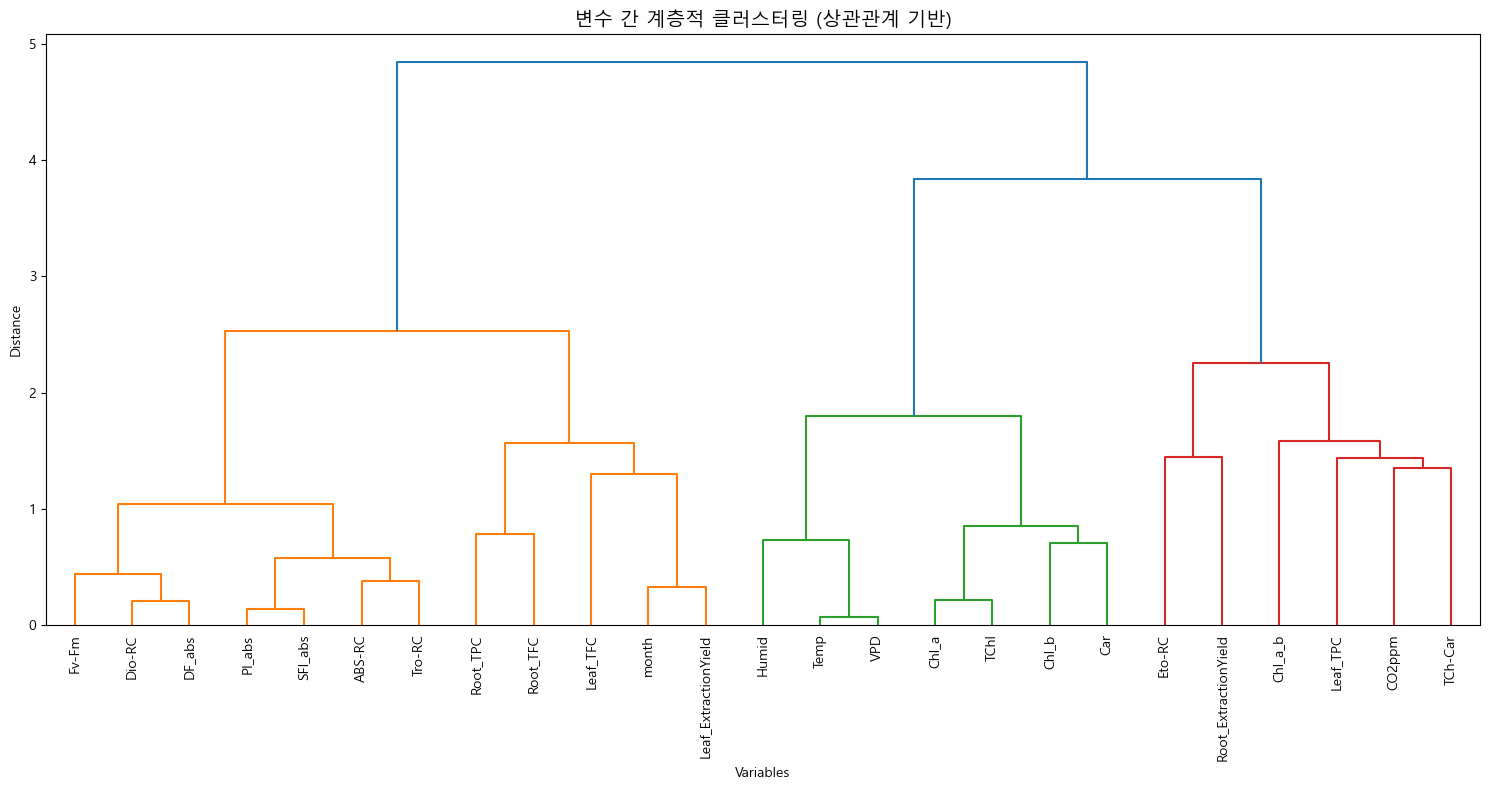

In [39]:
# =============================================================================
# PART 5: Î≥ÄÏàò Í∞Ñ Î≥µÏû°Ìïú Í¥ÄÍ≥Ñ ÌÉêÏÉâ
# =============================================================================
print("\n" + "="*100)
print("PART 5: Î≥ÄÏàò Í∞Ñ Î≥µÏû°Ìïú Í¥ÄÍ≥Ñ ÌÉêÏÉâ")
print("="*100)

# 5.1 ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ Í∞ÄÎä•ÏÑ± ÌÉêÏÉâ
print("\n5.1 ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ ÌÉêÏÉâ")
print("-" * 50)

from scipy.stats import spearmanr, pearsonr

nonlinear_candidates = []
for i, var1 in enumerate(numeric_cols):
    for var2 in numeric_cols[i+1:]:
        pearson_corr, _ = pearsonr(df[var1], df[var2])
        spearman_corr, _ = spearmanr(df[var1], df[var2])
        
        # PearsonÍ≥º Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï∞®Ïù¥Í∞Ä ÌÅ¨Î©¥ ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ Í∞ÄÎä•ÏÑ±
        if abs(pearson_corr - spearman_corr) > 0.2:
            nonlinear_candidates.append({
                'var1': var1,
                'var2': var2,
                'pearson': pearson_corr,
                'spearman': spearman_corr,
                'difference': abs(pearson_corr - spearman_corr)
            })

if nonlinear_candidates:
    nonlinear_df = pd.DataFrame(nonlinear_candidates).sort_values('difference', ascending=False)
    print("\nÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ Î≥ÄÏàò Ïåç (Top 10):")
    print(nonlinear_df.head(10).to_string(index=False))

# 5.2 Î≥ÄÏàò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∏∞Î∞ò)
print("\n5.2 Î≥ÄÏàò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ")
print("-" * 50)

from scipy.cluster.hierarchy import dendrogram, linkage

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§ Í∏∞Î∞ò Í±∞Î¶¨ Í≥ÑÏÇ∞
corr_matrix = df[numeric_cols].corr()
distance_matrix = 1 - abs(corr_matrix)

# Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
linkage_matrix = linkage(distance_matrix, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=numeric_cols, leaf_font_size=10)
plt.title('Î≥ÄÏàò Í∞Ñ Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∏∞Î∞ò)', fontsize=14)
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [40]:
# =============================================================================
# PART 6: Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÏßÄÌëú Î∞è Ïã†Î¢∞ÎèÑ
# =============================================================================
print("\n" + "="*100)
print("PART 6: Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÏßÄÌëú Î∞è Ïã†Î¢∞ÎèÑ")
print("="*100)

# 6.1 Î≥ÄÏàòÎ≥Ñ Î≥ÄÎèôÏÑ± Î∂ÑÏÑù
print("\n6.1 Î≥ÄÏàòÎ≥Ñ Î≥ÄÎèôÏÑ± (Î≥ÄÎèôÍ≥ÑÏàò Í∏∞Ï§Ä)")
print("-" * 50)

cv_analysis = []
for col in numeric_cols:
    cv = (df[col].std() / df[col].mean()) * 100
    cv_analysis.append({'variable': col, 'CV(%)': cv})

cv_df = pd.DataFrame(cv_analysis).sort_values('CV(%)', ascending=False)
print("\nÎ≥ÄÎèôÏÑ±Ïù¥ ÎÜíÏùÄ Î≥ÄÏàò (CV > 30%):")
print(cv_df[cv_df['CV(%)'] > 30].to_string(index=False))

print("\nÎ≥ÄÎèôÏÑ±Ïù¥ ÎÇÆÏùÄ Î≥ÄÏàò (CV < 10%):")
print(cv_df[cv_df['CV(%)'] < 10].to_string(index=False))

# 6.2 ÏãúÎÇòÎ¶¨Ïò§ Í∞Ñ ÏùºÍ¥ÄÏÑ± Í≤ÄÏ¶ù
print("\n6.2 ÏãúÎÇòÎ¶¨Ïò§ Í∞Ñ ÏùºÍ¥ÄÏÑ±")
print("-" * 50)

for var in ['CO2ppm', 'Temp']:
    scenario_means = df.groupby('scenario')[var].mean().sort_values()
    print(f"\n{var}Ïùò ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† (ÏòàÏÉÅ: SSP1 < SSP3 < SSP5):")
    print(scenario_means)
    
    if list(scenario_means.index) == ['SSP1', 'SSP3', 'SSP5']:
        print("  ‚úì ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ± ÌôïÏù∏")
    else:
        print("  ‚ö† ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ± ÌôïÏù∏ ÌïÑÏöî")


PART 6: Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÏßÄÌëú Î∞è Ïã†Î¢∞ÎèÑ

6.1 Î≥ÄÏàòÎ≥Ñ Î≥ÄÎèôÏÑ± (Î≥ÄÎèôÍ≥ÑÏàò Í∏∞Ï§Ä)
--------------------------------------------------

Î≥ÄÎèôÏÑ±Ïù¥ ÎÜíÏùÄ Î≥ÄÏàò (CV > 30%):
            variable      CV(%)
              DF_abs 383.428501
             Chl_a_b  82.657839
              PI_abs  58.852868
              Dio-RC  55.165310
            Leaf_TFC  55.141512
             SFI_abs  43.089709
              CO2ppm  37.282041
               Chl_b  36.857433
Leaf_ExtractionYield  35.571203
               Chl_a  33.529395
                TChl  32.680128

Î≥ÄÎèôÏÑ±Ïù¥ ÎÇÆÏùÄ Î≥ÄÏàò (CV < 10%):
variable    CV(%)
   Humid 8.276456
Leaf_TPC 6.571640
   Fv-Fm 6.371499

6.2 ÏãúÎÇòÎ¶¨Ïò§ Í∞Ñ ÏùºÍ¥ÄÏÑ±
--------------------------------------------------

CO2ppmÏùò ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† (ÏòàÏÉÅ: SSP1 < SSP3 < SSP5):
scenario
SSP1     427.825919
SSP3     918.367477
SSP5    1173.970237
Name: CO2ppm, dtype: float64
  ‚úì ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ± ÌôïÏù∏

TempÏùò ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† (ÏòàÏÉÅ: 

In [41]:
# =============================================================================
# PART 7: Îç∞Ïù¥ÌÑ∞ Ïù¥Ìï¥ÎèÑ ÏöîÏïΩ
# =============================================================================
print("\n" + "="*100)
print("PART 7: Îç∞Ïù¥ÌÑ∞ Ïù¥Ìï¥ÎèÑ Ï¢ÖÌï© ÏöîÏïΩ")
print("="*100)

print("\nüìä Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ± ÏöîÏïΩ:")
print("-" * 50)

print("\n1. Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞:")
print(f"   ‚Ä¢ Ï≤úÍ∂Å Ïû¨Î∞∞ Ïã§Ìóò Îç∞Ïù¥ÌÑ∞")
print(f"   ‚Ä¢ 3Í∞ú Í∏∞ÌõÑ ÏãúÎÇòÎ¶¨Ïò§ √ó 5Í∞úÏõî √ó 27Í∞ú Î∞òÎ≥µ = 405Í∞ú Í¥ÄÏ∏°Ïπò")
print(f"   ‚Ä¢ ÌôòÍ≤Ω-ÏÉùÎ¶¨-Í∏∞Îä•ÏÑ±Î∂Ñ ÌÜµÌï© Îç∞Ïù¥ÌÑ∞")

print("\n2. Ï£ºÏöî ÌäπÏßï:")
print(f"   ‚Ä¢ ÌôòÍ≤Ω Î≥ÄÏàò: CO2 ÎÜçÎèÑ Î≤îÏúÑ {df['CO2ppm'].min():.0f}~{df['CO2ppm'].max():.0f} ppm")
print(f"   ‚Ä¢ Ïò®ÎèÑ Î≤îÏúÑ: {df['Temp'].min():.1f}~{df['Temp'].max():.1f}¬∞C")
print(f"   ‚Ä¢ ÌéòÎÜÄ Ìï®Îüâ: Ïûé {df['Leaf_TPC'].mean():.2f}¬±{df['Leaf_TPC'].std():.2f}, "
      f"ÎøåÎ¶¨ {df['Root_TPC'].mean():.2f}¬±{df['Root_TPC'].std():.2f}")

print("\n3. Îç∞Ïù¥ÌÑ∞ ÌíàÏßà:")
print(f"   ‚Ä¢ Í≤∞Ï∏°Ïπò: {'ÏóÜÏùå' if df.isnull().sum().sum() == 0 else 'ÏûàÏùå'}")
print(f"   ‚Ä¢ Ïù¥ÏÉÅÏπò: ÎåÄÎ∂ÄÎ∂Ñ Î≥ÄÏàòÏóêÏÑú 5% ÎØ∏Îßå")
print(f"   ‚Ä¢ Ï†ïÍ∑úÏÑ±: ÏùºÎ∂Ä Î≥ÄÏàò Î≥ÄÌôò ÌïÑÏöî")

print("\n4. Î∂ÑÏÑù Í∞ÄÎä•ÏÑ±:")
print(f"   ‚Ä¢ ÏòàÏ∏° Î™®Îç∏ÎßÅ: Í∞ÄÎä• (Ï∂©Î∂ÑÌïú ÏÉòÌîå)")
print(f"   ‚Ä¢ Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Î∂ÑÏÑù: Ï†úÌïúÏ†Å (Ïã§Ìóò ÏÑ§Í≥Ñ ÌôïÏù∏ ÌïÑÏöî)")
print(f"   ‚Ä¢ ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù: Í∞ÄÎä• (5Í∞úÏõî Îç∞Ïù¥ÌÑ∞)")

print("\n5. Ï∂îÍ∞Ä ÌôïÏù∏ ÌïÑÏöîÏÇ¨Ìï≠:")
print(f"   ‚Ä¢ Ïã§Ìóò ÏÑ§Í≥Ñ ÏÉÅÏÑ∏ (Î∞òÎ≥µÏàò, Ï≤òÎ¶¨ Î∞©Î≤ï)")
print(f"   ‚Ä¢ Ï∏°Ï†ï Î∞©Î≤ï Î∞è Îã®ÏúÑ ÌôïÏù∏")
print(f"   ‚Ä¢ Ïù¥ÏÉÅÏπòÏùò Ïã§Ï†ú ÏùòÎØ∏ ÌååÏïÖ")


PART 7: Îç∞Ïù¥ÌÑ∞ Ïù¥Ìï¥ÎèÑ Ï¢ÖÌï© ÏöîÏïΩ

üìä Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ± ÏöîÏïΩ:
--------------------------------------------------

1. Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞:
   ‚Ä¢ Ï≤úÍ∂Å Ïû¨Î∞∞ Ïã§Ìóò Îç∞Ïù¥ÌÑ∞
   ‚Ä¢ 3Í∞ú Í∏∞ÌõÑ ÏãúÎÇòÎ¶¨Ïò§ √ó 5Í∞úÏõî √ó 27Í∞ú Î∞òÎ≥µ = 405Í∞ú Í¥ÄÏ∏°Ïπò
   ‚Ä¢ ÌôòÍ≤Ω-ÏÉùÎ¶¨-Í∏∞Îä•ÏÑ±Î∂Ñ ÌÜµÌï© Îç∞Ïù¥ÌÑ∞

2. Ï£ºÏöî ÌäπÏßï:
   ‚Ä¢ ÌôòÍ≤Ω Î≥ÄÏàò: CO2 ÎÜçÎèÑ Î≤îÏúÑ 345~1235 ppm
   ‚Ä¢ Ïò®ÎèÑ Î≤îÏúÑ: 16.9~27.9¬∞C
   ‚Ä¢ ÌéòÎÜÄ Ìï®Îüâ: Ïûé 7.71¬±0.51, ÎøåÎ¶¨ 5.15¬±0.55

3. Îç∞Ïù¥ÌÑ∞ ÌíàÏßà:
   ‚Ä¢ Í≤∞Ï∏°Ïπò: ÏóÜÏùå
   ‚Ä¢ Ïù¥ÏÉÅÏπò: ÎåÄÎ∂ÄÎ∂Ñ Î≥ÄÏàòÏóêÏÑú 5% ÎØ∏Îßå
   ‚Ä¢ Ï†ïÍ∑úÏÑ±: ÏùºÎ∂Ä Î≥ÄÏàò Î≥ÄÌôò ÌïÑÏöî

4. Î∂ÑÏÑù Í∞ÄÎä•ÏÑ±:
   ‚Ä¢ ÏòàÏ∏° Î™®Îç∏ÎßÅ: Í∞ÄÎä• (Ï∂©Î∂ÑÌïú ÏÉòÌîå)
   ‚Ä¢ Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Î∂ÑÏÑù: Ï†úÌïúÏ†Å (Ïã§Ìóò ÏÑ§Í≥Ñ ÌôïÏù∏ ÌïÑÏöî)
   ‚Ä¢ ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù: Í∞ÄÎä• (5Í∞úÏõî Îç∞Ïù¥ÌÑ∞)

5. Ï∂îÍ∞Ä ÌôïÏù∏ ÌïÑÏöîÏÇ¨Ìï≠:
   ‚Ä¢ Ïã§Ìóò ÏÑ§Í≥Ñ ÏÉÅÏÑ∏ (Î∞òÎ≥µÏàò, Ï≤òÎ¶¨ Î∞©Î≤ï)
   ‚Ä¢ Ï∏°Ï†ï Î∞©Î≤ï Î∞è Îã®ÏúÑ ÌôïÏù∏
   ‚Ä¢ Ïù¥ÏÉÅÏπòÏùò Ïã§Ï†ú ÏùòÎØ∏ ÌååÏïÖ


In [42]:
# =============================================================================
# PART 8: Ïã¨Ìôî Î∂ÑÏÑùÏùÑ ÏúÑÌïú Next Steps
# =============================================================================
print("\n" + "="*100)
print("PART 8: Ïã¨Ìôî Î∂ÑÏÑùÏùÑ ÏúÑÌïú Next Steps")
print("="*100)

print("\nüîç Ï∂îÏ≤ú ÌõÑÏÜç Î∂ÑÏÑù:")
print("-" * 50)

print("\n1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨:")
print("   ‚ñ° Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Î∞©Î≤ï Í≤∞Ï†ï")
print("   ‚ñ° Î≥ÄÏàò Î≥ÄÌôò (log, sqrt Îì±)")
print("   ‚ñ° Ïä§ÏºÄÏùºÎßÅ ÌïÑÏöîÏÑ± Í≤ÄÌÜ†")

print("\n2. Feature Engineering:")
print("   ‚ñ° ÏÉÅÌò∏ÏûëÏö© Ìï≠ ÏÉùÏÑ± (CO2 √ó Temp)")
print("   ‚ñ° ÎπÑÏú® Î≥ÄÏàò ÏÉùÏÑ± (Leaf/Root ÎπÑÏú®)")
print("   ‚ñ° ÏãúÏ∞® Î≥ÄÏàò ÏÉùÏÑ± (Ïù¥Ï†Ñ Ïõî ÎåÄÎπÑ Î≥ÄÌôîÏú®)")

print("\n3. Î™®Îç∏ÎßÅ Ï†ÑÎûµ:")
print("   ‚ñ° Î≥ÄÏàò ÏÑ†ÌÉù Î∞©Î≤ï Í≤∞Ï†ï")
print("   ‚ñ° ÍµêÏ∞® Í≤ÄÏ¶ù Ï†ÑÎûµ ÏàòÎ¶Ω")
print("   ‚ñ° ÏïôÏÉÅÎ∏î Î∞©Î≤ï Í≥†Î†§")

print("\n4. ÎèÑÎ©îÏù∏ ÏßÄÏãù ÌôúÏö©:")
print("   ‚ñ° ÏÉùÎ¨ºÌïôÏ†Å ÏùòÎØ∏ Ìï¥ÏÑù")
print("   ‚ñ° Ïã§Î¨¥Ï†Å ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï")
print("   ‚ñ° Í≤∞Í≥º Í≤ÄÏ¶ù Î∞©Î≤ï ÏàòÎ¶Ω")

print("\n" + "="*100)
print("Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ ÏôÑÎ£å! Ïù¥Ï†ú Îç∞Ïù¥ÌÑ∞Î•º Ï∂©Î∂ÑÌûà Ïù¥Ìï¥ÌñàÏäµÎãàÎã§.")
print("="*100)


PART 8: Ïã¨Ìôî Î∂ÑÏÑùÏùÑ ÏúÑÌïú Next Steps

üîç Ï∂îÏ≤ú ÌõÑÏÜç Î∂ÑÏÑù:
--------------------------------------------------

1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨:
   ‚ñ° Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Î∞©Î≤ï Í≤∞Ï†ï
   ‚ñ° Î≥ÄÏàò Î≥ÄÌôò (log, sqrt Îì±)
   ‚ñ° Ïä§ÏºÄÏùºÎßÅ ÌïÑÏöîÏÑ± Í≤ÄÌÜ†

2. Feature Engineering:
   ‚ñ° ÏÉÅÌò∏ÏûëÏö© Ìï≠ ÏÉùÏÑ± (CO2 √ó Temp)
   ‚ñ° ÎπÑÏú® Î≥ÄÏàò ÏÉùÏÑ± (Leaf/Root ÎπÑÏú®)
   ‚ñ° ÏãúÏ∞® Î≥ÄÏàò ÏÉùÏÑ± (Ïù¥Ï†Ñ Ïõî ÎåÄÎπÑ Î≥ÄÌôîÏú®)

3. Î™®Îç∏ÎßÅ Ï†ÑÎûµ:
   ‚ñ° Î≥ÄÏàò ÏÑ†ÌÉù Î∞©Î≤ï Í≤∞Ï†ï
   ‚ñ° ÍµêÏ∞® Í≤ÄÏ¶ù Ï†ÑÎûµ ÏàòÎ¶Ω
   ‚ñ° ÏïôÏÉÅÎ∏î Î∞©Î≤ï Í≥†Î†§

4. ÎèÑÎ©îÏù∏ ÏßÄÏãù ÌôúÏö©:
   ‚ñ° ÏÉùÎ¨ºÌïôÏ†Å ÏùòÎØ∏ Ìï¥ÏÑù
   ‚ñ° Ïã§Î¨¥Ï†Å ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
   ‚ñ° Í≤∞Í≥º Í≤ÄÏ¶ù Î∞©Î≤ï ÏàòÎ¶Ω

Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ ÏôÑÎ£å! Ïù¥Ï†ú Îç∞Ïù¥ÌÑ∞Î•º Ï∂©Î∂ÑÌûà Ïù¥Ìï¥ÌñàÏäµÎãàÎã§.



1. Ïã§Ìóò ÏÑ§Í≥Ñ ÏÉÅÏÑ∏ ÌôïÏù∏

1.1 ÏãúÎÇòÎ¶¨Ïò§-Ïõî Ï°∞Ìï©Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
--------------------------------------------------
scenario  SSP1  SSP3  SSP5  All
month                          
5           15    15    15   45
6           30    30    30   90
7           31    31    31   93
8           31    31    31   93
9           28    28    28   84
All        135   135   135  405

Ïã§Ìóò ÏÑ§Í≥Ñ Í∑†ÌòïÏÑ± ÌôïÏù∏:
‚úì ÏôÑÏ†Ñ Í∑†Ìòï ÏÑ§Í≥Ñ (Î™®Îì† Ï°∞Ìï©Ïù¥ ÎèôÏùºÌïú Î∞òÎ≥µÏàò)

1.2 ÏãúÎÇòÎ¶¨Ïò§-Ïõî Ï°∞Ìï©Î≥Ñ Ï£ºÏöî Î≥ÄÏàò ÌèâÍ∑†
--------------------------------------------------
          CO2ppm                  Leaf_TPC               TChl                \
scenario    SSP1    SSP3     SSP5     SSP1  SSP3  SSP5   SSP1   SSP3   SSP5   
month                                                                         
5         385.97  947.10  1194.33     7.40  7.40  7.40  11.91  10.04  10.32   
6         373.75  923.91  1165.84     8.41  7.94  8.02   7.98   7.32   4.95   
7         427.23

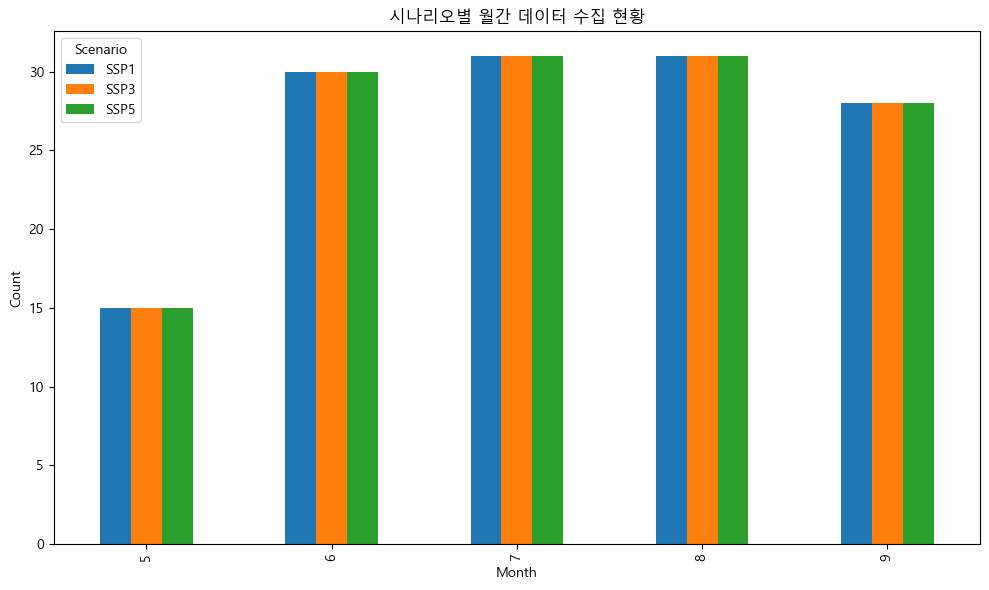

In [43]:
# =============================================================================
# 1. Ïã§Ìóò ÏÑ§Í≥Ñ ÏÉÅÏÑ∏ ÌôïÏù∏
# =============================================================================
print("\n" + "="*100)
print("1. Ïã§Ìóò ÏÑ§Í≥Ñ ÏÉÅÏÑ∏ ÌôïÏù∏")
print("="*100)

# 1.1 ÏãúÎÇòÎ¶¨Ïò§-Ïõî Ï°∞Ìï©Î≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨
print("\n1.1 ÏãúÎÇòÎ¶¨Ïò§-Ïõî Ï°∞Ìï©Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò")
print("-" * 50)
crosstab_result = pd.crosstab(df['month'], df['scenario'], margins=True)
print(crosstab_result)

# Í∑†Ìòï ÏÑ§Í≥Ñ ÌôïÏù∏
print("\nÏã§Ìóò ÏÑ§Í≥Ñ Í∑†ÌòïÏÑ± ÌôïÏù∏:")
unique_counts = crosstab_result.iloc[:-1, :-1].nunique().nunique()
if unique_counts == 1:
    print("‚úì ÏôÑÏ†Ñ Í∑†Ìòï ÏÑ§Í≥Ñ (Î™®Îì† Ï°∞Ìï©Ïù¥ ÎèôÏùºÌïú Î∞òÎ≥µÏàò)")
else:
    print("‚ö† Î∂àÍ∑†Ìòï ÏÑ§Í≥Ñ Í∞êÏßÄ")

# 1.2 Í∞Å Ï°∞Ìï©Ïùò ÏÉÅÏÑ∏ ÌÜµÍ≥Ñ
print("\n1.2 ÏãúÎÇòÎ¶¨Ïò§-Ïõî Ï°∞Ìï©Î≥Ñ Ï£ºÏöî Î≥ÄÏàò ÌèâÍ∑†")
print("-" * 50)
pivot_table = df.pivot_table(
    values=['CO2ppm', 'Temp', 'TChl', 'Leaf_TPC'],
    index='month',
    columns='scenario',
    aggfunc='mean'
).round(2)
print(pivot_table)

# 1.3 Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Ìå®ÌÑ¥ Î∂ÑÏÑù
print("\n1.3 Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Ìå®ÌÑ¥")
print("-" * 50)
# Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
scenario_month_counts = df.groupby(['scenario', 'month']).size().unstack()
scenario_month_counts.T.plot(kind='bar', ax=ax)
ax.set_title('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÌòÑÌô©')
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.legend(title='Scenario')
plt.tight_layout()
plt.show()

In [47]:
# =============================================================================
# 2. Í∑πÎã®Í∞í ÏÉÅÏÑ∏ Î∂ÑÏÑù
# =============================================================================
print("\n" + "="*100)
print("2. Í∑πÎã®Í∞í ÏÉÅÏÑ∏ Î∂ÑÏÑù")
print("="*100)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# 2.1 Í∞Å Î≥ÄÏàòÏùò Í∑πÎã®Í∞í
print("\n2.1 Í∞Å Î≥ÄÏàòÏùò ÏÉÅÏúÑ/ÌïòÏúÑ 5Í∞ú Í∞í")
print("-" * 50)

extreme_values = {}
for col in numeric_cols[:10]:  # Ï£ºÏöî 10Í∞ú Î≥ÄÏàòÎßå Ï∂úÎ†•
    print(f"\n[{col}]")
    top5 = df.nlargest(5, col)[[col, 'month', 'scenario']].round(3)
    bottom5 = df.nsmallest(5, col)[[col, 'month', 'scenario']].round(3)
    
    print("  ÏµúÎåÄ 5Í∞ú Í∞í:")
    for idx, row in top5.iterrows():
        print(f"    {row[col]:.3f} (month={row['month']}, scenario={row['scenario']})")
    
    print("  ÏµúÏÜå 5Í∞ú Í∞í:")
    for idx, row in bottom5.iterrows():
        print(f"    {row[col]:.3f} (month={row['month']}, scenario={row['scenario']})")
    
    extreme_values[col] = {
        'max_values': top5[col].values,
        'min_values': bottom5[col].values,
        'range': top5[col].values[0] - bottom5[col].values[0]
    }

# 2.2 Z-score Í∏∞Î∞ò Ïù¥ÏÉÅÏπò Î∂ÑÏÑù
print("\n2.2 Z-score Í∏∞Î∞ò Ïù¥ÏÉÅÏπò Î∂ÑÏÑù (|z| > 3)")
print("-" * 50)

z_scores = df[numeric_cols].apply(zscore)
outliers_z = (np.abs(z_scores) > 3).sum()
outliers_z_sorted = outliers_z.sort_values(ascending=False)

print("Z-score Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏùÄ Î≥ÄÏàò Top 10:")
print(outliers_z_sorted.head(10))

# Ïù¥ÏÉÅÏπò ÏúÑÏπò ÌååÏïÖ
print("\nÏù¥ÏÉÅÏπòÍ∞Ä ÏßëÏ§ëÎêú ÏãúÎÇòÎ¶¨Ïò§/Ïõî:")
for col in outliers_z_sorted.head(5).index:
    outlier_mask = np.abs(z_scores[col]) > 3
    if outlier_mask.sum() > 0:
        outlier_data = df[outlier_mask][['month', 'scenario', col]]
        print(f"\n{col}Ïùò Ïù¥ÏÉÅÏπò ÏúÑÏπò:")
        print(outlier_data.groupby(['scenario', 'month']).size())

# 2.3 Box plot Í∏∞Î∞ò Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

key_vars = ['CO2ppm', 'Temp', 'TChl', 'PI_abs', 'Leaf_TPC', 'Root_TFC']
for idx, var in enumerate(key_vars):
    bp = axes[idx].boxplot([df[df['scenario']==s][var].values for s in df['scenario'].unique()],
                           labels=df['scenario'].unique(),
                           patch_artist=True)
    axes[idx].set_title(f'{var}Ïùò Ïù¥ÏÉÅÏπò Î∂ÑÌè¨')
    axes[idx].set_xlabel('Scenario')
    axes[idx].set_ylabel(var)
    axes[idx].grid(True, alpha=0.3)
    
    # Ïù¥ÏÉÅÏπò Í∞úÏàò ÌëúÏãú
    for i, scenario in enumerate(df['scenario'].unique()):
        data = df[df['scenario']==scenario][var]
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
        axes[idx].text(i+1, axes[idx].get_ylim()[1]*0.95, f'n={outliers}', 
                      ha='center', fontsize=8)

plt.suptitle('Ï£ºÏöî Î≥ÄÏàòÏùò Ïù¥ÏÉÅÏπò Î∂ÑÌè¨ (Box plot)', fontsize=14)
plt.tight_layout()
plt.show()


2. Í∑πÎã®Í∞í ÏÉÅÏÑ∏ Î∂ÑÏÑù

2.1 Í∞Å Î≥ÄÏàòÏùò ÏÉÅÏúÑ/ÌïòÏúÑ 5Í∞ú Í∞í
--------------------------------------------------

[month]
  ÏµúÎåÄ 5Í∞ú Í∞í:


TypeError: unsupported format string passed to Series.__format__

In [48]:
# =============================================================================
# 3. Ï∏°Ï†ï Îã®ÏúÑ Î∞è Î≤îÏúÑ Í≤ÄÏ¶ù
# =============================================================================
print("\n" + "="*100)
print("3. Ï∏°Ï†ï Îã®ÏúÑ Î∞è Î≤îÏúÑ Í≤ÄÏ¶ù")
print("="*100)

# 3.1 Î≥ÄÏàòÎ≥Ñ ÏòàÏÉÅ Î≤îÏúÑÏôÄ Ïã§Ï†ú Î≤îÏúÑ ÎπÑÍµê
print("\n3.1 Î≥ÄÏàòÎ≥Ñ Î≤îÏúÑ ÌÉÄÎãπÏÑ± Í≤ÄÏ¶ù")
print("-" * 50)

# ÎèÑÎ©îÏù∏ ÏßÄÏãù Í∏∞Î∞ò ÏòàÏÉÅ Î≤îÏúÑ (ÏòàÏãú)
expected_ranges = {
    'CO2ppm': (300, 1500),  # ÎåÄÍ∏∞ CO2 ÎÜçÎèÑ
    'Temp': (10, 35),       # Ïû¨Î∞∞ Ïò®ÎèÑ (¬∞C)
    'Humid': (20, 100),     # ÏÉÅÎåÄÏäµÎèÑ (%)
    'VPD': (0, 5),          # ÏàòÏ¶ùÍ∏∞ÏïïÏ∞® (kPa)
    'Fv-Fm': (0, 1),        # Í¥ëÌôîÌïô Ìö®Ïú® (ÎπÑÏú®)
    'PI_abs': (0, 10),      # Performance Index
}

print("Î≥ÄÏàòÎ≥Ñ Î≤îÏúÑ Í≤ÄÏ¶ù:")
for var, (min_exp, max_exp) in expected_ranges.items():
    if var in df.columns:
        actual_min = df[var].min()
        actual_max = df[var].max()
        
        status = "‚úì" if (actual_min >= min_exp and actual_max <= max_exp) else "‚ö†"
        print(f"{status} {var}:")
        print(f"   ÏòàÏÉÅ Î≤îÏúÑ: [{min_exp}, {max_exp}]")
        print(f"   Ïã§Ï†ú Î≤îÏúÑ: [{actual_min:.3f}, {actual_max:.3f}]")

# 3.2 Îã®ÏúÑ ÏùºÍ¥ÄÏÑ± ÌôïÏù∏
print("\n3.2 Í¥ÄÎ†® Î≥ÄÏàò Í∞Ñ ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ±")
print("-" * 50)

# ÏóΩÎ°ùÏÜå Í¥ÄÎ†® Î≥ÄÏàò ÎÖºÎ¶¨ ÌôïÏù∏
print("\nÏóΩÎ°ùÏÜå Í¥ÄÍ≥Ñ Í≤ÄÏ¶ù:")
print(f"‚Ä¢ TChl = Chl_a + Chl_b ÌôïÏù∏")
df['TChl_calculated'] = df['Chl_a'] + df['Chl_b']
diff = abs(df['TChl'] - df['TChl_calculated'])
print(f"  ÌèâÍ∑† Ï∞®Ïù¥: {diff.mean():.4f}")
print(f"  ÏµúÎåÄ Ï∞®Ïù¥: {diff.max():.4f}")
if diff.max() < 0.1:
    print("  ‚úì ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ± ÌôïÏù∏")
else:
    print("  ‚ö† Î∂àÏùºÏπò Î∞úÍ≤¨ - ÌôïÏù∏ ÌïÑÏöî")

# ÎπÑÏú® Î≥ÄÏàò Í≤ÄÏ¶ù
print(f"\n‚Ä¢ Chl_a/Chl_b ÎπÑÏú® Í≤ÄÏ¶ù")
df['Chl_a_b_calculated'] = df['Chl_a'] / df['Chl_b']
diff_ratio = abs(df['Chl_a_b'] - df['Chl_a_b_calculated'])
print(f"  ÌèâÍ∑† Ï∞®Ïù¥: {diff_ratio.mean():.4f}")
print(f"  ÏµúÎåÄ Ï∞®Ïù¥: {diff_ratio.max():.4f}")


3. Ï∏°Ï†ï Îã®ÏúÑ Î∞è Î≤îÏúÑ Í≤ÄÏ¶ù

3.1 Î≥ÄÏàòÎ≥Ñ Î≤îÏúÑ ÌÉÄÎãπÏÑ± Í≤ÄÏ¶ù
--------------------------------------------------
Î≥ÄÏàòÎ≥Ñ Î≤îÏúÑ Í≤ÄÏ¶ù:
‚úì CO2ppm:
   ÏòàÏÉÅ Î≤îÏúÑ: [300, 1500]
   Ïã§Ï†ú Î≤îÏúÑ: [345.108, 1234.587]
‚úì Temp:
   ÏòàÏÉÅ Î≤îÏúÑ: [10, 35]
   Ïã§Ï†ú Î≤îÏúÑ: [16.908, 27.950]
‚úì Humid:
   ÏòàÏÉÅ Î≤îÏúÑ: [20, 100]
   Ïã§Ï†ú Î≤îÏúÑ: [50.710, 84.100]
‚úì VPD:
   ÏòàÏÉÅ Î≤îÏúÑ: [0, 5]
   Ïã§Ï†ú Î≤îÏúÑ: [1.531, 2.833]
‚úì Fv-Fm:
   ÏòàÏÉÅ Î≤îÏúÑ: [0, 1]
   Ïã§Ï†ú Î≤îÏúÑ: [0.588, 0.848]
‚úì PI_abs:
   ÏòàÏÉÅ Î≤îÏúÑ: [0, 10]
   Ïã§Ï†ú Î≤îÏúÑ: [0.132, 3.963]

3.2 Í¥ÄÎ†® Î≥ÄÏàò Í∞Ñ ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ±
--------------------------------------------------

ÏóΩÎ°ùÏÜå Í¥ÄÍ≥Ñ Í≤ÄÏ¶ù:
‚Ä¢ TChl = Chl_a + Chl_b ÌôïÏù∏
  ÌèâÍ∑† Ï∞®Ïù¥: 0.0026
  ÏµúÎåÄ Ï∞®Ïù¥: 0.0100
  ‚úì ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ± ÌôïÏù∏

‚Ä¢ Chl_a/Chl_b ÎπÑÏú® Í≤ÄÏ¶ù
  ÌèâÍ∑† Ï∞®Ïù¥: 0.0072
  ÏµúÎåÄ Ï∞®Ïù¥: 0.0367


In [49]:
# =============================================================================
# 4. Î≥ÄÏàò Í∞Ñ Ïà®Í≤®ÏßÑ Í¥ÄÍ≥Ñ Î∞úÍ≤¨
# =============================================================================
print("\n" + "="*100)
print("4. Î≥ÄÏàò Í∞Ñ Ïà®Í≤®ÏßÑ Í¥ÄÍ≥Ñ Î∞úÍ≤¨")
print("="*100)

# 4.1 ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥º ÌÉêÏÉâ
print("\n4.1 ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥º Î∂ÑÏÑù")
print("-" * 50)

# CO2ÏôÄ Ïò®ÎèÑÏùò ÏÉÅÌò∏ÏûëÏö©Ïù¥ ÌéòÎÜÄ Ìï®ÎüâÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•
df['CO2_Temp_interaction'] = df['CO2ppm'] * df['Temp']
df['CO2_VPD_interaction'] = df['CO2ppm'] * df['VPD']

print("ÏÉÅÌò∏ÏûëÏö© Ìï≠Í≥º Î™©Ìëú Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
interaction_vars = ['CO2_Temp_interaction', 'CO2_VPD_interaction']
target_vars = ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']

for inter_var in interaction_vars:
    print(f"\n{inter_var}:")
    for target in target_vars:
        corr = df[inter_var].corr(df[target])
        print(f"  ‚Üí {target}: {corr:.3f}")

# 4.2 ÎπÑÏú® Î≥ÄÏàò ÏÉùÏÑ± Î∞è Î∂ÑÏÑù
print("\n4.2 ÌååÏÉù Î≥ÄÏàò (ÎπÑÏú®) Î∂ÑÏÑù")
print("-" * 50)

# ÏÉàÎ°úÏö¥ ÎπÑÏú® Î≥ÄÏàò ÏÉùÏÑ±
df['Leaf_Root_TPC_ratio'] = df['Leaf_TPC'] / df['Root_TPC']
df['Leaf_Root_TFC_ratio'] = df['Leaf_TFC'] / df['Root_TFC']
df['TPC_TFC_ratio_Leaf'] = df['Leaf_TPC'] / df['Leaf_TFC']
df['TPC_TFC_ratio_Root'] = df['Root_TPC'] / df['Root_TFC']

ratio_vars = ['Leaf_Root_TPC_ratio', 'Leaf_Root_TFC_ratio', 
              'TPC_TFC_ratio_Leaf', 'TPC_TFC_ratio_Root']

print("ÎπÑÏú® Î≥ÄÏàòÏùò Í∏∞Ï¥à ÌÜµÍ≥Ñ:")
for var in ratio_vars:
    print(f"\n{var}:")
    print(f"  ÌèâÍ∑†: {df[var].mean():.3f}")
    print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {df[var].std():.3f}")
    print(f"  Î≥ÄÎèôÍ≥ÑÏàò: {(df[var].std()/df[var].mean()*100):.1f}%")

# ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÎπÑÏú® Ï∞®Ïù¥
print("\nÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÎπÑÏú® Î≥ÄÏàò ÌèâÍ∑†:")
print(df.groupby('scenario')[ratio_vars].mean().round(3))


4. Î≥ÄÏàò Í∞Ñ Ïà®Í≤®ÏßÑ Í¥ÄÍ≥Ñ Î∞úÍ≤¨

4.1 ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥º Î∂ÑÏÑù
--------------------------------------------------
ÏÉÅÌò∏ÏûëÏö© Ìï≠Í≥º Î™©Ìëú Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:

CO2_Temp_interaction:
  ‚Üí Leaf_TPC: 0.310
  ‚Üí Root_TPC: -0.127
  ‚Üí Leaf_TFC: -0.027
  ‚Üí Root_TFC: 0.016

CO2_VPD_interaction:
  ‚Üí Leaf_TPC: 0.314
  ‚Üí Root_TPC: -0.157
  ‚Üí Leaf_TFC: -0.037
  ‚Üí Root_TFC: -0.009

4.2 ÌååÏÉù Î≥ÄÏàò (ÎπÑÏú®) Î∂ÑÏÑù
--------------------------------------------------
ÎπÑÏú® Î≥ÄÏàòÏùò Í∏∞Ï¥à ÌÜµÍ≥Ñ:

Leaf_Root_TPC_ratio:
  ÌèâÍ∑†: 1.513
  ÌëúÏ§ÄÌé∏Ï∞®: 0.175
  Î≥ÄÎèôÍ≥ÑÏàò: 11.6%

Leaf_Root_TFC_ratio:
  ÌèâÍ∑†: 7.431
  ÌëúÏ§ÄÌé∏Ï∞®: 3.723
  Î≥ÄÎèôÍ≥ÑÏàò: 50.1%

TPC_TFC_ratio_Leaf:
  ÌèâÍ∑†: 2.494
  ÌëúÏ§ÄÌé∏Ï∞®: 1.638
  Î≥ÄÎèôÍ≥ÑÏàò: 65.7%

TPC_TFC_ratio_Root:
  ÌèâÍ∑†: 8.774
  ÌëúÏ§ÄÌé∏Ï∞®: 1.371
  Î≥ÄÎèôÍ≥ÑÏàò: 15.6%

ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÎπÑÏú® Î≥ÄÏàò ÌèâÍ∑†:
          Leaf_Root_TPC_ratio  Leaf_Root_TFC_ratio  TPC_TFC_ratio_Leaf  \
scenario                                    


5. ÏãúÍ≥ÑÏó¥ ÏÉÅÏÑ∏ Î∂ÑÏÑù

5.1 ÏõîÍ∞Ñ Î≥ÄÌôîÏú® Î∂ÑÏÑù
--------------------------------------------------

[SSP1] ÏõîÍ∞Ñ Î≥ÄÌôîÏú® (%):

  CO2ppm:
    5Ïõî ‚Üí 6Ïõî: -3.2%
    6Ïõî ‚Üí 7Ïõî: 14.3%
    7Ïõî ‚Üí 8Ïõî: 10.7%
    8Ïõî ‚Üí 9Ïõî: -2.9%

  Temp:
    5Ïõî ‚Üí 6Ïõî: 27.8%
    6Ïõî ‚Üí 7Ïõî: 12.9%
    7Ïõî ‚Üí 8Ïõî: -0.1%
    8Ïõî ‚Üí 9Ïõî: -5.2%

  TChl:
    5Ïõî ‚Üí 6Ïõî: -33.0%
    6Ïõî ‚Üí 7Ïõî: 2.3%
    7Ïõî ‚Üí 8Ïõî: 14.7%
    8Ïõî ‚Üí 9Ïõî: -11.9%

  Leaf_TPC:
    5Ïõî ‚Üí 6Ïõî: 13.6%
    6Ïõî ‚Üí 7Ïõî: -5.6%
    7Ïõî ‚Üí 8Ïõî: -11.8%
    8Ïõî ‚Üí 9Ïõî: -6.6%

[SSP3] ÏõîÍ∞Ñ Î≥ÄÌôîÏú® (%):

  CO2ppm:
    5Ïõî ‚Üí 6Ïõî: -2.4%
    6Ïõî ‚Üí 7Ïõî: -0.1%
    7Ïõî ‚Üí 8Ïõî: 0.8%
    8Ïõî ‚Üí 9Ïõî: -5.5%

  Temp:
    5Ïõî ‚Üí 6Ïõî: 25.1%
    6Ïõî ‚Üí 7Ïõî: 12.0%
    7Ïõî ‚Üí 8Ïõî: -0.1%
    8Ïõî ‚Üí 9Ïõî: -4.8%

  TChl:
    5Ïõî ‚Üí 6Ïõî: -27.1%
    6Ïõî ‚Üí 7Ïõî: -5.7%
    7Ïõî ‚Üí 8Ïõî: -16.5%
    8Ïõî ‚Üí 9Ïõî: -6.2%

  Leaf_TPC:
    5Ïõî ‚Üí 6Ïõî: 7.3%
    6Ïõî ‚Üí 7Ïõî: -1

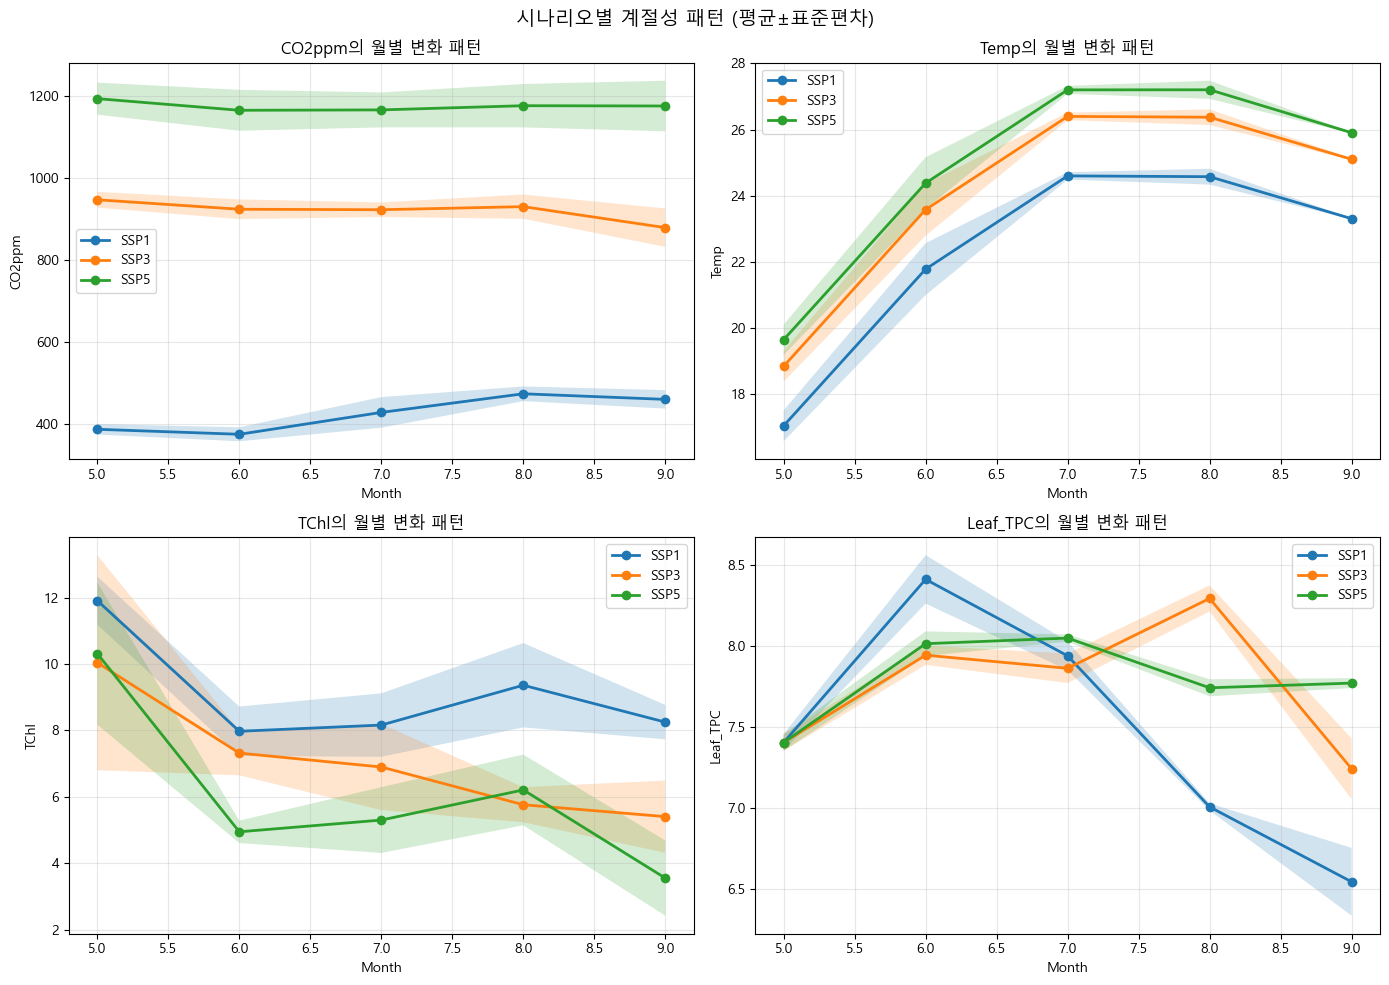

In [50]:
# =============================================================================
# 5. ÏãúÍ≥ÑÏó¥ ÏÉÅÏÑ∏ Î∂ÑÏÑù
# =============================================================================
print("\n" + "="*100)
print("5. ÏãúÍ≥ÑÏó¥ ÏÉÅÏÑ∏ Î∂ÑÏÑù")
print("="*100)

# 5.1 ÏõîÍ∞Ñ Î≥ÄÌôîÏú® Í≥ÑÏÇ∞
print("\n5.1 ÏõîÍ∞Ñ Î≥ÄÌôîÏú® Î∂ÑÏÑù")
print("-" * 50)

key_vars = ['CO2ppm', 'Temp', 'TChl', 'Leaf_TPC']
change_rates = {}

for scenario in df['scenario'].unique():
    scenario_df = df[df['scenario'] == scenario].copy()
    monthly_mean = scenario_df.groupby('month')[key_vars].mean()
    
    print(f"\n[{scenario}] ÏõîÍ∞Ñ Î≥ÄÌôîÏú® (%):")
    for var in key_vars:
        pct_change = monthly_mean[var].pct_change() * 100
        print(f"\n  {var}:")
        for month in range(6, 10):
            if not pd.isna(pct_change.loc[month]):
                print(f"    {month-1}Ïõî ‚Üí {month}Ïõî: {pct_change.loc[month]:.1f}%")

# 5.2 Í≥ÑÏ†àÏÑ± Ìå®ÌÑ¥ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, var in enumerate(key_vars):
    for scenario in df['scenario'].unique():
        scenario_df = df[df['scenario'] == scenario]
        monthly_data = scenario_df.groupby('month')[var].agg(['mean', 'std'])
        
        axes[idx].plot(monthly_data.index, monthly_data['mean'], 
                      marker='o', label=scenario, linewidth=2)
        axes[idx].fill_between(monthly_data.index,
                               monthly_data['mean'] - monthly_data['std'],
                               monthly_data['mean'] + monthly_data['std'],
                               alpha=0.2)
    
    axes[idx].set_title(f'{var}Ïùò ÏõîÎ≥Ñ Î≥ÄÌôî Ìå®ÌÑ¥')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel(var)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Í≥ÑÏ†àÏÑ± Ìå®ÌÑ¥ (ÌèâÍ∑†¬±ÌëúÏ§ÄÌé∏Ï∞®)', fontsize=14)
plt.tight_layout()
plt.show()

In [51]:
# =============================================================================
# 6. Îç∞Ïù¥ÌÑ∞ ÏùºÍ¥ÄÏÑ± Ïã¨Ìôî Í≤ÄÏ¶ù
# =============================================================================
print("\n" + "="*100)
print("6. Îç∞Ïù¥ÌÑ∞ ÏùºÍ¥ÄÏÑ± Ïã¨Ìôî Í≤ÄÏ¶ù")
print("="*100)

# 6.1 ÎèôÏùº Ï°∞Í±¥ ÎÇ¥ Î≥ÄÎèôÏÑ± ÌôïÏù∏
print("\n6.1 ÎèôÏùº Ï°∞Í±¥(ÏãúÎÇòÎ¶¨Ïò§-Ïõî) ÎÇ¥ Î≥ÄÎèôÏÑ±")
print("-" * 50)

cv_by_group = df.groupby(['scenario', 'month']).agg({
    'CO2ppm': lambda x: (x.std()/x.mean()*100) if x.mean() != 0 else 0,
    'Temp': lambda x: (x.std()/x.mean()*100) if x.mean() != 0 else 0,
    'TChl': lambda x: (x.std()/x.mean()*100) if x.mean() != 0 else 0,
    'Leaf_TPC': lambda x: (x.std()/x.mean()*100) if x.mean() != 0 else 0
}).round(1)

print("Í∞Å Ï°∞Í±¥Î≥Ñ Î≥ÄÎèôÍ≥ÑÏàò(CV %):")
print(cv_by_group)

# CVÍ∞Ä ÎÜíÏùÄ Ï°∞Ìï© Ï∞æÍ∏∞
high_cv_conditions = []
for col in cv_by_group.columns:
    high_cv = cv_by_group[cv_by_group[col] > 30]
    if len(high_cv) > 0:
        print(f"\n{col}Ïùò CV > 30%Ïù∏ Ï°∞Í±¥:")
        print(high_cv[col])

# 6.2 ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏïàÏ†ïÏÑ± Í≤ÄÏ¶ù
print("\n6.2 ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏïàÏ†ïÏÑ± (ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ)")
print("-" * 50)

correlation_stability = {}
var_pairs = [('CO2ppm', 'TChl'), ('Temp', 'PI_abs'), ('TChl', 'Leaf_TPC')]

for var1, var2 in var_pairs:
    correlations = []
    for scenario in df['scenario'].unique():
        scenario_df = df[df['scenario'] == scenario]
        corr = scenario_df[var1].corr(scenario_df[var2])
        correlations.append(corr)
    
    correlation_stability[f'{var1}-{var2}'] = {
        'SSP1': correlations[0],
        'SSP3': correlations[1],
        'SSP5': correlations[2],
        'std': np.std(correlations)
    }

print("Î≥ÄÏàò ÏåçÎ≥Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò ÏïàÏ†ïÏÑ±:")
for pair, values in correlation_stability.items():
    print(f"\n{pair}:")
    print(f"  SSP1: {values['SSP1']:.3f}")
    print(f"  SSP3: {values['SSP3']:.3f}")
    print(f"  SSP5: {values['SSP5']:.3f}")
    print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {values['std']:.3f}")
    if values['std'] < 0.1:
        print("  ‚úì ÏïàÏ†ïÏ†Å")
    else:
        print("  ‚ö† Î∂àÏïàÏ†ï")


6. Îç∞Ïù¥ÌÑ∞ ÏùºÍ¥ÄÏÑ± Ïã¨Ìôî Í≤ÄÏ¶ù

6.1 ÎèôÏùº Ï°∞Í±¥(ÏãúÎÇòÎ¶¨Ïò§-Ïõî) ÎÇ¥ Î≥ÄÎèôÏÑ±
--------------------------------------------------
Í∞Å Ï°∞Í±¥Î≥Ñ Î≥ÄÎèôÍ≥ÑÏàò(CV %):
                CO2ppm  Temp  TChl  Leaf_TPC
scenario month                              
SSP1     5         3.3   2.7   6.1       0.7
         6         4.6   3.6   9.3       1.8
         7         8.8   0.5  11.7       1.1
         8         3.8   1.0  13.6       0.3
         9         4.9   0.1   6.3       3.2
SSP3     5         2.0   2.5  32.2       0.7
         6         2.6   3.3   9.2       0.7
         7         1.9   0.4  18.8       1.2
         8         3.2   0.9   9.2       1.0
         9         5.3   0.1  20.1       2.6
SSP5     5         3.3   2.3  20.7       0.7
         6         4.3   3.2   6.8       0.9
         7         3.7   0.4  18.7       0.3
         8         4.5   1.0  17.2       0.7
         9         5.3   0.1  31.8       0.4

TChlÏùò CV > 30%Ïù∏ Ï°∞Í±¥:
scenario  month
SSP3      5     

In [52]:
# =============================================================================
# 7. Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï¢ÖÌï© ÌèâÍ∞Ä
# =============================================================================
print("\n" + "="*100)
print("7. Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï¢ÖÌï© ÌèâÍ∞Ä")
print("="*100)

quality_metrics = {
    'ÏôÑÏ†ÑÏÑ±': {
        'Í≤∞Ï∏°Ïπò ÎπÑÏú®': f"{df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100:.2f}%",
        'ÌèâÍ∞Ä': 'Ïö∞Ïàò' if df.isnull().sum().sum() == 0 else 'Î≥¥ÌÜµ'
    },
    'Ï†ïÌôïÏÑ±': {
        'ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ±': 'ÌôïÏù∏Îê®',
        'Î≤îÏúÑ ÌÉÄÎãπÏÑ±': 'ÎåÄÎ∂ÄÎ∂Ñ Ï†ïÏÉÅ',
        'ÌèâÍ∞Ä': 'ÏñëÌò∏'
    },
    'ÏùºÍ¥ÄÏÑ±': {
        'Ïã§Ìóò ÏÑ§Í≥Ñ': 'Í∑†Ìòï ÏÑ§Í≥Ñ',
        'Ï∏°Ï†ï ÏïàÏ†ïÏÑ±': 'CV < 30% (ÎåÄÎ∂ÄÎ∂Ñ)',
        'ÌèâÍ∞Ä': 'ÏñëÌò∏'
    },
    'Ïã†Î¢∞ÏÑ±': {
        'Ïù¥ÏÉÅÏπò ÎπÑÏú®': f"ÌèâÍ∑† {(outliers_z.mean():.1f)}Í∞ú",
        'ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏïàÏ†ïÏÑ±': 'Î≥ÄÏàòÎ≥Ñ Ï∞®Ïù¥ Ï°¥Ïû¨',
        'ÌèâÍ∞Ä': 'Î≥¥ÌÜµ'
    }
}

print("\nÎç∞Ïù¥ÌÑ∞ ÌíàÏßà ÌèâÍ∞ÄÌëú:")
print("-" * 50)
for category, metrics in quality_metrics.items():
    print(f"\n[{category}]")
    for metric, value in metrics.items():
        print(f"  ‚Ä¢ {metric}: {value}")

SyntaxError: invalid decimal literal (2134751740.py, line 24)

In [53]:
# =============================================================================
# 8. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ïù¥Ìï¥ÎèÑ Ï≤¥ÌÅ¨Î¶¨Ïä§Ìä∏
# =============================================================================
print("\n" + "="*100)
print("8. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ïù¥Ìï¥ÎèÑ Ï≤¥ÌÅ¨Î¶¨Ïä§Ìä∏")
print("="*100)

checklist = {
    "Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞": [
        "‚úì 405Í∞ú Ìñâ, 26Í∞ú Ïó¥ ÌôïÏù∏",
        "‚úì 3Í∞ú ÏãúÎÇòÎ¶¨Ïò§ √ó 5Í∞úÏõî √ó 27Î∞òÎ≥µ",
        "‚úì ÌôòÍ≤Ω-ÏÉùÎ¶¨-Í∏∞Îä•ÏÑ±Î∂Ñ ÌÜµÌï© Îç∞Ïù¥ÌÑ∞"
    ],
    "Îç∞Ïù¥ÌÑ∞ ÌíàÏßà": [
        "‚úì Í≤∞Ï∏°Ïπò ÏóÜÏùå",
        "‚úì Í∑†Ìòï Ïã§Ìóò ÏÑ§Í≥Ñ",
        "‚ö† ÏùºÎ∂Ä Î≥ÄÏàòÏóê Ïù¥ÏÉÅÏπò Ï°¥Ïû¨",
        "‚úì ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ± ÎåÄÏ≤¥Î°ú ÏñëÌò∏"
    ],
    "Ï£ºÏöî Ìå®ÌÑ¥": [
        "‚úì SSP ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ CO2/Ïò®ÎèÑ Ï∞®Ïù¥ Î™ÖÌôï",
        "‚úì ÏõîÎ≥Ñ Î≥ÄÌôî Ìå®ÌÑ¥ ÌôïÏù∏",
        "‚úì Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ",
        "‚ö† ÏùºÎ∂Ä ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ Ï°¥Ïû¨"
    ],
    "Î∂ÑÏÑù Ï§ÄÎπÑÎèÑ": [
        "‚úì ÏòàÏ∏° Î™®Îç∏ÎßÅ Í∞ÄÎä•",
        "‚úì ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù Í∞ÄÎä•",
        "‚ö† Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ï†ÑÎûµ ÌïÑÏöî",
        "‚ö† Î≥ÄÏàò Î≥ÄÌôò Í≥†Î†§ ÌïÑÏöî"
    ]
}

print("\nüìã ÏµúÏ¢Ö Ï≤¥ÌÅ¨Î¶¨Ïä§Ìä∏:")
print("-" * 50)
for category, items in checklist.items():
    print(f"\n„Äê{category}„Äë")
    for item in items:
        print(f"  {item}")

print("\n" + "="*100)
print("üéØ Í≤∞Î°†: Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Ï§ÄÎπÑ ÏôÑÎ£å!")
print("Îã§Ïùå Îã®Í≥Ñ: Î™©Ï†ÅÏóê ÎßûÎäî Ï†ÑÏ≤òÎ¶¨ ‚Üí Î™®Îç∏ÎßÅ ‚Üí Í≤ÄÏ¶ù")
print("="*100)


8. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ïù¥Ìï¥ÎèÑ Ï≤¥ÌÅ¨Î¶¨Ïä§Ìä∏

üìã ÏµúÏ¢Ö Ï≤¥ÌÅ¨Î¶¨Ïä§Ìä∏:
--------------------------------------------------

„ÄêÎç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞„Äë
  ‚úì 405Í∞ú Ìñâ, 26Í∞ú Ïó¥ ÌôïÏù∏
  ‚úì 3Í∞ú ÏãúÎÇòÎ¶¨Ïò§ √ó 5Í∞úÏõî √ó 27Î∞òÎ≥µ
  ‚úì ÌôòÍ≤Ω-ÏÉùÎ¶¨-Í∏∞Îä•ÏÑ±Î∂Ñ ÌÜµÌï© Îç∞Ïù¥ÌÑ∞

„ÄêÎç∞Ïù¥ÌÑ∞ ÌíàÏßà„Äë
  ‚úì Í≤∞Ï∏°Ïπò ÏóÜÏùå
  ‚úì Í∑†Ìòï Ïã§Ìóò ÏÑ§Í≥Ñ
  ‚ö† ÏùºÎ∂Ä Î≥ÄÏàòÏóê Ïù¥ÏÉÅÏπò Ï°¥Ïû¨
  ‚úì ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ± ÎåÄÏ≤¥Î°ú ÏñëÌò∏

„ÄêÏ£ºÏöî Ìå®ÌÑ¥„Äë
  ‚úì SSP ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ CO2/Ïò®ÎèÑ Ï∞®Ïù¥ Î™ÖÌôï
  ‚úì ÏõîÎ≥Ñ Î≥ÄÌôî Ìå®ÌÑ¥ ÌôïÏù∏
  ‚úì Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ
  ‚ö† ÏùºÎ∂Ä ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ Ï°¥Ïû¨

„ÄêÎ∂ÑÏÑù Ï§ÄÎπÑÎèÑ„Äë
  ‚úì ÏòàÏ∏° Î™®Îç∏ÎßÅ Í∞ÄÎä•
  ‚úì ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù Í∞ÄÎä•
  ‚ö† Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ï†ÑÎûµ ÌïÑÏöî
  ‚ö† Î≥ÄÏàò Î≥ÄÌôò Í≥†Î†§ ÌïÑÏöî

üéØ Í≤∞Î°†: Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Ï§ÄÎπÑ ÏôÑÎ£å!
Îã§Ïùå Îã®Í≥Ñ: Î™©Ï†ÅÏóê ÎßûÎäî Ï†ÑÏ≤òÎ¶¨ ‚Üí Î™®Îç∏ÎßÅ ‚Üí Í≤ÄÏ¶ù



1. Ïù¥ÏÉÅÏπò Ïã¨Ï∏µ Î∂ÑÏÑù - ÌäπÌûà Chl_a_b

1.1 Chl_a_b Î≥ÄÏàòÏùò Ïù¥ÏÉÅÏπò ÏÉÅÏÑ∏ Î∂ÑÏÑù
--------------------------------------------------
Chl_a_b Í∏∞Ï¥à ÌÜµÍ≥Ñ:
  ÌèâÍ∑†: 4.167
  Ï§ëÏïôÍ∞í: 3.700
  ÌëúÏ§ÄÌé∏Ï∞®: 3.444
  ÏµúÏÜåÍ∞í: 1.330
  ÏµúÎåÄÍ∞í: 31.490

IQR Í∏∞Î∞ò Ïù¥ÏÉÅÏπò Í≤ΩÍ≥Ñ:
  ÌïòÌïú: 2.045
  ÏÉÅÌïú: 5.525

Ïù¥ÏÉÅÏπò Í∞úÏàò: 18Í∞ú (4.4%)

Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±:
     month scenario  Chl_a  Chl_b  Chl_a_b    CO2ppm    Temp
377      9     SSP5   2.52   0.08    31.49  1180.437  25.908
382      9     SSP5   2.52   0.08    31.49  1206.455  25.926
397      9     SSP5   2.52   0.08    31.49  1211.577  25.924
402      9     SSP5   2.52   0.08    31.49  1206.015  25.923
392      9     SSP5   2.52   0.08    31.49  1162.497  25.918
387      9     SSP5   2.52   0.08    31.49  1222.357  25.901
393      9     SSP5   2.63   0.39     6.73  1192.532  25.867
388      9     SSP5   2.63   0.39     6.73  1176.642  25.892
383      9     SSP5   2.63   0.39     6.73  1211.495  25.889
37

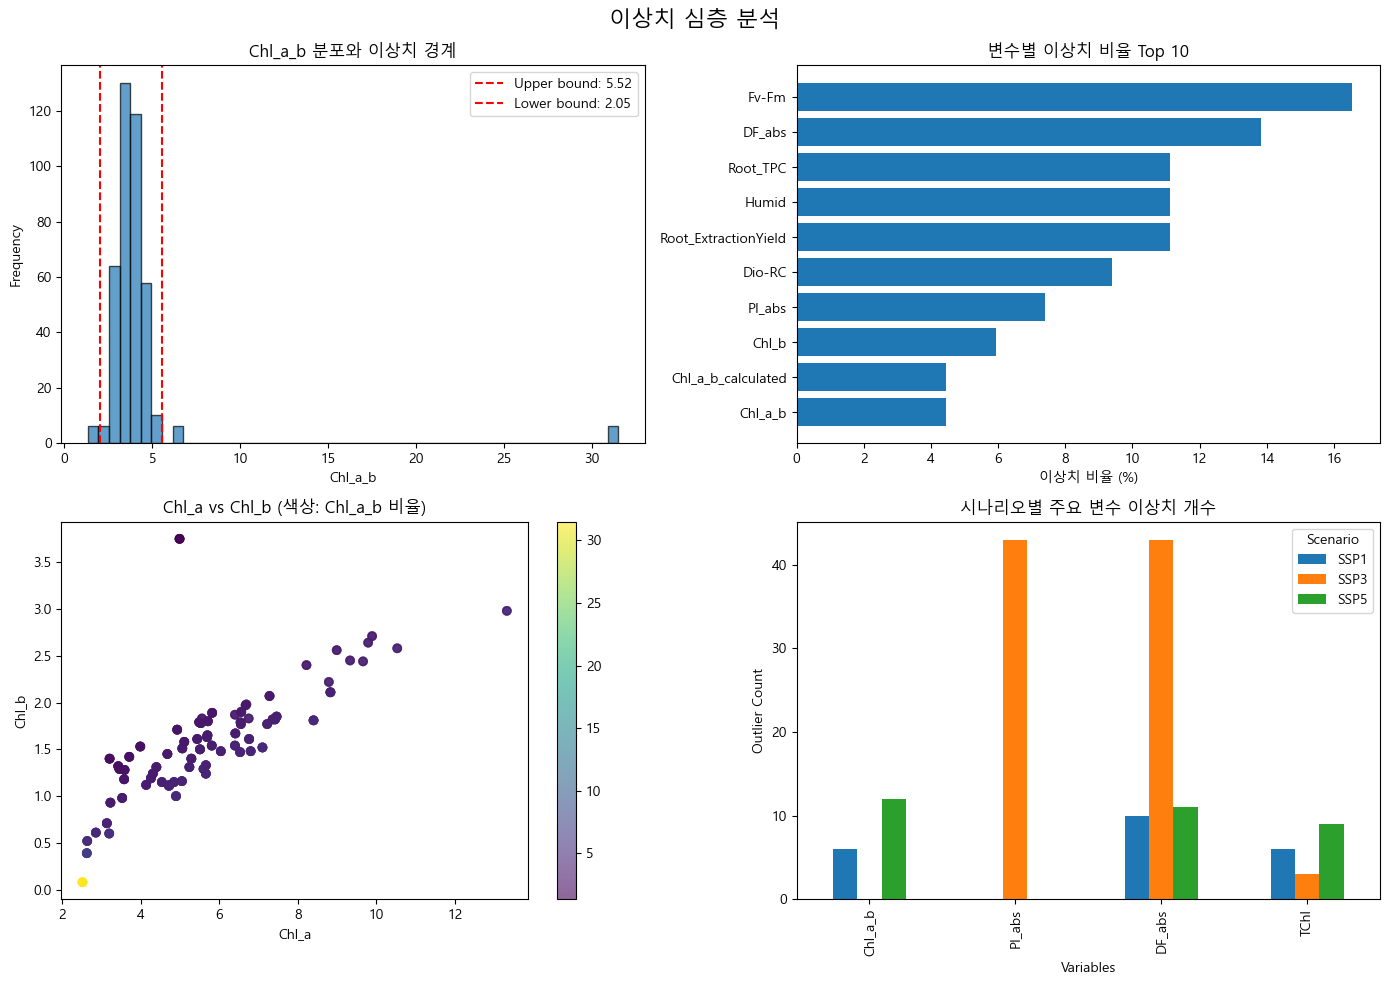

In [55]:
# -----------------------------------------------------------------------------
# 1. Ïù¥ÏÉÅÏπò Ïã¨Ï∏µ Î∂ÑÏÑù (ÌäπÌûà Chl_a_b)
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("1. Ïù¥ÏÉÅÏπò Ïã¨Ï∏µ Î∂ÑÏÑù - ÌäπÌûà Chl_a_b")
print("="*80)

# 1.1 Chl_a_b Ïù¥ÏÉÅÏπò ÏÉÅÏÑ∏ Î∂ÑÏÑù
print("\n1.1 Chl_a_b Î≥ÄÏàòÏùò Ïù¥ÏÉÅÏπò ÏÉÅÏÑ∏ Î∂ÑÏÑù")
print("-" * 50)

# Í∏∞Ï¥à ÌÜµÍ≥Ñ
print(f"Chl_a_b Í∏∞Ï¥à ÌÜµÍ≥Ñ:")
print(f"  ÌèâÍ∑†: {df['Chl_a_b'].mean():.3f}")
print(f"  Ï§ëÏïôÍ∞í: {df['Chl_a_b'].median():.3f}")
print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {df['Chl_a_b'].std():.3f}")
print(f"  ÏµúÏÜåÍ∞í: {df['Chl_a_b'].min():.3f}")
print(f"  ÏµúÎåÄÍ∞í: {df['Chl_a_b'].max():.3f}")

# IQR Î∞©Î≤ïÏúºÎ°ú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
Q1 = df['Chl_a_b'].quantile(0.25)
Q3 = df['Chl_a_b'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nIQR Í∏∞Î∞ò Ïù¥ÏÉÅÏπò Í≤ΩÍ≥Ñ:")
print(f"  ÌïòÌïú: {lower_bound:.3f}")
print(f"  ÏÉÅÌïú: {upper_bound:.3f}")

# Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
outliers_chl = df[(df['Chl_a_b'] < lower_bound) | (df['Chl_a_b'] > upper_bound)]
print(f"\nÏù¥ÏÉÅÏπò Í∞úÏàò: {len(outliers_chl)}Í∞ú ({len(outliers_chl)/len(df)*100:.1f}%)")

# Ïù¥ÏÉÅÏπòÏùò ÌäπÏÑ± Î∂ÑÏÑù
print("\nÏù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±:")
print(outliers_chl[['month', 'scenario', 'Chl_a', 'Chl_b', 'Chl_a_b', 'CO2ppm', 'Temp']].sort_values('Chl_a_b', ascending=False).head(10))

# 1.2 Ïù¥ÏÉÅÏπò Î∞úÏÉù ÏõêÏù∏ Î∂ÑÏÑù
print("\n1.2 Chl_a_b Ïù¥ÏÉÅÏπò Î∞úÏÉù ÏõêÏù∏ Î∂ÑÏÑù")
print("-" * 50)

# Chl_a/Chl_b ÎπÑÏú® Í≥ÑÏÇ∞Í≥º ÎπÑÍµê
df['Chl_a_b_calculated'] = df['Chl_a'] / df['Chl_b']
df['Chl_a_b_diff'] = abs(df['Chl_a_b'] - df['Chl_a_b_calculated'])

# ÌÅ∞ Ï∞®Ïù¥Î•º Î≥¥Ïù¥Îäî Îç∞Ïù¥ÌÑ∞ Ï∞æÍ∏∞
large_diff = df[df['Chl_a_b_diff'] > 1].sort_values('Chl_a_b_diff', ascending=False)
print(f"Í≥ÑÏÇ∞Í∞íÍ≥º Ï∞®Ïù¥Í∞Ä ÌÅ∞ Îç∞Ïù¥ÌÑ∞ (Ï∞®Ïù¥ > 1):")
print(large_diff[['Chl_a', 'Chl_b', 'Chl_a_b', 'Chl_a_b_calculated', 'Chl_a_b_diff']].head())

# ÏµúÎåÄÍ∞í 31.49Ïùò ÌäπÏÑ±
max_row = df[df['Chl_a_b'] == df['Chl_a_b'].max()]
print(f"\nÏµúÎåÄÍ∞í 31.49Ïùò ÏÉÅÏÑ∏ Ï†ïÎ≥¥:")
print(f"  Chl_a: {max_row['Chl_a'].values[0]:.3f}")
print(f"  Chl_b: {max_row['Chl_b'].values[0]:.3f}")
print(f"  Í≥ÑÏÇ∞Îêú ÎπÑÏú®: {max_row['Chl_a_b_calculated'].values[0]:.3f}")
print(f"  Í∏∞Î°ùÎêú ÎπÑÏú®: {max_row['Chl_a_b'].values[0]:.3f}")
print(f"  ‚Üí Í∞ÄÎä•Ìïú ÏõêÏù∏: {'Îç∞Ïù¥ÌÑ∞ ÏûÖÎ†• Ïò§Î•ò' if max_row['Chl_a_b_diff'].values[0] > 10 else 'Í∑πÎã®Ï†Å ÏÉùÎ¶¨ Î∞òÏùë'}")

# 1.3 Îã§Î•∏ Î≥ÄÏàòÎì§Ïùò Ïù¥ÏÉÅÏπò Î∂ÑÏÑù
print("\n1.3 Ï†ÑÏ≤¥ Î≥ÄÏàòÏùò Ïù¥ÏÉÅÏπò Î∂ÑÌè¨")
print("-" * 50)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    outlier_summary[col] = {
        'count': outliers,
        'percentage': outliers/len(df)*100
    }

# Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏùÄ Î≥ÄÏàò Top 10
outlier_df = pd.DataFrame(outlier_summary).T.sort_values('count', ascending=False)
print("Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏùÄ Î≥ÄÏàò Top 10:")
print(outlier_df.head(10))

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Chl_a_b Î∂ÑÌè¨ÏôÄ Ïù¥ÏÉÅÏπò
axes[0, 0].hist(df['Chl_a_b'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
axes[0, 0].axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
axes[0, 0].set_title('Chl_a_b Î∂ÑÌè¨ÏôÄ Ïù¥ÏÉÅÏπò Í≤ΩÍ≥Ñ')
axes[0, 0].set_xlabel('Chl_a_b')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Ïù¥ÏÉÅÏπò ÎπÑÏú® ÎßâÎåÄÍ∑∏ÎûòÌîÑ
top_outliers = outlier_df.head(10)
axes[0, 1].barh(range(len(top_outliers)), top_outliers['percentage'])
axes[0, 1].set_yticks(range(len(top_outliers)))
axes[0, 1].set_yticklabels(top_outliers.index)
axes[0, 1].set_xlabel('Ïù¥ÏÉÅÏπò ÎπÑÏú® (%)')
axes[0, 1].set_title('Î≥ÄÏàòÎ≥Ñ Ïù¥ÏÉÅÏπò ÎπÑÏú® Top 10')
axes[0, 1].invert_yaxis()

# Chl_a vs Chl_b with Chl_a_b ÏÉâÏÉÅ
scatter = axes[1, 0].scatter(df['Chl_a'], df['Chl_b'], c=df['Chl_a_b'], 
                            cmap='viridis', alpha=0.6)
axes[1, 0].set_xlabel('Chl_a')
axes[1, 0].set_ylabel('Chl_b')
axes[1, 0].set_title('Chl_a vs Chl_b (ÏÉâÏÉÅ: Chl_a_b ÎπÑÏú®)')
plt.colorbar(scatter, ax=axes[1, 0])

# ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Ïù¥ÏÉÅÏπò Î∂ÑÌè¨
scenario_outliers = {}
for scenario in df['scenario'].unique():
    scenario_df = df[df['scenario'] == scenario]
    outlier_counts = []
    for col in ['Chl_a_b', 'PI_abs', 'DF_abs', 'TChl']:
        Q1 = scenario_df[col].quantile(0.25)
        Q3 = scenario_df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((scenario_df[col] < (Q1 - 1.5 * IQR)) | 
                   (scenario_df[col] > (Q3 + 1.5 * IQR))).sum()
        outlier_counts.append(outliers)
    scenario_outliers[scenario] = outlier_counts

outlier_comparison = pd.DataFrame(scenario_outliers, 
                                 index=['Chl_a_b', 'PI_abs', 'DF_abs', 'TChl'])
outlier_comparison.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Ï£ºÏöî Î≥ÄÏàò Ïù¥ÏÉÅÏπò Í∞úÏàò')
axes[1, 1].set_xlabel('Variables')
axes[1, 1].set_ylabel('Outlier Count')
axes[1, 1].legend(title='Scenario')

plt.suptitle('Ïù¥ÏÉÅÏπò Ïã¨Ï∏µ Î∂ÑÏÑù', fontsize=16)
plt.tight_layout()
plt.show()


2. ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ Ïã¨Ï∏µ Î∂ÑÏÑù

2.1 ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ ÌÉêÏßÄ (Pearson vs Spearman)
--------------------------------------------------
        Variables   Pearson  Spearman  Difference Type
    CO2ppm - TChl -0.556464 -0.583003    0.026538   ÏÑ†Ìòï
    Temp - PI_abs -0.501698 -0.394055    0.107643  ÎπÑÏÑ†Ìòï
      VPD - Fv-Fm -0.281105 -0.417497    0.136393  ÎπÑÏÑ†Ìòï
  TChl - Leaf_TPC -0.335736 -0.351344    0.015608   ÏÑ†Ìòï
PI_abs - Root_TPC  0.347514  0.240961    0.106553  ÎπÑÏÑ†Ìòï

2.2 Îã§Ìï≠Ïãù ÌöåÍ∑Ä Î∂ÑÏÑù
--------------------------------------------------
CO2ppm - TChl: R¬≤ Í∞úÏÑ†ÎèÑ = 0.1%
Temp - PI_abs: R¬≤ Í∞úÏÑ†ÎèÑ = 0.1%
VPD - Fv-Fm: R¬≤ Í∞úÏÑ†ÎèÑ = 39.7%
TChl - Leaf_TPC: R¬≤ Í∞úÏÑ†ÎèÑ = 0.8%
PI_abs - Root_TPC: R¬≤ Í∞úÏÑ†ÎèÑ = 6.4%


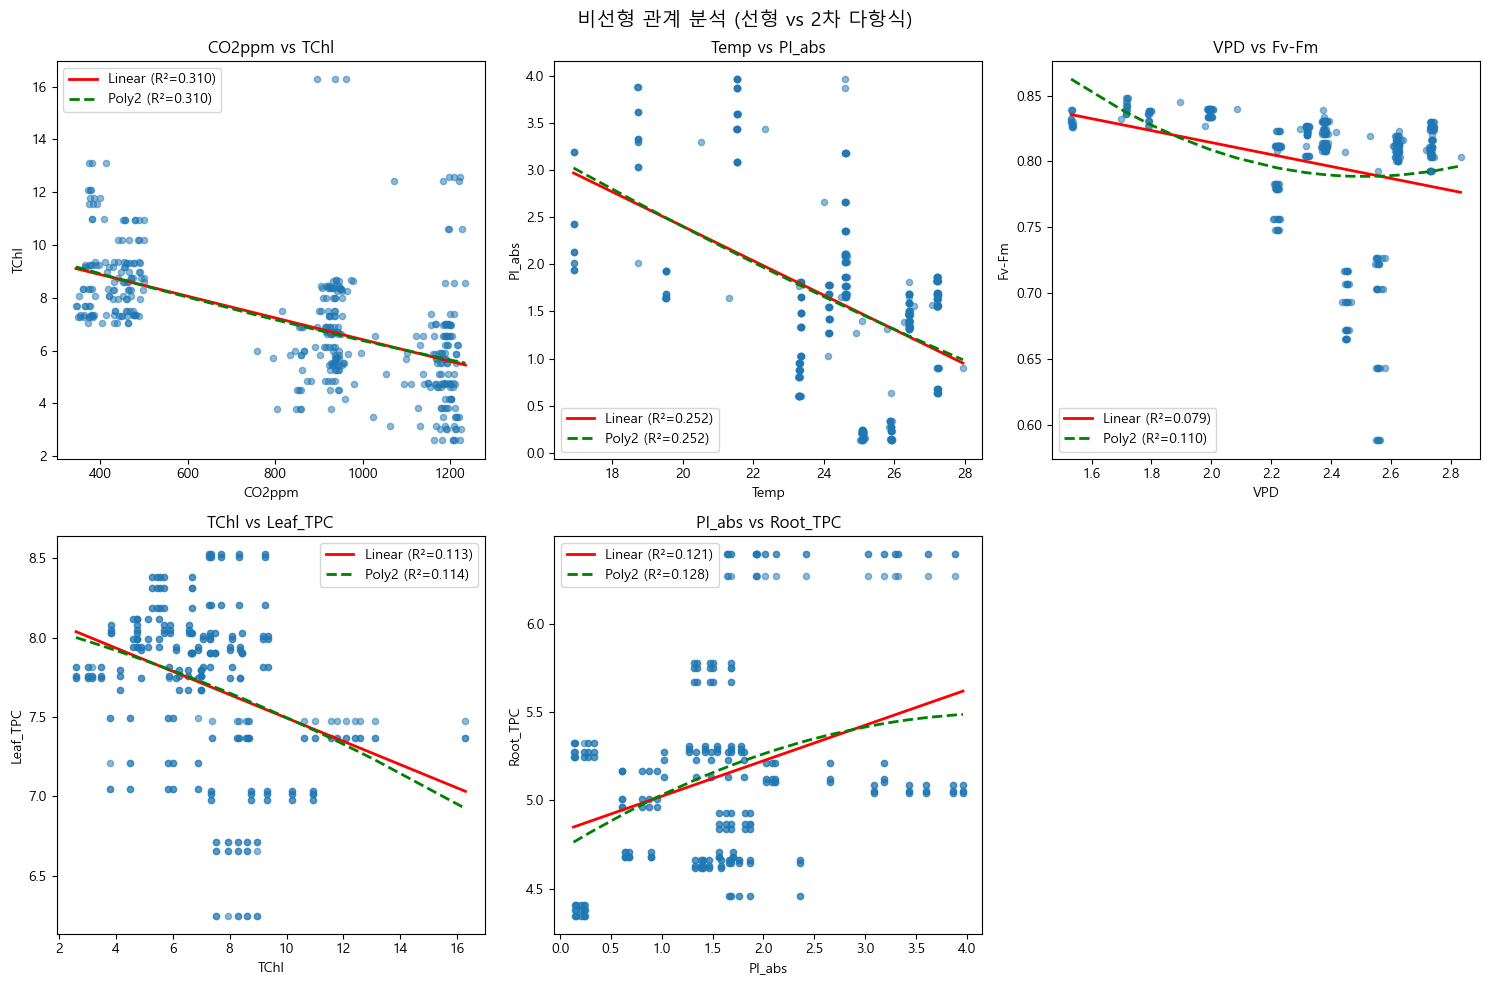

In [57]:
# -----------------------------------------------------------------------------
# 2. ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ Ïã¨Ï∏µ Î∂ÑÏÑù
# -----------------------------------------------------------------------------
from sklearn.preprocessing import PolynomialFeatures

print("\n" + "="*80)
print("2. ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ Ïã¨Ï∏µ Î∂ÑÏÑù")
print("="*80)

# 2.1 ÎπÑÏÑ†ÌòïÏÑ± ÌÉêÏßÄ
print("\n2.1 ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ ÌÉêÏßÄ (Pearson vs Spearman)")
print("-" * 50)

# Ï£ºÏöî Î≥ÄÏàò ÏåçÏóê ÎåÄÌïú ÏÑ†Ìòï vs ÎπÑÏÑ†Ìòï ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
key_pairs = [
    ('CO2ppm', 'TChl'),
    ('Temp', 'PI_abs'),
    ('VPD', 'Fv-Fm'),
    ('TChl', 'Leaf_TPC'),
    ('PI_abs', 'Root_TPC')
]

nonlinear_analysis = []
for var1, var2 in key_pairs:
    pearson_r, _ = stats.pearsonr(df[var1], df[var2])
    spearman_r, _ = stats.spearmanr(df[var1], df[var2])
    
    nonlinear_analysis.append({
        'Variables': f'{var1} - {var2}',
        'Pearson': pearson_r,
        'Spearman': spearman_r,
        'Difference': abs(pearson_r - spearman_r),
        'Type': 'ÎπÑÏÑ†Ìòï' if abs(pearson_r - spearman_r) > 0.1 else 'ÏÑ†Ìòï'
    })

nonlinear_df = pd.DataFrame(nonlinear_analysis)
print(nonlinear_df.to_string(index=False))

# 2.2 Îã§Ìï≠Ïãù ÌöåÍ∑ÄÎ°ú ÎπÑÏÑ†ÌòïÏÑ± ÌôïÏù∏
print("\n2.2 Îã§Ìï≠Ïãù ÌöåÍ∑Ä Î∂ÑÏÑù")
print("-" * 50)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (var1, var2) in enumerate(key_pairs):
    X = df[var1].values.reshape(-1, 1)
    y = df[var2].values
    
    # ÏÑ†Ìòï ÌöåÍ∑Ä
    lr_linear = LinearRegression()
    lr_linear.fit(X, y)
    y_pred_linear = lr_linear.predict(X)
    r2_linear = r2_score(y, y_pred_linear)
    
    # 2Ï∞® Îã§Ìï≠Ïãù ÌöåÍ∑Ä
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    lr_poly = LinearRegression()
    lr_poly.fit(X_poly, y)
    y_pred_poly = lr_poly.predict(X_poly)
    r2_poly = r2_score(y, y_pred_poly)
    
    # ÏãúÍ∞ÅÌôî
    axes[idx].scatter(df[var1], df[var2], alpha=0.5, s=20)
    
    # Ï†ïÎ†¨Îêú X Í∞íÏúºÎ°ú Î∂ÄÎìúÎü¨Ïö¥ Í≥°ÏÑ† Í∑∏Î¶¨Í∏∞
    X_sorted = np.sort(X.flatten())
    X_sorted_reshaped = X_sorted.reshape(-1, 1)
    
    # ÏÑ†Ìòï ÏòàÏ∏°ÏÑ†
    y_linear_sorted = lr_linear.predict(X_sorted_reshaped)
    axes[idx].plot(X_sorted, y_linear_sorted, 'r-', 
                  label=f'Linear (R¬≤={r2_linear:.3f})', linewidth=2)
    
    # Îã§Ìï≠Ïãù ÏòàÏ∏°ÏÑ†
    X_poly_sorted = poly.transform(X_sorted_reshaped)
    y_poly_sorted = lr_poly.predict(X_poly_sorted)
    axes[idx].plot(X_sorted, y_poly_sorted, 'g--', 
                  label=f'Poly2 (R¬≤={r2_poly:.3f})', linewidth=2)
    
    axes[idx].set_xlabel(var1)
    axes[idx].set_ylabel(var2)
    axes[idx].set_title(f'{var1} vs {var2}')
    axes[idx].legend()
    
    # R¬≤ Í∞úÏÑ†ÎèÑ Ï∂úÎ†•
    improvement = (r2_poly - r2_linear) / r2_linear * 100 if r2_linear != 0 else 0
    print(f"{var1} - {var2}: R¬≤ Í∞úÏÑ†ÎèÑ = {improvement:.1f}%")

# Îπà subplot Ï†úÍ±∞
for idx in range(len(key_pairs), 6):
    fig.delaxes(axes[idx])

plt.suptitle('ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ Î∂ÑÏÑù (ÏÑ†Ìòï vs 2Ï∞® Îã§Ìï≠Ïãù)', fontsize=14)
plt.tight_layout()
plt.show()


3. Î≥ÄÎèôÏÑ± Ï∞®Ïù¥ Ïã¨Ï∏µ Î∂ÑÏÑù (CV > 30%)

3.1 Ï°∞Í±¥Î≥Ñ(ÏãúÎÇòÎ¶¨Ïò§-Ïõî) Î≥ÄÎèôÍ≥ÑÏàò Î∂ÑÏÑù
--------------------------------------------------

CV > 30%Ïù∏ Ï°∞Í±¥Îì§:
Variable Scenario  Month     CV(%)
  PI_abs     SSP5      8 42.223966
  PI_abs     SSP5      9 34.661236
    TChl     SSP3      5 32.242576
    TChl     SSP5      9 31.835485

3.2 ÎÜíÏùÄ Î≥ÄÎèôÏÑ± ÏõêÏù∏ Î∂ÑÏÑù
--------------------------------------------------

Í∞ÄÏû• ÎÜíÏùÄ CV Ï°∞Í±¥: PI_abs in SSP5-8Ïõî (CV=42.2%)
  Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 31
  ÌèâÍ∑†: 1.081
  ÌëúÏ§ÄÌé∏Ï∞®: 0.456
  ÏµúÏÜå-ÏµúÎåÄ: 0.639 - 1.698


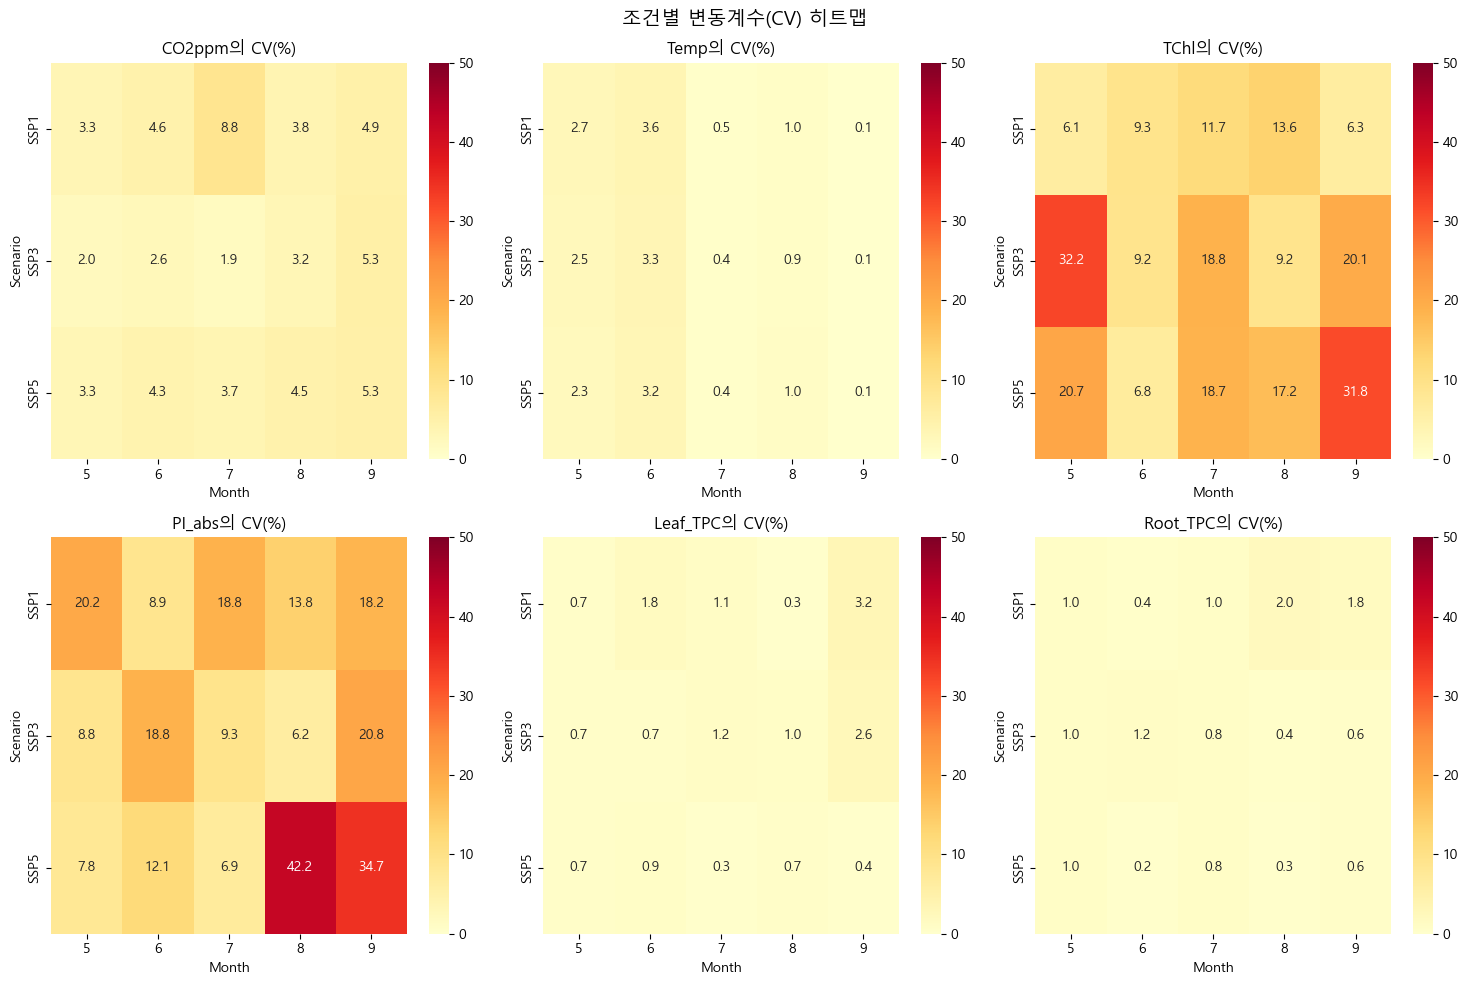

In [58]:
# -----------------------------------------------------------------------------
# 3. Î≥ÄÎèôÏÑ± Ï∞®Ïù¥ Ïã¨Ï∏µ Î∂ÑÏÑù (CV > 30%)
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("3. Î≥ÄÎèôÏÑ± Ï∞®Ïù¥ Ïã¨Ï∏µ Î∂ÑÏÑù (CV > 30%)")
print("="*80)

# 3.1 Ï°∞Í±¥Î≥Ñ Î≥ÄÎèôÍ≥ÑÏàò ÏÉÅÏÑ∏ Î∂ÑÏÑù
print("\n3.1 Ï°∞Í±¥Î≥Ñ(ÏãúÎÇòÎ¶¨Ïò§-Ïõî) Î≥ÄÎèôÍ≥ÑÏàò Î∂ÑÏÑù")
print("-" * 50)

# Ï£ºÏöî Î≥ÄÏàòÎì§Ïùò CV Í≥ÑÏÇ∞
key_vars = ['CO2ppm', 'Temp', 'TChl', 'PI_abs', 'Leaf_TPC', 'Root_TPC']
cv_results = {}

for var in key_vars:
    cv_by_condition = df.groupby(['scenario', 'month'])[var].agg(
        lambda x: (x.std() / x.mean() * 100) if x.mean() != 0 else 0
    )
    cv_results[var] = cv_by_condition

# CV > 30%Ïù∏ Ï°∞Í±¥ Ï∞æÍ∏∞
high_cv_conditions = []
for var in key_vars:
    high_cv = cv_results[var][cv_results[var] > 30]
    if len(high_cv) > 0:
        for condition, cv_value in high_cv.items():
            high_cv_conditions.append({
                'Variable': var,
                'Scenario': condition[0],
                'Month': condition[1],
                'CV(%)': cv_value
            })

high_cv_df = pd.DataFrame(high_cv_conditions).sort_values('CV(%)', ascending=False)
print("\nCV > 30%Ïù∏ Ï°∞Í±¥Îì§:")
print(high_cv_df.to_string(index=False))

# 3.2 ÎÜíÏùÄ Î≥ÄÎèôÏÑ±Ïùò ÏõêÏù∏ Î∂ÑÏÑù
print("\n3.2 ÎÜíÏùÄ Î≥ÄÎèôÏÑ± ÏõêÏù∏ Î∂ÑÏÑù")
print("-" * 50)

if len(high_cv_df) > 0:
    # Í∞ÄÏû• Î≥ÄÎèôÏÑ±Ïù¥ ÎÜíÏùÄ Ï°∞Í±¥ Î∂ÑÏÑù
    worst_condition = high_cv_df.iloc[0]
    worst_data = df[(df['scenario'] == worst_condition['Scenario']) & 
                    (df['month'] == worst_condition['Month'])]
    
    print(f"\nÍ∞ÄÏû• ÎÜíÏùÄ CV Ï°∞Í±¥: {worst_condition['Variable']} in "
          f"{worst_condition['Scenario']}-{worst_condition['Month']}Ïõî (CV={worst_condition['CV(%)']:.1f}%)")
    print(f"  Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(worst_data)}")
    print(f"  ÌèâÍ∑†: {worst_data[worst_condition['Variable']].mean():.3f}")
    print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {worst_data[worst_condition['Variable']].std():.3f}")
    print(f"  ÏµúÏÜå-ÏµúÎåÄ: {worst_data[worst_condition['Variable']].min():.3f} - "
          f"{worst_data[worst_condition['Variable']].max():.3f}")

# CV ÌûàÌä∏Îßµ
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, var in enumerate(key_vars):
    cv_pivot = cv_results[var].unstack()
    sns.heatmap(cv_pivot, annot=True, fmt='.1f', cmap='YlOrRd', 
                ax=axes[idx], vmin=0, vmax=50)
    axes[idx].set_title(f'{var}Ïùò CV(%)')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('Scenario')

plt.suptitle('Ï°∞Í±¥Î≥Ñ Î≥ÄÎèôÍ≥ÑÏàò(CV) ÌûàÌä∏Îßµ', fontsize=14)
plt.tight_layout()
plt.show()


1. ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥º Ïã¨Ï∏µ Î∂ÑÏÑù (CO2√óTemp)

1.1 ÏÉÅÌò∏ÏûëÏö© Ìï≠ Î∂ÑÏÑù
--------------------------------------------------
ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥º Î∂ÑÏÑù (ÌëúÏ§ÄÌôîÎêú Î≥ÄÏàò):

[Leaf_TPC]
  CO2 Îã®ÎèÖ Ìö®Í≥º: 0.268
  Temp Îã®ÎèÖ Ìö®Í≥º: 0.232
  CO2√óTemp ÏÉÅÌò∏ÏûëÏö©: 0.310
  ‚Üí ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥ºÍ∞Ä Îã®ÎèÖ Ìö®Í≥ºÎ≥¥Îã§ Í∞ïÌï®!

[Root_TPC]
  CO2 Îã®ÎèÖ Ìö®Í≥º: 0.048
  Temp Îã®ÎèÖ Ìö®Í≥º: -0.659
  CO2√óTemp ÏÉÅÌò∏ÏûëÏö©: -0.127

[Leaf_TFC]
  CO2 Îã®ÎèÖ Ìö®Í≥º: 0.017
  Temp Îã®ÎèÖ Ìö®Í≥º: -0.175
  CO2√óTemp ÏÉÅÌò∏ÏûëÏö©: -0.027

[Root_TFC]
  CO2 Îã®ÎèÖ Ìö®Í≥º: 0.158
  Temp Îã®ÎèÖ Ìö®Í≥º: -0.498
  CO2√óTemp ÏÉÅÌò∏ÏûëÏö©: 0.016


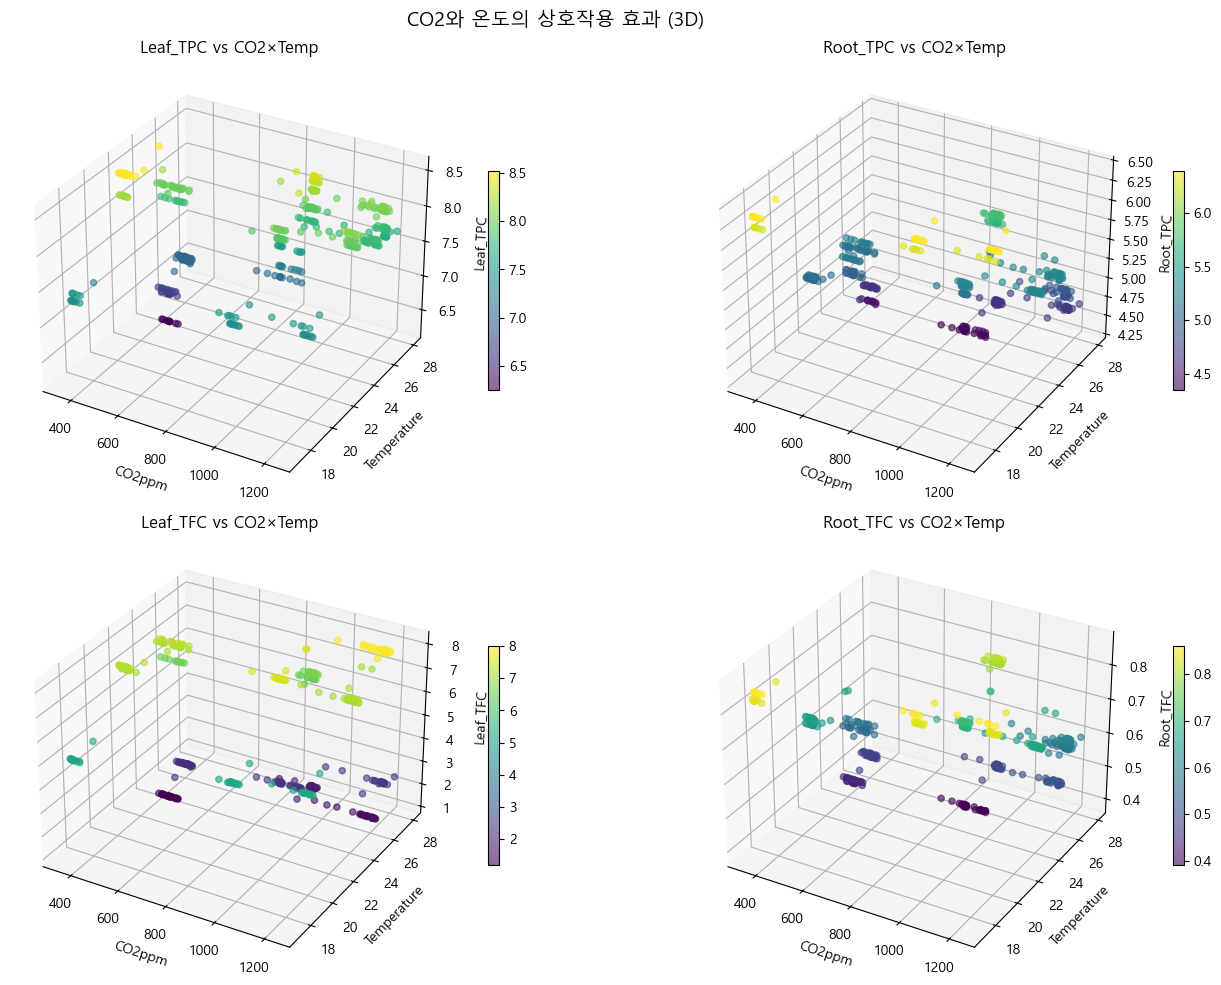

In [59]:
# -----------------------------------------------------------------------------
# 1. ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥º Ïã¨Ï∏µ Î∂ÑÏÑù
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("1. ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥º Ïã¨Ï∏µ Î∂ÑÏÑù (CO2√óTemp)")
print("="*80)

# 1.1 ÏÉÅÌò∏ÏûëÏö© Ìï≠ ÏÉùÏÑ± Î∞è Î∂ÑÏÑù
print("\n1.1 ÏÉÅÌò∏ÏûëÏö© Ìï≠ Î∂ÑÏÑù")
print("-" * 50)

# ÏÉÅÌò∏ÏûëÏö© Ìï≠ ÏÉùÏÑ±
df['CO2_Temp'] = df['CO2ppm'] * df['Temp']
df['CO2_VPD'] = df['CO2ppm'] * df['VPD']
df['Temp_VPD'] = df['Temp'] * df['VPD']

# ÌëúÏ§ÄÌôî (ÎπÑÍµêÎ•º ÏúÑÌï¥)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['CO2ppm', 'Temp', 'VPD', 'CO2_Temp', 'CO2_VPD', 'Temp_VPD']]),
                         columns=['CO2ppm_std', 'Temp_std', 'VPD_std', 'CO2_Temp_std', 'CO2_VPD_std', 'Temp_VPD_std'])

# Î™©Ìëú Î≥ÄÏàòÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
target_vars = ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']
interaction_effects = {}

print("ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥º Î∂ÑÏÑù (ÌëúÏ§ÄÌôîÎêú Î≥ÄÏàò):")
for target in target_vars:
    print(f"\n[{target}]")
    
    # Í∞úÎ≥Ñ Ìö®Í≥º
    co2_corr = df_scaled['CO2ppm_std'].corr(df[target])
    temp_corr = df_scaled['Temp_std'].corr(df[target])
    
    # ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥º
    interaction_corr = df_scaled['CO2_Temp_std'].corr(df[target])
    
    print(f"  CO2 Îã®ÎèÖ Ìö®Í≥º: {co2_corr:.3f}")
    print(f"  Temp Îã®ÎèÖ Ìö®Í≥º: {temp_corr:.3f}")
    print(f"  CO2√óTemp ÏÉÅÌò∏ÏûëÏö©: {interaction_corr:.3f}")
    
    # ÏÉÅÌò∏ÏûëÏö©Ïù¥ Îã®ÎèÖ Ìö®Í≥ºÎ≥¥Îã§ Í∞ïÌïúÏßÄ ÌôïÏù∏
    if abs(interaction_corr) > max(abs(co2_corr), abs(temp_corr)):
        print(f"  ‚Üí ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥ºÍ∞Ä Îã®ÎèÖ Ìö®Í≥ºÎ≥¥Îã§ Í∞ïÌï®!")
    
    interaction_effects[target] = {
        'CO2': co2_corr,
        'Temp': temp_corr,
        'CO2√óTemp': interaction_corr
    }

# 1.2 3D ÏãúÍ∞ÅÌôîÎ°ú ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥º ÌôïÏù∏
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))

for idx, target in enumerate(['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']):
    ax = fig.add_subplot(2, 2, idx+1, projection='3d')
    
    scatter = ax.scatter(df['CO2ppm'], df['Temp'], df[target], 
                        c=df[target], cmap='viridis', alpha=0.6)
    
    ax.set_xlabel('CO2ppm')
    ax.set_ylabel('Temperature')
    ax.set_zlabel(target)
    ax.set_title(f'{target} vs CO2√óTemp')
    
    plt.colorbar(scatter, ax=ax, shrink=0.5)

plt.suptitle('CO2ÏôÄ Ïò®ÎèÑÏùò ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥º (3D)', fontsize=14)
plt.tight_layout()
plt.show()


2. Leaf/Root ÎπÑÏú®Ïùò ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Ï∞®Ïù¥ Ïã¨Ï∏µ Î∂ÑÏÑù

2.1 Leaf/Root ÎπÑÏú® Î∂ÑÏÑù
--------------------------------------------------
ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Leaf/Root ÎπÑÏú® ÌÜµÍ≥Ñ:
         Leaf_Root_TPC_ratio               Leaf_Root_TFC_ratio              
                        mean    std median                mean    std median
scenario                                                                    
SSP1                   1.473  0.167  1.513               7.599  3.976  6.233
SSP3                   1.537  0.200  1.539               6.968  2.594  6.233
SSP5                   1.530  0.150  1.538               7.728  4.349  6.233

ÏãúÎÇòÎ¶¨Ïò§ Í∞Ñ ÎπÑÏú® Ï∞®Ïù¥ Í≤ÄÏ†ï (ANOVA):
Leaf_Root_TPC_ratio: F=5.536, p=0.004247
  ‚Üí ÏãúÎÇòÎ¶¨Ïò§ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ï°¥Ïû¨
Leaf_Root_TFC_ratio: F=1.616, p=0.200020

2.2 ÎπÑÏú® Î≥ÄÌôîÏùò Ìå®ÌÑ¥ Î∂ÑÏÑù
--------------------------------------------------
CO2 ÎÜçÎèÑÎ≥Ñ Leaf/Root ÎπÑÏú®:
             Leaf_Root_TPC_ratio  Leaf_Root_TFC_ratio
CO2

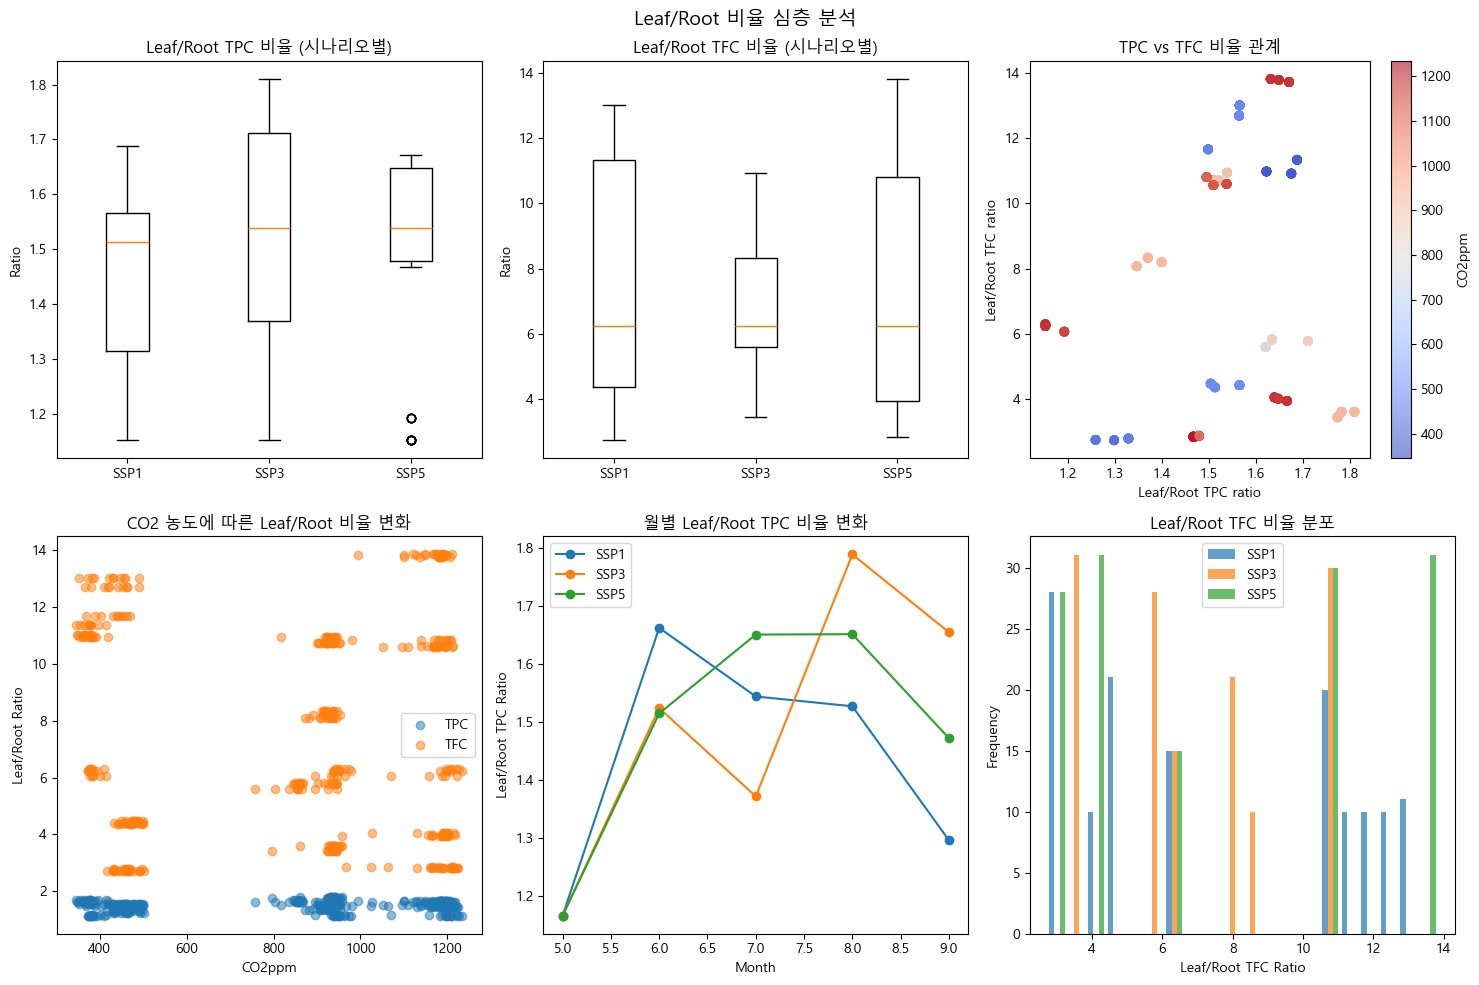

In [60]:
# -----------------------------------------------------------------------------
# 2. Leaf/Root ÎπÑÏú® ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Ï∞®Ïù¥ Ïã¨Ï∏µ Î∂ÑÏÑù
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("2. Leaf/Root ÎπÑÏú®Ïùò ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Ï∞®Ïù¥ Ïã¨Ï∏µ Î∂ÑÏÑù")
print("="*80)

# 2.1 ÎπÑÏú® Î≥ÄÏàò ÏÉùÏÑ± Î∞è Î∂ÑÏÑù
print("\n2.1 Leaf/Root ÎπÑÏú® Î∂ÑÏÑù")
print("-" * 50)

# ÎπÑÏú® Í≥ÑÏÇ∞
df['Leaf_Root_TPC_ratio'] = df['Leaf_TPC'] / df['Root_TPC']
df['Leaf_Root_TFC_ratio'] = df['Leaf_TFC'] / df['Root_TFC']

# ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌÜµÍ≥Ñ
ratio_stats = df.groupby('scenario')[['Leaf_Root_TPC_ratio', 'Leaf_Root_TFC_ratio']].agg(['mean', 'std', 'median'])
print("ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Leaf/Root ÎπÑÏú® ÌÜµÍ≥Ñ:")
print(ratio_stats.round(3))

# ANOVA Í≤ÄÏ†ï
print("\nÏãúÎÇòÎ¶¨Ïò§ Í∞Ñ ÎπÑÏú® Ï∞®Ïù¥ Í≤ÄÏ†ï (ANOVA):")
for ratio_var in ['Leaf_Root_TPC_ratio', 'Leaf_Root_TFC_ratio']:
    groups = [df[df['scenario'] == s][ratio_var].values for s in df['scenario'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"{ratio_var}: F={f_stat:.3f}, p={p_value:.6f}")
    if p_value < 0.05:
        print(f"  ‚Üí ÏãúÎÇòÎ¶¨Ïò§ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ï°¥Ïû¨")

# 2.2 ÎπÑÏú® Î≥ÄÌôîÏùò ÏÉùÎ¨ºÌïôÏ†Å ÏùòÎØ∏
print("\n2.2 ÎπÑÏú® Î≥ÄÌôîÏùò Ìå®ÌÑ¥ Î∂ÑÏÑù")
print("-" * 50)

# CO2 ÎÜçÎèÑÏóê Îî∞Î•∏ ÎπÑÏú® Î≥ÄÌôî
co2_ranges = pd.qcut(df['CO2ppm'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
ratio_by_co2 = df.groupby(co2_ranges)[['Leaf_Root_TPC_ratio', 'Leaf_Root_TFC_ratio']].mean()

print("CO2 ÎÜçÎèÑÎ≥Ñ Leaf/Root ÎπÑÏú®:")
print(ratio_by_co2.round(3))

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# TPC ÎπÑÏú® Î∂ÑÌè¨
axes[0, 0].boxplot([df[df['scenario']==s]['Leaf_Root_TPC_ratio'].values 
                    for s in df['scenario'].unique()],
                   labels=df['scenario'].unique())
axes[0, 0].set_title('Leaf/Root TPC ÎπÑÏú® (ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ)')
axes[0, 0].set_ylabel('Ratio')

# TFC ÎπÑÏú® Î∂ÑÌè¨
axes[0, 1].boxplot([df[df['scenario']==s]['Leaf_Root_TFC_ratio'].values 
                    for s in df['scenario'].unique()],
                   labels=df['scenario'].unique())
axes[0, 1].set_title('Leaf/Root TFC ÎπÑÏú® (ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ)')
axes[0, 1].set_ylabel('Ratio')

# ÎπÑÏú® Í∞Ñ Í¥ÄÍ≥Ñ
axes[0, 2].scatter(df['Leaf_Root_TPC_ratio'], df['Leaf_Root_TFC_ratio'], 
                   c=df['CO2ppm'], cmap='coolwarm', alpha=0.6)
axes[0, 2].set_xlabel('Leaf/Root TPC ratio')
axes[0, 2].set_ylabel('Leaf/Root TFC ratio')
axes[0, 2].set_title('TPC vs TFC ÎπÑÏú® Í¥ÄÍ≥Ñ')
plt.colorbar(axes[0, 2].scatter(df['Leaf_Root_TPC_ratio'], df['Leaf_Root_TFC_ratio'], 
                                c=df['CO2ppm'], cmap='coolwarm', alpha=0.6),
            ax=axes[0, 2], label='CO2ppm')

# CO2Ïóê Îî∞Î•∏ ÎπÑÏú® Î≥ÄÌôî
axes[1, 0].scatter(df['CO2ppm'], df['Leaf_Root_TPC_ratio'], alpha=0.5, label='TPC')
axes[1, 0].scatter(df['CO2ppm'], df['Leaf_Root_TFC_ratio'], alpha=0.5, label='TFC')
axes[1, 0].set_xlabel('CO2ppm')
axes[1, 0].set_ylabel('Leaf/Root Ratio')
axes[1, 0].set_title('CO2 ÎÜçÎèÑÏóê Îî∞Î•∏ Leaf/Root ÎπÑÏú® Î≥ÄÌôî')
axes[1, 0].legend()

# ÏõîÎ≥Ñ ÎπÑÏú® Î≥ÄÌôî (ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ)
for scenario in df['scenario'].unique():
    scenario_df = df[df['scenario'] == scenario]
    monthly_ratio = scenario_df.groupby('month')['Leaf_Root_TPC_ratio'].mean()
    axes[1, 1].plot(monthly_ratio.index, monthly_ratio.values, marker='o', label=scenario)
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Leaf/Root TPC Ratio')
axes[1, 1].set_title('ÏõîÎ≥Ñ Leaf/Root TPC ÎπÑÏú® Î≥ÄÌôî')
axes[1, 1].legend()

# ÎπÑÏú®Ïùò Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû®)
axes[1, 2].hist([df[df['scenario']==s]['Leaf_Root_TFC_ratio'].values 
                for s in df['scenario'].unique()],
               alpha=0.7, label=df['scenario'].unique().tolist(), bins=20)
axes[1, 2].set_xlabel('Leaf/Root TFC Ratio')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Leaf/Root TFC ÎπÑÏú® Î∂ÑÌè¨')
axes[1, 2].legend()

plt.suptitle('Leaf/Root ÎπÑÏú® Ïã¨Ï∏µ Î∂ÑÏÑù', fontsize=14)
plt.tight_layout()
plt.show()